# NOTE: Fix the features

## Install / Import

In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import warnings

## Data Collection

In [226]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# # Load NHANES datasets
# files = {
#     "DEMO_L": "DEMO_L.XPT",     # Demographics
#     "HOQ_L": "HOQ_L.XPT",       # Housing
#     "INQ_L": "INQ_L.XPT",       # Total Savings
#     "BMX_L": "BMX_L.XPT",       # BMI
#     "BPXO_L": "BPXO_L.XPT",     # Blood pressure
#     "TCHOL_L": "TCHOL_L.XPT",   # Cholesterol
#     "GLU_L": "GLU_L.XPT",       # Glucose
#     "INS_L": "INS_L.XPT",       # Insulin
#     "HSCRP_L": "HSCRP_L.XPT",   # High-sensitivity C-reactive protein
#     "GHB_L": "GHB_L.XPT",       # Glycohemoglobin
#     "FERTIN_L": "FERTIN_L.XPT", # Ferritin
#     "FOLATE": "FOLATE_L.XPT",    # RBC Folate

#     "DIQ_L": "DIQ_L.XPT",       # Diabetes
#     "HEPA_L": "HEPA_L.XPT",     # Hepatitis A
#     "HEQ_L": "HEQ_L.XPT",       # Hepatitis B
#     "HSQ_L": "HSQ_L.XPT",       # HIV
#     "KIQ_U_L": "KIQ_U_L.XPT",   # Weak Failing Kidneys
#     "MCQ_L": "MCQ_L.XPT",       # Disease, ..., etc.
#     "RXQ_RX_L": "RXQ_RX_L.XPT", # Taken Prescription Medicine
# }

# dataframes = {name: pd.read_sas(f"{filename}", format="xport") for name, filename in files.items()}

# # Merge datasets on 'SEQN', avoiding the column 'WTPH2YR_x'
# df = dataframes["DEMO_L"]
# for name, df_other in dataframes.items():
#     if name != "DEMO_L":
#         df_other = df_other.drop(columns=["WTPH2YR"], errors='ignore')
#         df = df.merge(df_other, on="SEQN", how="outer")

# # Select relevant columns
# selected_columns = [
#     "SEQN", "RIDAGEYR", "RIAGENDR", "DMDEDUC2", "INDFMPIR",  # Demographics (DEMO_L)
#     "HOD051",                       # Housing (HOQ_L)
#     # "IND310",                       # Total savings (INQ_L)
#     # "OCD150",                     # Occupational (OCQ_L)
#     "BMXBMI", "BMXWAIST",           # BMI (BMX_L)
#     "BPXOSY1", "BPXODI1",           # Blood pressure (BPXO_L)
#     "LBXTC", #"LBXHDL", "LBXLDL",    # Cholesterol (TCHOL_L)
#     "LBXGLU",                       # Glucose (GLU_L)
#     "LBXIN",                       # Insulin (INS_L)
#     "LBXHSCRP",                     # High-sensitivity C-reactive protein (HSCRP_L)
#     "LBXGH",                        # Glycohemoglobin (GHB_L)
#     "LBXFER",                       # Ferritin (FERTIN_L)
#     "LBDRFOSI",                      # RBC Folate (FOLATE)
    
#     "DIQ010", # Diabetes (DIQ_L)
#     "MCQ010", "MCQ160B", "MCQ160C", "MCQ160E", "MCQ160M", "MCQ160P", "MCQ160L", "MCQ550", "MCQ220", # Disease (MCQ_L) 
#     "HSQ590", # HIV (HSQ_L)
#     # "LBXHA", # Hepatitis A (HEPA_L)
#     # "HEQ010", # Hepatitis B (HEQ_L)
#     "KIQ022", # Kidney (KIQ_U_L)
#     # "RXQ033" # Prescription (RXQ_RX_L)
# ]
# df = df[[col for col in selected_columns if col in df.columns]]

# # Convert non-numeric columns to NaN before computing median
# for col in df.columns:
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# # Handle missing values: Fill NaNs with column medians
# df.fillna(df.median(), inplace=True)

# # # Normalize numerical features for clustering
# # numeric_features = ["BMXBMI", "BMXWAIST", "BPXSY1", "BPXDI1", "LBXGLU", "LBXINS", "LBXHSCRP", "LBXTC"]
# # numeric_features = [col for col in numeric_features if col in df.columns]
# # scaler = StandardScaler()
# # df[numeric_features] = scaler.fit_transform(df[numeric_features])

# # Save final dataset
# df.to_csv("NHANES_SES_BOTH_RawData.csv", index=False)
# print("Final dataset saved as 'NHANES_SES_BOTH_RawData.csv'")

## Data Exploration


In [227]:
file = "NHANES_SES_BOTH_RawData.csv"
base_df = pd.read_csv(file)
df = pd.read_csv(file)

In [228]:
df.shape

(11933, 29)

In [229]:
df.head()

SEQN  RIDAGEYR  RIAGENDR  DMDEDUC2  INDFMPIR  HOD051  BMXBMI  BMXWAIST  \
0  130378.0      43.0       1.0       5.0      5.00    10.0    27.0      98.3   
1  130379.0      66.0       1.0       5.0      5.00     9.0    33.5     114.7   
2  130380.0      44.0       2.0       3.0      1.41     6.0    29.7      93.5   
3  130381.0       5.0       2.0       4.0      1.53     4.0    23.8      70.4   
4  130382.0       2.0       1.0       4.0      3.60     8.0    26.4      92.7   

   BPXOSY1  BPXODI1  ...  MCQ160B  MCQ160C  MCQ160E  MCQ160M  MCQ160P  \
0    135.0     98.0  ...      2.0      2.0      2.0      2.0      2.0   
1    121.0     84.0  ...      2.0      2.0      2.0      2.0      2.0   
2    111.0     79.0  ...      2.0      2.0      2.0      1.0      2.0   
3    117.0     72.0  ...      2.0      2.0      2.0      2.0      2.0   
4    117.0     72.0  ...      2.0      2.0      2.0      2.0      2.0   

   MCQ160L  MCQ550  MCQ220  HSQ590  KIQ022  
0      2.0     2.0     2.0     2.0     2.0  
1      2.0     2.0     1.0     1.0     2.0  
2      2.0     2.0     2.0     1.0     2.0  
3      2.0     2.0     2.0     2.0     2.0  
4      2.0     2.0     2.0     2.0     2.0  

[5 rows x 29 columns]

In [230]:
df.columns

Index(['SEQN', 'RIDAGEYR', 'RIAGENDR', 'DMDEDUC2', 'INDFMPIR', 'HOD051',
       'BMXBMI', 'BMXWAIST', 'BPXOSY1', 'BPXODI1', 'LBXTC', 'LBXGLU', 'LBXIN',
       'LBXHSCRP', 'LBXGH', 'LBXFER', 'LBDRFOSI', 'DIQ010', 'MCQ010',
       'MCQ160B', 'MCQ160C', 'MCQ160E', 'MCQ160M', 'MCQ160P', 'MCQ160L',
       'MCQ550', 'MCQ220', 'HSQ590', 'KIQ022'],
      dtype='object')

### Renaming Columns 

In [231]:
# rename columns
df.columns = ['SEQN',
    'Age', 'Gender', 'Education', 'FamilyPovertyRatio', # Demographics
    'Housing', # Housing
    # 'TotalSavings', # Total Savings
    # 'Occupation', # Occupational
    'BMI', 'WaistCircumference', # BMI
    'SystolicBP', 'DiastolicBP', # Blood pressure
    'TotalCholesterol', # Cholesterol
    'FastingBloodGlucose', # Glucose
    'InsulinLevel', # Insulin
    'CRP', # High-sensitivity C-reactive protein
    'Glycohemoglobin', # Glycohemoglobin
    'Ferritin', # Ferritin
    'RBCFolate', # RBC Folate

    'Diabetes', # Diabetes
    'Asthma', # Asthma
    'CongestiveHeartFailure', 'CoronaryHeartDisease', 'HeartAttack', 
    'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 'CancerOrMalignancy', # Disease
    'HIV', # HIV
    # 'HepatitisA', # Hepatitis A
    # 'HepatitisB', # Hepatitis B
    'WeakFailingKidney', # Kidney
    # 'TakenPrescriptionMedicine' # Prescription
]

# df.head()

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SEQN                    11933 non-null  float64
 1   Age                     11933 non-null  float64
 2   Gender                  11933 non-null  float64
 3   Education               11933 non-null  float64
 4   FamilyPovertyRatio      11933 non-null  float64
 5   Housing                 11933 non-null  float64
 6   BMI                     11933 non-null  float64
 7   WaistCircumference      11933 non-null  float64
 8   SystolicBP              11933 non-null  float64
 9   DiastolicBP             11933 non-null  float64
 10  TotalCholesterol        11933 non-null  float64
 11  FastingBloodGlucose     11933 non-null  float64
 12  InsulinLevel            11933 non-null  float64
 13  CRP                     11933 non-null  float64
 14  Glycohemoglobin         11933 non-null

Checking unique values 

In [233]:
for column in df.columns:
    unique_values = df[column].unique()
    unique_counts = df[column].value_counts()
    print(f"Unique values in column '{column}': {unique_values}")
    print(f"Counts of unique values in column '{column}':\n{unique_counts}\n")

Unique values in column 'SEQN': [130378. 130379. 130380. ... 142308. 142309. 142310.]
Counts of unique values in column 'SEQN':
SEQN
142310.0    1
130378.0    1
130379.0    1
130380.0    1
130381.0    1
           ..
130395.0    1
130394.0    1
130393.0    1
130392.0    1
130391.0    1
Name: count, Length: 11933, dtype: int64

Unique values in column 'Age': [4.30000000e+01 6.60000000e+01 4.40000000e+01 5.00000000e+00
 2.00000000e+00 3.00000000e+00 6.50000000e+01 3.40000000e+01
 6.80000000e+01 2.70000000e+01 5.90000000e+01 3.10000000e+01
 3.30000000e+01 7.40000000e+01 3.90000000e+01 5.10000000e+01
 5.60000000e+01 6.70000000e+01 4.70000000e+01 2.60000000e+01
 1.80000000e+01 1.20000000e+01 7.30000000e+01 8.00000000e+01
 7.70000000e+01 4.00000000e+00 7.00000000e+00 1.60000000e+01
 6.10000000e+01 5.80000000e+01 5.30000000e+01 1.30000000e+01
 1.50000000e+01 1.90000000e+01 1.40000000e+01 1.10000000e+01
 5.40000000e+01 1.70000000e+01 5.00000000e+01 6.30000000e+01
 4.20000000e+01 4.10000000e+01

Feature Distribution

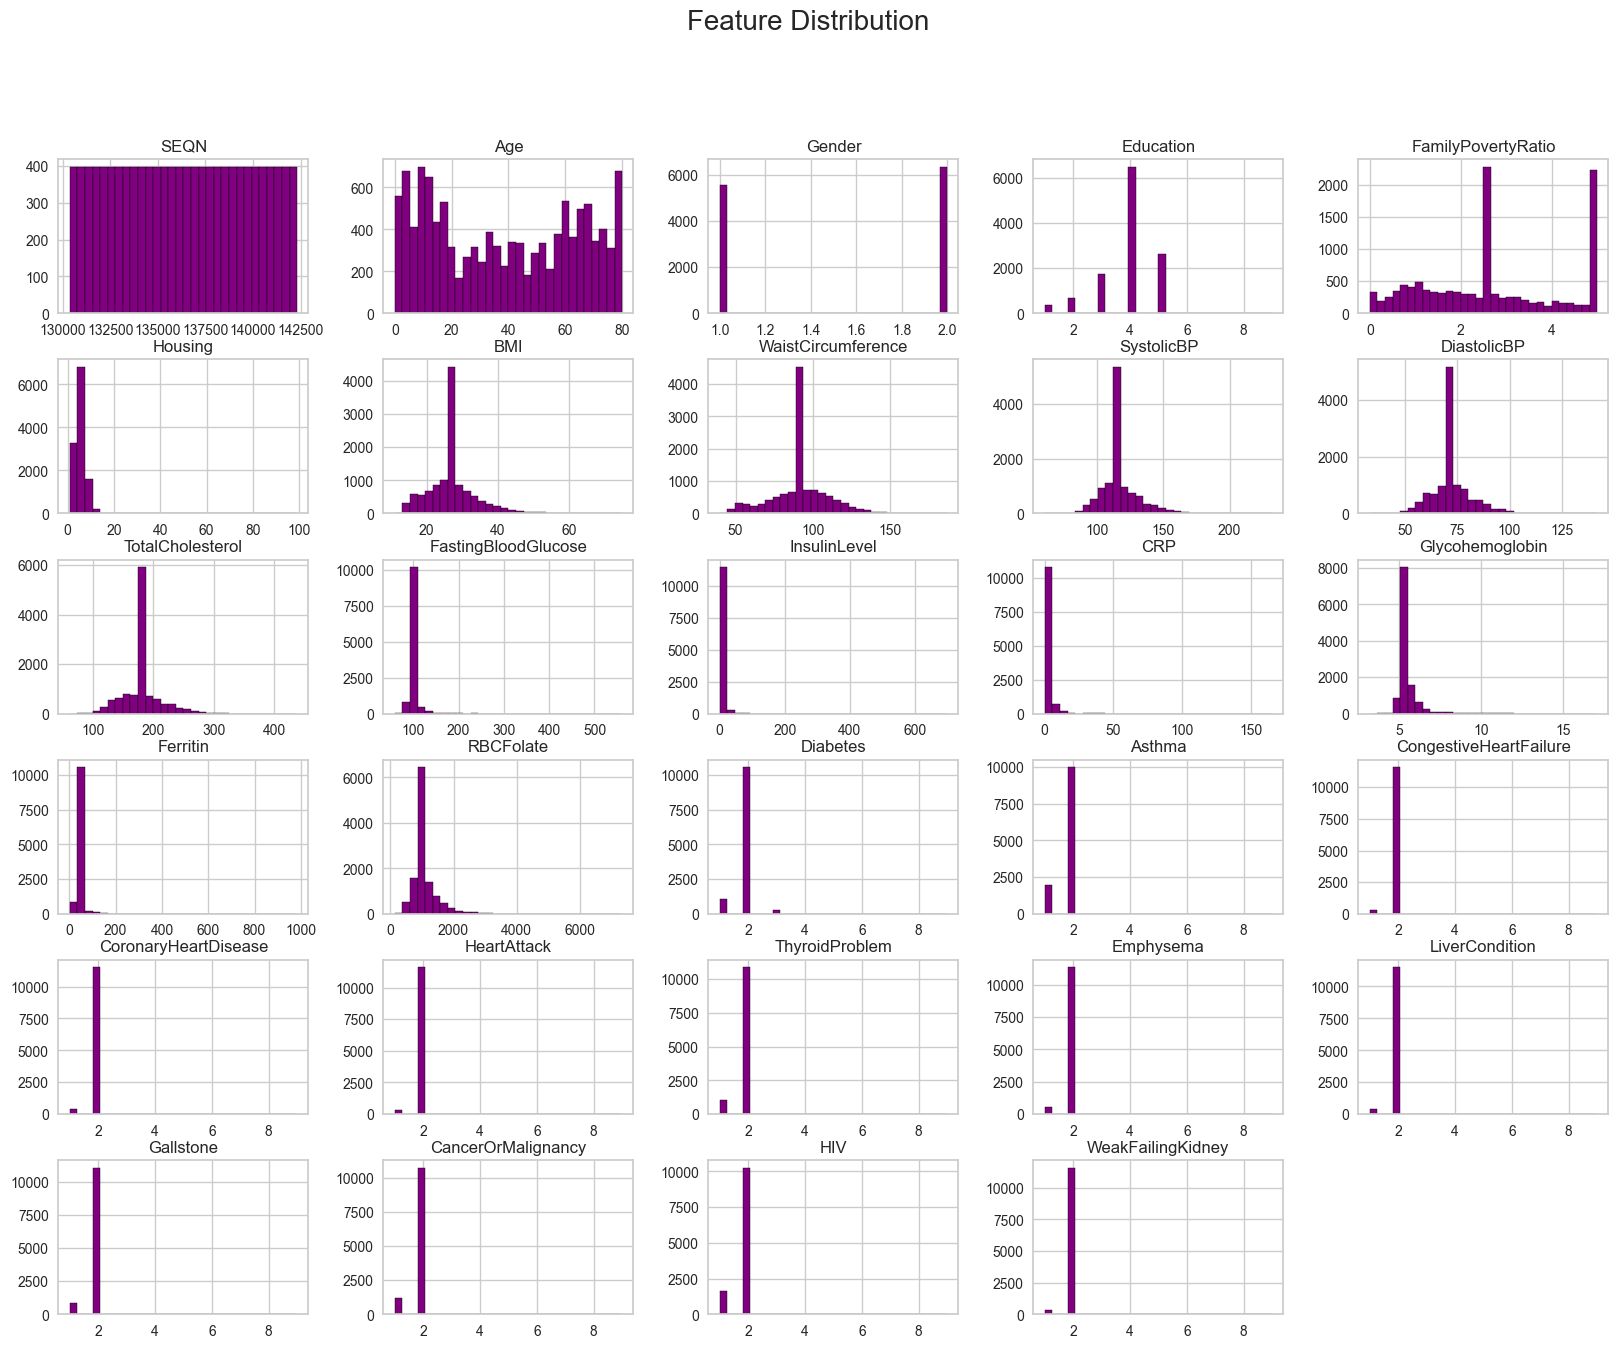

In [234]:
#check featuer distribution
# Plot histograms for feature distribution
df.hist(bins=30, figsize=(20, 15), color='purple', edgecolor='black')
plt.suptitle('Feature Distribution', fontsize=20)
plt.show()


Correlation Heatmap

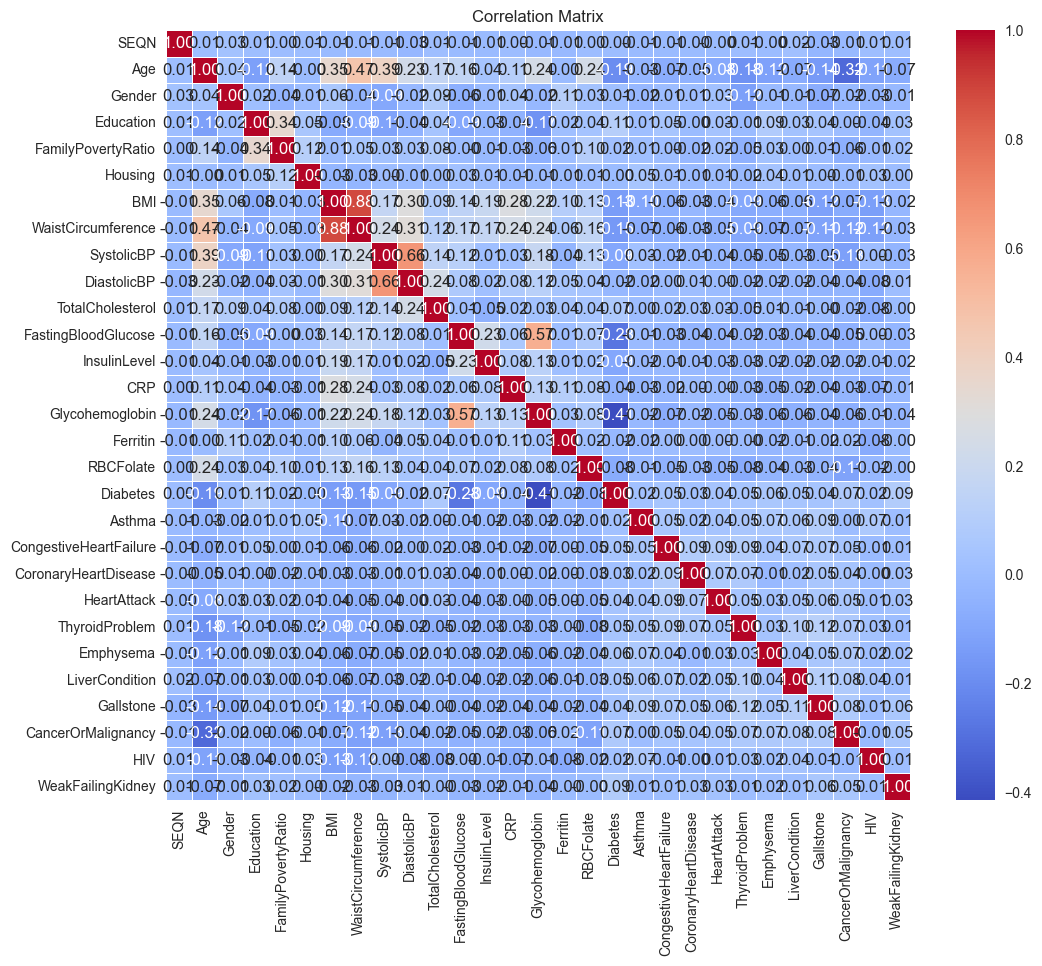

In [235]:
# Compute the correlation matrix
corr = df.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Data cleaning

Changes the values into 0 and 1 in preparation for feature engineering.
0 = no
1 = yes

In [236]:
df.drop(columns=['SEQN','Gender'], inplace=True)

In [237]:
# Drop rows where age is less than 18
df = df[df['Age'] >= 18]

In [238]:
disease_columns = ['Diabetes', 'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 'HeartAttack',
                   'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 'CancerOrMalignancy', 'HIV',
                     'WeakFailingKidney']

# disease_columns = ['Diabetes', 'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 'HeartAttack',
#                    'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 'CancerOrMalignancy', 'HIV',
#                      'HepatitisA', 'HepatitisB', 'WeakFailingKidney', 'TakenPrescriptionMedicine']

for col in disease_columns:
    mode = df[col].mode()[0]
    df[col] = df[col].replace({3: mode, 7: mode, 9: mode, '.': mode})

# # make the 1 to 0 and 2 to 1 in diseases column

for col in disease_columns:
    df[col] = df[col].replace({2: 0})


In [239]:
nan_values = df.isna().sum()
print(nan_values)

Age                       0
Education                 0
FamilyPovertyRatio        0
Housing                   0
BMI                       0
WaistCircumference        0
SystolicBP                0
DiastolicBP               0
TotalCholesterol          0
FastingBloodGlucose       0
InsulinLevel              0
CRP                       0
Glycohemoglobin           0
Ferritin                  0
RBCFolate                 0
Diabetes                  0
Asthma                    0
CongestiveHeartFailure    0
CoronaryHeartDisease      0
HeartAttack               0
ThyroidProblem            0
Emphysema                 0
LiverCondition            0
Gallstone                 0
CancerOrMalignancy        0
HIV                       0
WeakFailingKidney         0
dtype: int64


Using the column's mean  to replace "don't know" and "missing" values 

In [240]:
df['Housing'] = df['Housing'].replace({77: np.nan, 99: np.nan, '.': np.nan})
df['Housing'].fillna(df['Housing'].mean(), inplace=True)

df['Education'] = df['Education'].replace({7: np.nan, 9: np.nan, '.': np.nan})
df['Education'].fillna(df['Education'].mean(), inplace=True)

### Checking Outliers 

In [241]:
df.shape

(8153, 27)

In [242]:
# from scipy.stats import zscore
# #identify outliers
# z_scores = zscore(df)
# abs_z_scores = np.abs(z_scores)  # taking absolute values
# filtered_entries = (abs_z_scores < 3).all(axis=1)  # keeping only the rows without outliers
# outliers = df[~filtered_entries]  # rows with outliers

# # Graph the outliers
# plt.figure(figsize=(10, 8))
# sns.boxplot(data=outliers, palette="viridis")
# plt.title("Outliers in the Dataset")
# plt.xticks(rotation=90)
# plt.show()

# df = df[filtered_entries]

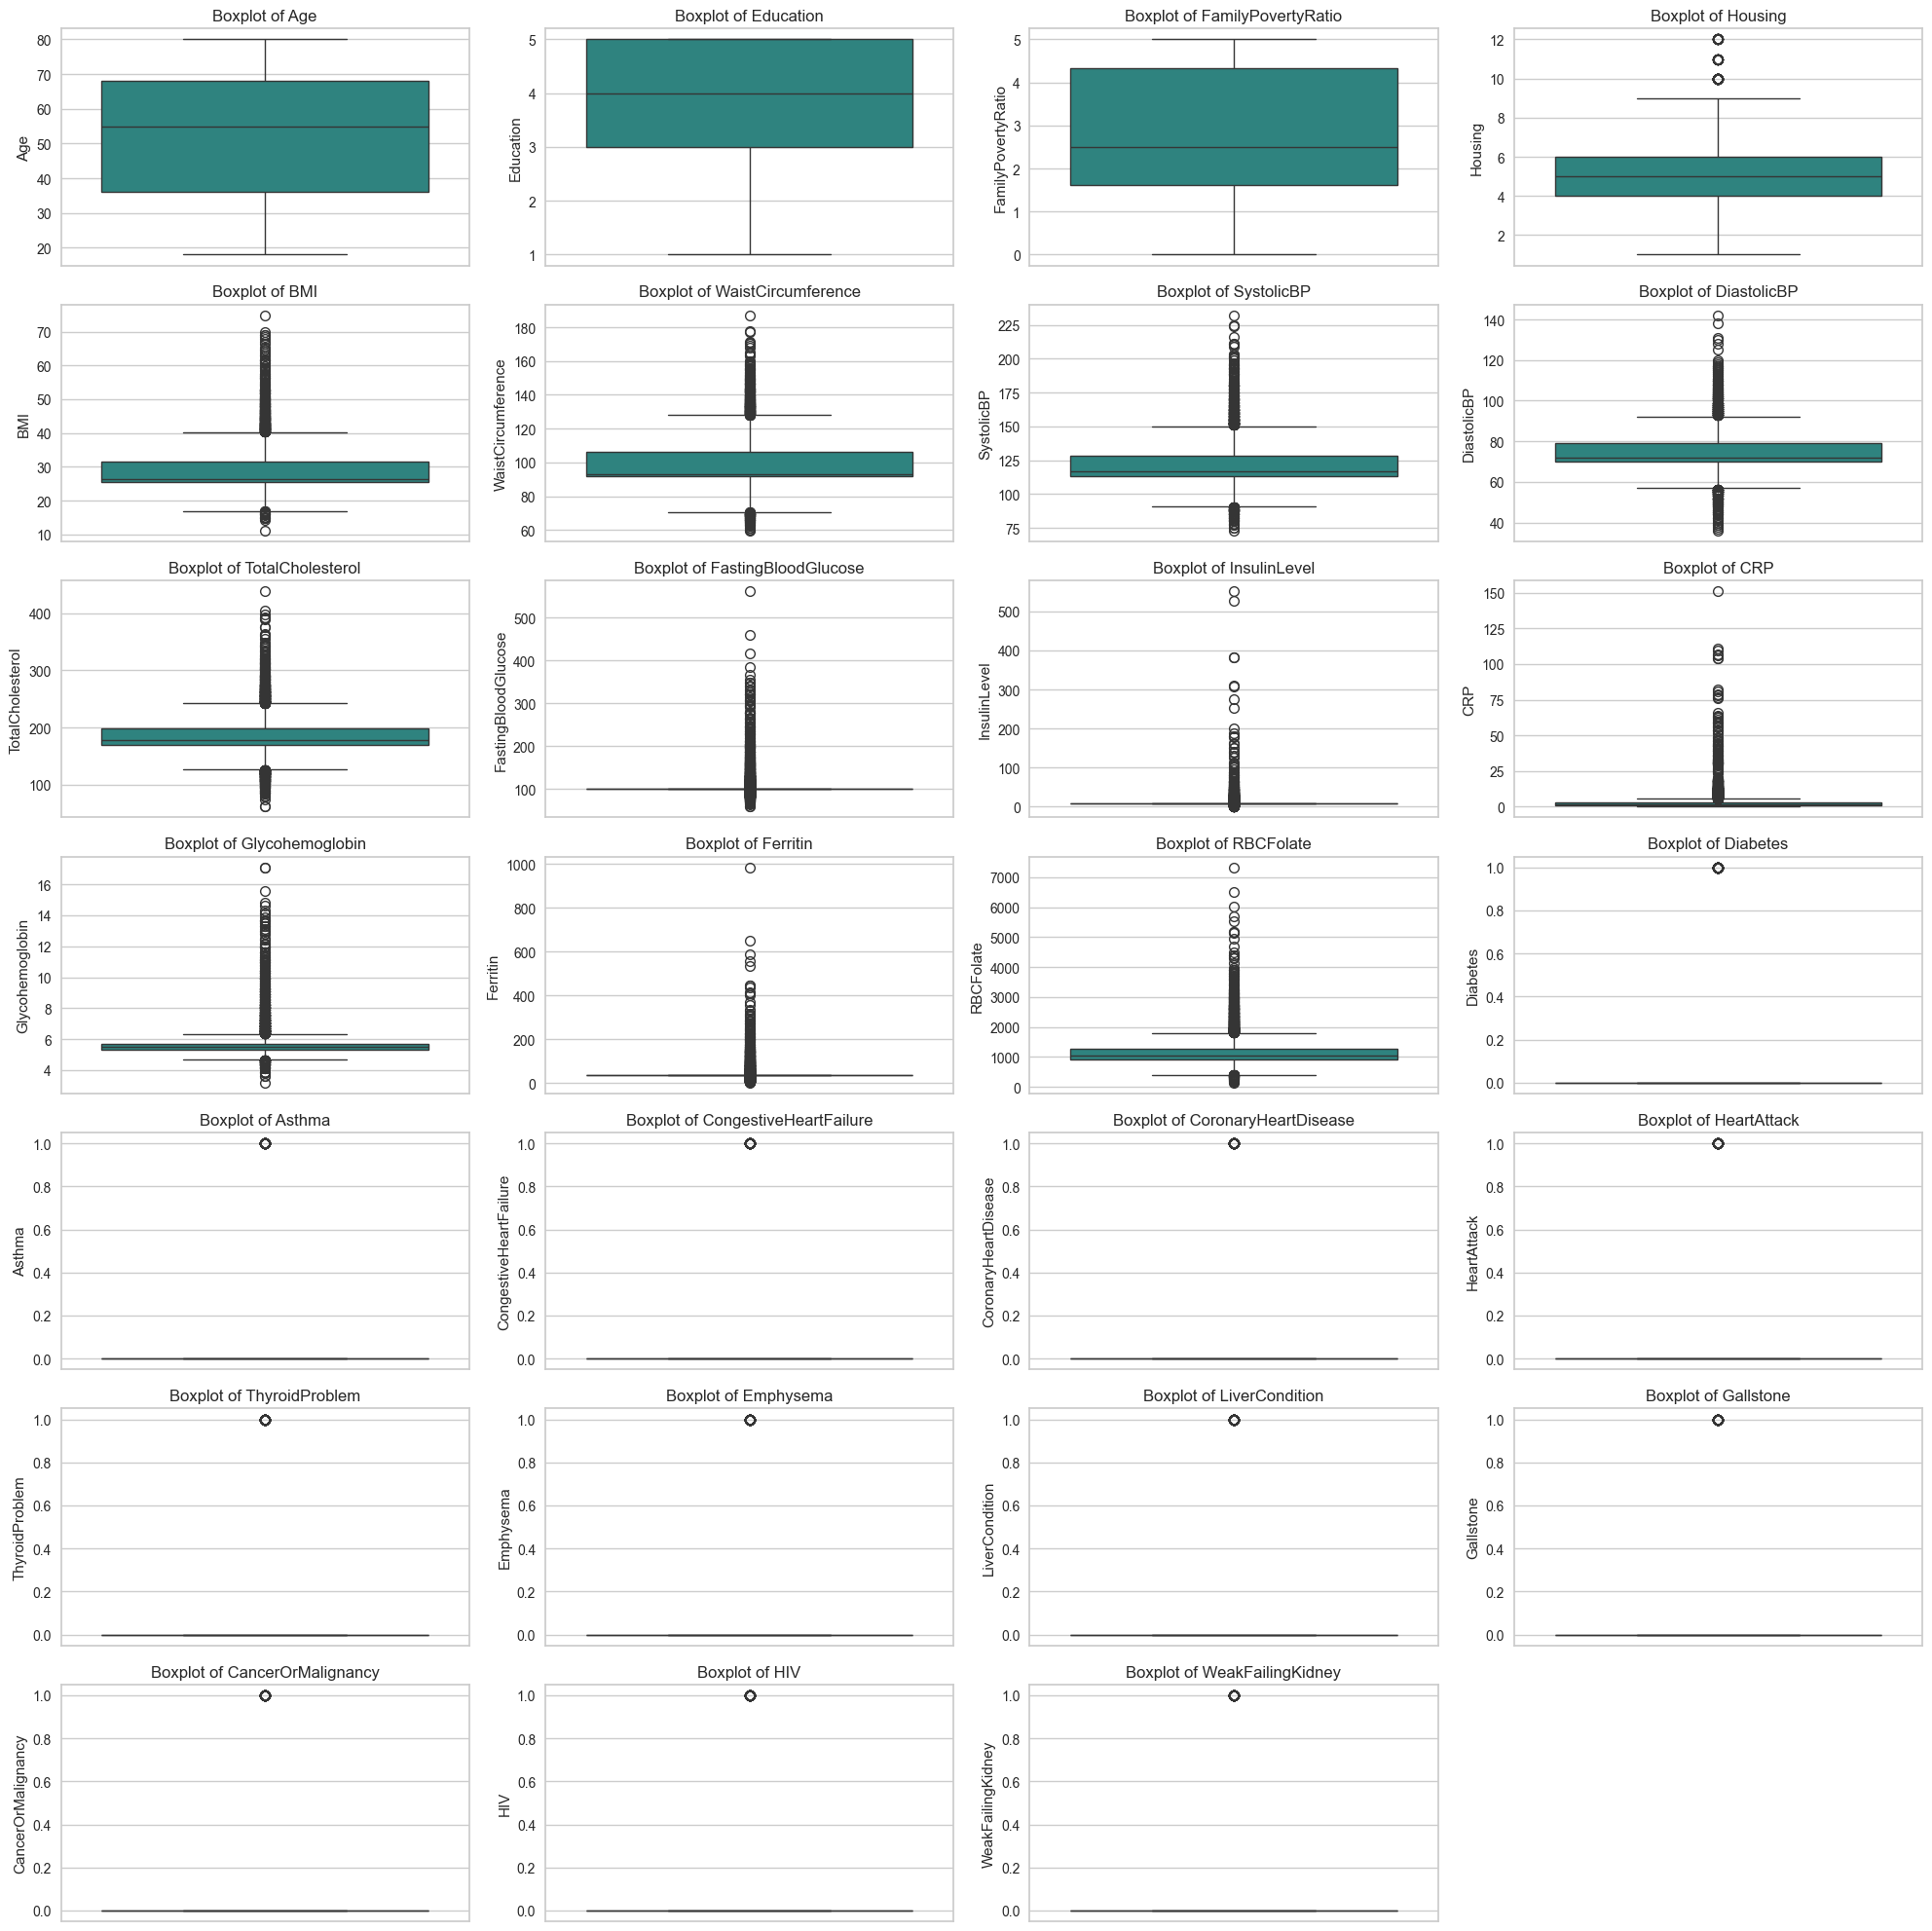

In [243]:
#boxplot for outliers
plt.figure(figsize=(20, 20))
num_columns = len(df.columns)
num_rows = (num_columns // 4) + (1 if num_columns % 4 != 0 else 0)

for i, column in enumerate(df.columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(y=df[column], palette="viridis")
    plt.title(f"Boxplot of {column}")
    plt.tight_layout()
plt.show()


In [244]:
# from scipy.stats import zscore

# # Identify outliers
# z_scores = zscore(df)
# abs_z_scores = np.abs(z_scores)  # Taking absolute values
# filtered_entries = (abs_z_scores < 3)  # Keeping only the rows without outliers

# # Replace outliers with the mean of the respective column
# for col in df.columns:
#     col_mean = df[col].mean()
#     df.loc[~filtered_entries[col], col] = col_mean

# # Graph the outliers
# plt.figure(figsize=(10, 8))
# sns.boxplot(data=df, palette="viridis")
# plt.title("Data After Replacing Outliers with Mean")
# plt.xticks(rotation=90)
# plt.show()

In [245]:
from scipy.stats import zscore

# Identify outliers
z_scores = zscore(df)
abs_z_scores = np.abs(z_scores)  # Taking absolute values
filtered_entries = (abs_z_scores < 3).all(axis=1)  # Keeping only the rows without outliers

# Remove outliers
# df_noOutliers = df[filtered_entries]
df = df[filtered_entries]

# Display the shape of the new DataFrame
# print(df_noOutliers.shape)


In [246]:
df.shape

(5866, 27)

## Feature Engineering 

In [247]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}\n")

Unique values in column 'Age': [43. 66. 44. 65. 34. 68. 27. 59. 31. 33. 74. 39. 51. 56. 47. 26. 18. 73.
 67. 58. 19. 80. 63. 42. 41. 77. 38. 57. 30. 70. 24. 69. 53. 28. 64. 55.
 22. 76. 72. 60. 40. 71. 54. 29. 61. 79. 62. 46. 32. 78. 20. 50. 25. 36.
 52. 48. 45. 37. 49. 23. 35. 75. 21.]

Unique values in column 'Education': [5.         3.         2.         4.         1.         3.80655859]

Unique values in column 'FamilyPovertyRatio': [5.00000000e+00 1.41000000e+00 6.30000000e-01 1.33000000e+00
 1.32000000e+00 8.10000000e-01 2.16000000e+00 9.30000000e-01
 3.04000000e+00 4.82000000e+00 1.67000000e+00 9.10000000e-01
 3.36000000e+00 4.42000000e+00 3.22000000e+00 4.37000000e+00
 3.14000000e+00 5.00000000e-02 2.50000000e+00 2.64000000e+00
 3.82000000e+00 1.91000000e+00 8.80000000e-01 2.46000000e+00
 3.43000000e+00 1.03000000e+00 4.22000000e+00 6.50000000e-01
 4.36000000e+00 3.47000000e+00 2.33000000e+00 4.40000000e-01
 1.12000000e+00 1.08000000e+00 1.14000000e+00 2.11000000e+00
 1.2700000

Grouping the morbidity cases into a single column.
This is basically the total number of disease each participant has at the time of NHANSE questioning.

In [248]:

# Sum all disease-related columns to create a health score
df['MorbidityScore'] = df[['Diabetes', 'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 
                            'HeartAttack', 'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 
                            'CancerOrMalignancy', 'HIV',  'WeakFailingKidney']].sum(axis=1)

# df['MorbidityScore'] = df[['Diabetes', 'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 
#                             'HeartAttack', 'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 
#                             'CancerOrMalignancy', 'HIV', 'HepatitisA', 'HepatitisB', 'WeakFailingKidney', 
#                             'TakenPrescriptionMedicine']].sum(axis=1)

# Drop individual disease columns to avoid redundancy
df = df.drop(columns=['Diabetes', 'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 
                      'HeartAttack', 'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 
                      'CancerOrMalignancy', 'HIV','WeakFailingKidney'])


In [249]:
#Creating a new column called SES_Score which is the sum of the SES columns

df["SES_Score"] = df[["Education", "FamilyPovertyRatio","Housing"]].sum(axis=1)

df.drop(columns=["Education", "FamilyPovertyRatio", "Housing"], inplace=True)

In [250]:
def classify_bp(SystolicBP, DiastolicBP):
    if SystolicBP < 120 and DiastolicBP < 80:
        return 0 #normal
    elif 120 <= SystolicBP < 130 and DiastolicBP < 80:
        return 1 #elevated
    elif 130 <= SystolicBP < 140 or 80 <= DiastolicBP < 90:
        return 2 #hypertension stage 1
    elif SystolicBP >= 140 or DiastolicBP >= 90:
        return 3 #hypertension stage 2
    else:
        return 4 if SystolicBP >= 180 or DiastolicBP >= 120 else "nan" #hypertensive crisis
    

df['BloodPressure'] = df.apply(lambda x: classify_bp(x['SystolicBP'], x['DiastolicBP']), axis=1)
df = df.drop(columns=['SystolicBP', 'DiastolicBP']) # Drop the original blood pressure columns


In [251]:
df["BloodPressure"].value_counts()

BloodPressure
0    3593
2    1260
1     595
3     418
Name: count, dtype: int64

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5866 entries, 0 to 11930
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5866 non-null   float64
 1   BMI                  5866 non-null   float64
 2   WaistCircumference   5866 non-null   float64
 3   TotalCholesterol     5866 non-null   float64
 4   FastingBloodGlucose  5866 non-null   float64
 5   InsulinLevel         5866 non-null   float64
 6   CRP                  5866 non-null   float64
 7   Glycohemoglobin      5866 non-null   float64
 8   Ferritin             5866 non-null   float64
 9   RBCFolate            5866 non-null   float64
 10  MorbidityScore       5866 non-null   float64
 11  SES_Score            5866 non-null   float64
 12  BloodPressure        5866 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 641.6 KB


## Scaling the Dataset

In [253]:
# scaler = MinMaxScaler()
scaler = StandardScaler()

# tried both of them but the result is the same

df_scaled = scaler.fit_transform(df)

# Convert back to a DataFrame with the original column names
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [254]:
df_scaled.head(10)

Age       BMI  WaistCircumference  TotalCholesterol  \
0 -0.320469 -0.181334            0.167929          2.476558   
1  0.913499  1.028841            1.417608          0.903584   
2 -0.266818  0.321354           -0.197830          0.054177   
3 -0.320469 -0.293043           -0.258790         -0.228958   
4  0.859849 -0.293043           -0.258790         -0.228958   
5 -0.803326  0.414444            0.762289         -0.071661   
6  1.020801  2.723087            1.973868          0.557529   
7 -1.178881  2.927886            1.707168         -0.228958   
8  0.537944  0.004847            0.198409         -0.228958   
9 -0.964278  3.356102            2.659667         -0.826689   

   FastingBloodGlucose  InsulinLevel       CRP  Glycohemoglobin  Ferritin  \
0             1.472943      1.073223 -0.208103         0.206020 -0.094609   
1            -0.182216      1.947322 -0.113220         0.206020 -0.094609   
2             6.556645      1.232876  1.249295         1.517481 -1.946888   
3            -0.063990     -0.104217 -0.333348        -0.012557 -0.094609   
4            -0.063990     -0.104217 -0.333348        -0.012557 -0.094609   
5            -0.063990      0.245024 -0.485160        -0.886865 -0.094609   
6            -0.063990     -0.104217  0.619274         0.861751 -0.094609   
7            -0.063990     -0.104217 -0.333348        -1.324019 -0.094609   
8            -0.063990     -0.104217 -0.333348        -0.012557 -0.094609   
9            -0.063990     -0.104217  3.367076         0.861751  0.962766   

   RBCFolate  MorbidityScore  SES_Score  BloodPressure  
0  -1.132581       -0.864360   2.317142       1.226577  
1  -0.489904        1.528436   2.019738       1.226577  
2  -0.771588        2.724834  -0.534960      -0.727817  
3  -0.169933       -0.864360  -1.956549      -0.727817  
4  -0.169933        0.332038   1.127527      -0.727817  
5   1.033378        0.332038  -1.153559      -0.727817  
6  -0.856367        0.332038   0.330485       2.203773  
7  -0.875510       -0.864360  -0.415998       1.226577  
8  -0.659461       -0.864360   0.235316       2.203773  
9   1.115422       -0.864360  -0.311907      -0.727817

## Dataset Profile afte Processing

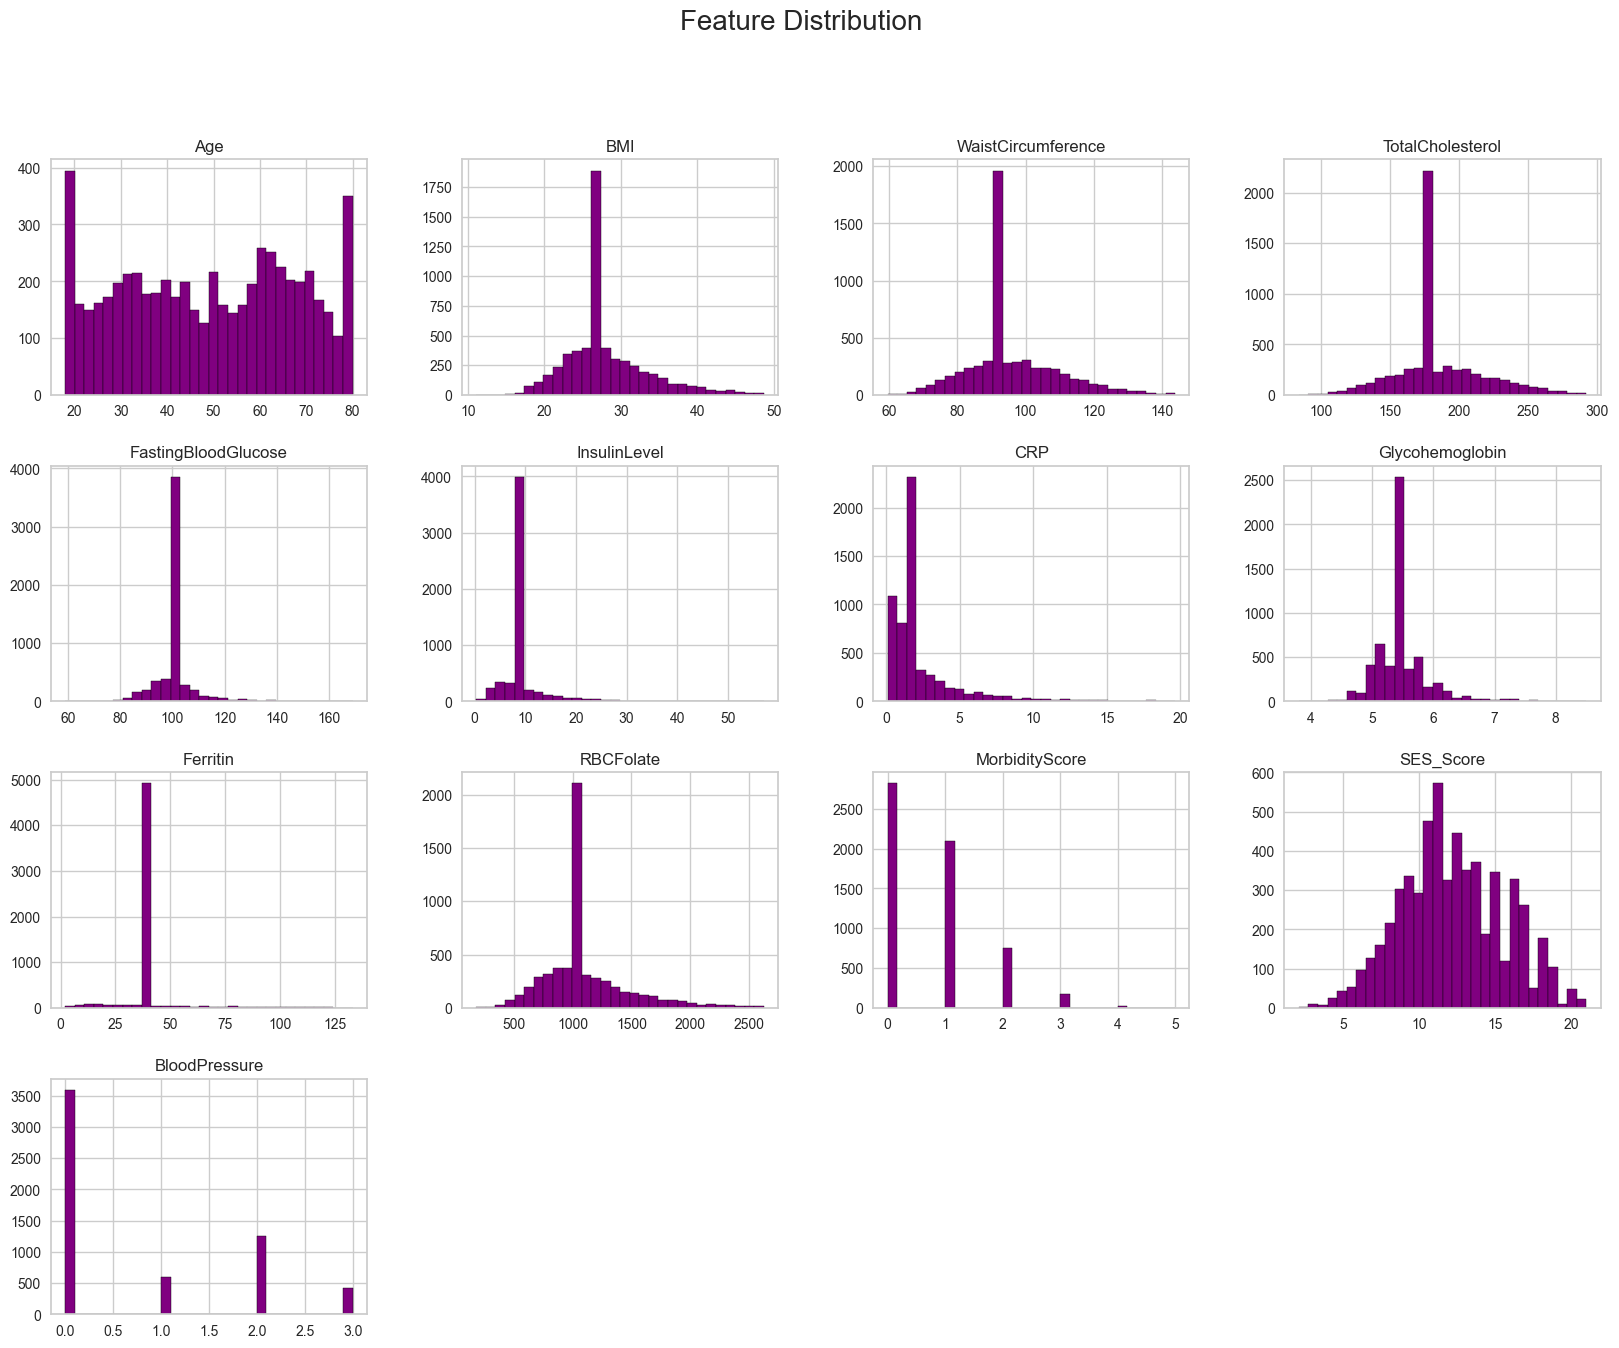

In [255]:
#check featuer distribution
# Plot histograms for feature distribution
df.hist(bins=30, figsize=(20, 15), color='purple', edgecolor='black')
plt.suptitle('Feature Distribution', fontsize=20)
plt.show()

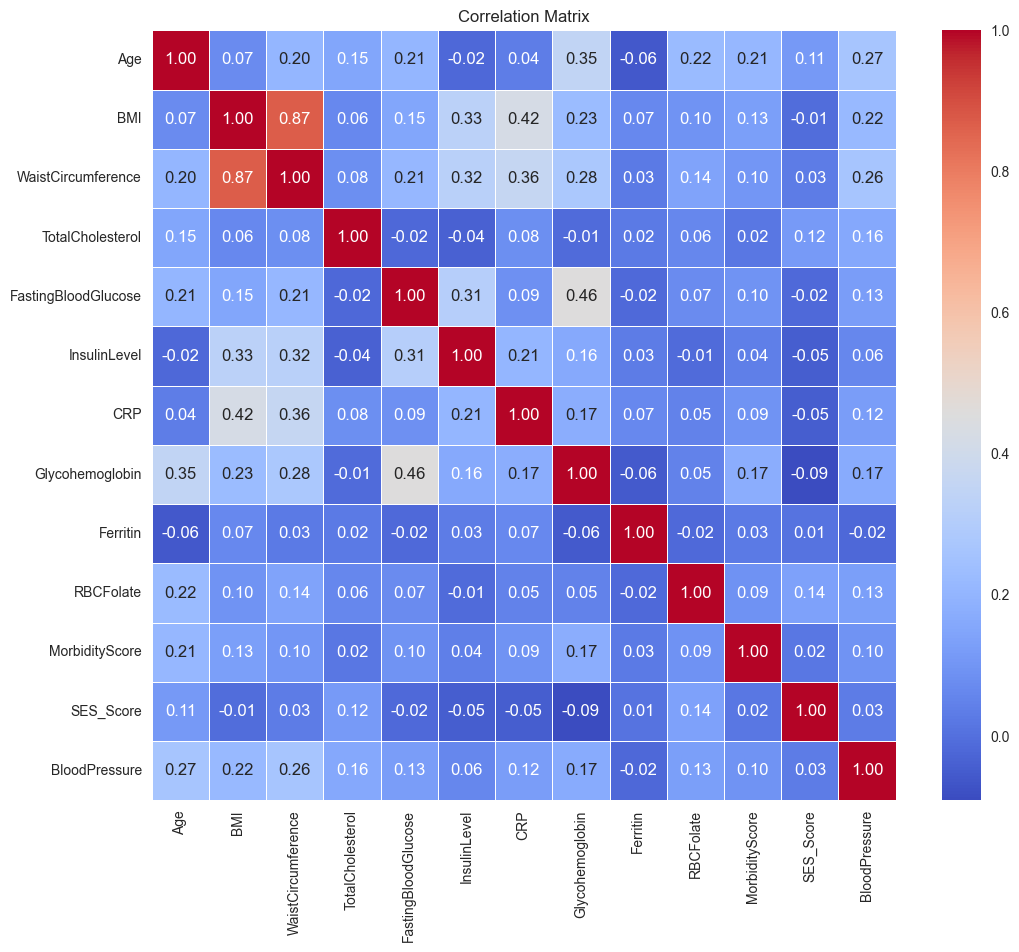

In [256]:
# Compute the correlation matrix
corr = df.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [257]:
##show unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    unique_counts = df[column].value_counts()
    print(f"Unique values in column '{column}': {unique_values}")
    # print(f"Counts of unique values in column '{column}':\n{unique_counts}\n")

Unique values in column 'Age': [43. 66. 44. 65. 34. 68. 27. 59. 31. 33. 74. 39. 51. 56. 47. 26. 18. 73.
 67. 58. 19. 80. 63. 42. 41. 77. 38. 57. 30. 70. 24. 69. 53. 28. 64. 55.
 22. 76. 72. 60. 40. 71. 54. 29. 61. 79. 62. 46. 32. 78. 20. 50. 25. 36.
 52. 48. 45. 37. 49. 23. 35. 75. 21.]
Unique values in column 'BMI': [27.  33.5 29.7 26.4 30.2 42.6 43.7 28.  46.  38.9 43.  46.1 24.4 27.3
 28.7 22.7 28.6 28.3 25.7 25.1 28.1 26.5 36.1 32.9 30.1 26.8 38.4 27.2
 22.2 24.8 30.7 24.9 34.6 34.5 22.  23.  24.7 21.4 22.6 20.7 33.2 16.7
 37.3 41.  29.6 32.2 32.4 30.6 25.3 22.9 24.2 19.9 27.4 22.1 31.  25.2
 19.8 23.7 33.6 27.1 28.2 24.5 35.2 33.4 36.9 27.7 21.8 32.1 29.2 31.6
 36.2 27.6 24.1 23.6 29.4 30.  19.7 20.1 30.4 31.8 29.  19.1 23.3 33.3
 41.5 21.9 26.9 34.3 25.5 38.1 18.6 24.6 21.5 25.9 40.4 20.  23.5 29.8
 26.  18.2 29.3 21.  24.3 21.1 36.8 42.7 20.5 30.3 18.4 21.6 28.5 47.3
 28.8 33.7 26.6 23.8 34.2 20.3 38.2 22.3 31.4 37.  22.8 25.4 38.7 37.4
 32.  35.4 23.2 31.3 27.5 27.8 17.9 20.4 2

In [258]:
df.info()
df.shape  

<class 'pandas.core.frame.DataFrame'>
Index: 5866 entries, 0 to 11930
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5866 non-null   float64
 1   BMI                  5866 non-null   float64
 2   WaistCircumference   5866 non-null   float64
 3   TotalCholesterol     5866 non-null   float64
 4   FastingBloodGlucose  5866 non-null   float64
 5   InsulinLevel         5866 non-null   float64
 6   CRP                  5866 non-null   float64
 7   Glycohemoglobin      5866 non-null   float64
 8   Ferritin             5866 non-null   float64
 9   RBCFolate            5866 non-null   float64
 10  MorbidityScore       5866 non-null   float64
 11  SES_Score            5866 non-null   float64
 12  BloodPressure        5866 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 641.6 KB


(5866, 13)

## Dimensionality Reduction

### 2D

In [259]:
pca_2D = PCA(n_components=2)
pca_2D.fit(df_scaled)

PCA_2D = pd.DataFrame(pca_2D.transform(df_scaled), columns=(["col1","col2"]))
PCA_2D.describe().T

count          mean       std       min       25%       50%       75%  \
col1  5866.0  4.602902e-17  1.701249 -4.551447 -1.025035 -0.390902  0.929204   
col2  5866.0 -2.664838e-17  1.240151 -6.183974 -0.764334  0.001718  0.790546   

           max  
col1  7.595357  
col2  4.647522

In [260]:

explained_variance = pca_2D.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)



Explained variance of PC1 0.22259659617024216
Explained variance of PC2 0.1182855129353221


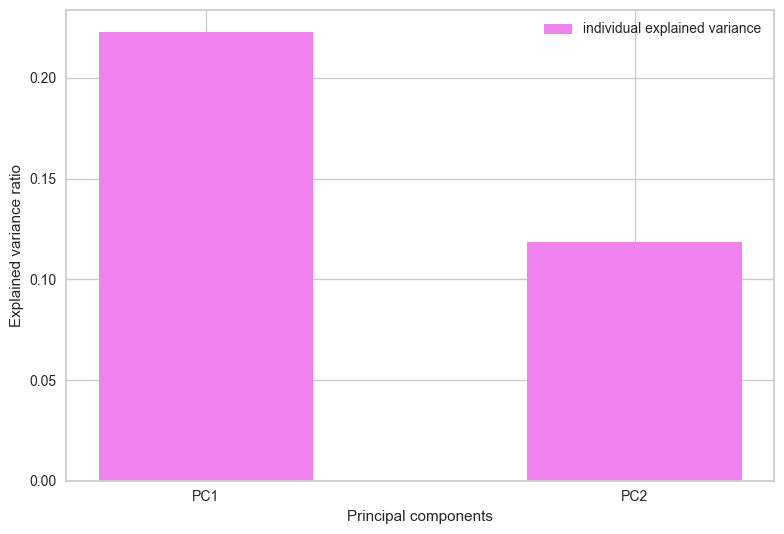

In [261]:
plt.figure()
principalcomponents = ['PC1', 'PC2']

plt.bar(principalcomponents, explained_variance, width=0.5, label='individual explained variance', color='violet')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()


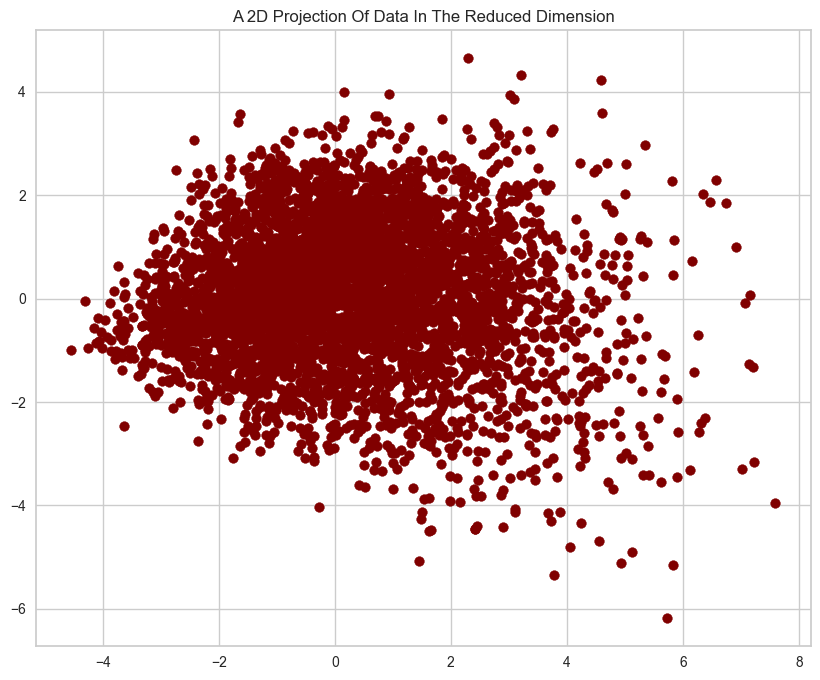

In [262]:
# A 2D Projection Of Data In The Reduced Dimension
x = PCA_2D["col1"]
y = PCA_2D["col2"]

# To plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.scatter(x, y, c="maroon", marker="o")
ax.set_title("A 2D Projection Of Data In The Reduced Dimension")
plt.show()



### 3D


In [263]:
pca_3D = PCA(n_components=3)
pca_3D.fit(df_scaled)

PCA_3D = pd.DataFrame(pca_3D.transform(df_scaled), columns=(["col1","col2", "col3"]))
PCA_3D.describe().T

count          mean       std       min       25%       50%       75%  \
col1  5866.0  4.602902e-17  1.701249 -4.551447 -1.025035 -0.390902  0.929204   
col2  5866.0 -2.664838e-17  1.240151 -6.183974 -0.764334  0.001718  0.790546   
col3  5866.0  3.633870e-18  1.166321 -5.147319 -0.673991  0.105957  0.612928   

           max  
col1  7.595357  
col2  4.647522  
col3  8.277304

In [264]:

explained_variance = pca_3D.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC3", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC3", PC2_explainedvariance)

PC3_explainedvariance = explained_variance[2]
print("Explained variance of PC3", PC3_explainedvariance)

loadings = pca_3D.components_.T * np.sqrt(pca_3D.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=df_scaled.columns)
loading_matrix


Explained variance of PC3 0.22259659617024216
Explained variance of PC3 0.1182855129353221
Explained variance of PC3 0.10462099827603402


PC1       PC2       PC3
Age                  0.415715  0.665902  0.051715
BMI                  0.787535 -0.377864 -0.261050
WaistCircumference   0.826321 -0.245584 -0.232398
TotalCholesterol     0.148640  0.276420 -0.474361
FastingBloodGlucose  0.487515  0.153718  0.563503
InsulinLevel         0.473043 -0.376320  0.238882
CRP                  0.524299 -0.316114 -0.185656
Glycohemoglobin      0.567504  0.242787  0.513045
Ferritin             0.029314 -0.214310 -0.207948
RBCFolate            0.241985  0.406416 -0.260665
MorbidityScore       0.292810  0.279716  0.074559
SES_Score            0.014024  0.326858 -0.432360
BloodPressure        0.438837  0.307812 -0.185713

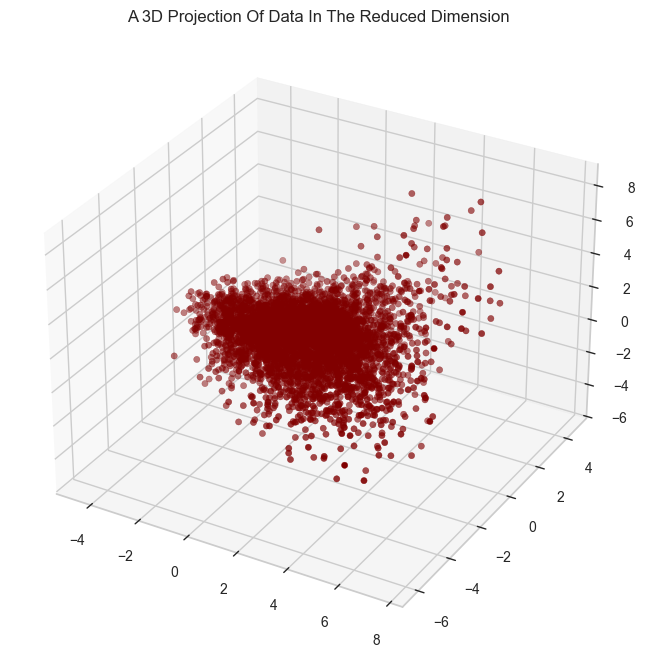

In [265]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_3D["col1"]
y =PCA_3D["col2"]
z =PCA_3D["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## K-Means

In [266]:
kmeans_df = df.copy()
kmeans_df_scaled = df_scaled.copy()
kmeans_pca2D = PCA_2D.copy()
kmeans_pca3D = PCA_3D.copy()

### Without PCA

#### Scaled

In [267]:
withouPCA_scaled_kmeans_df = df.copy()
withouPCA_scaled_kmeans_df_scaled = df_scaled.copy()

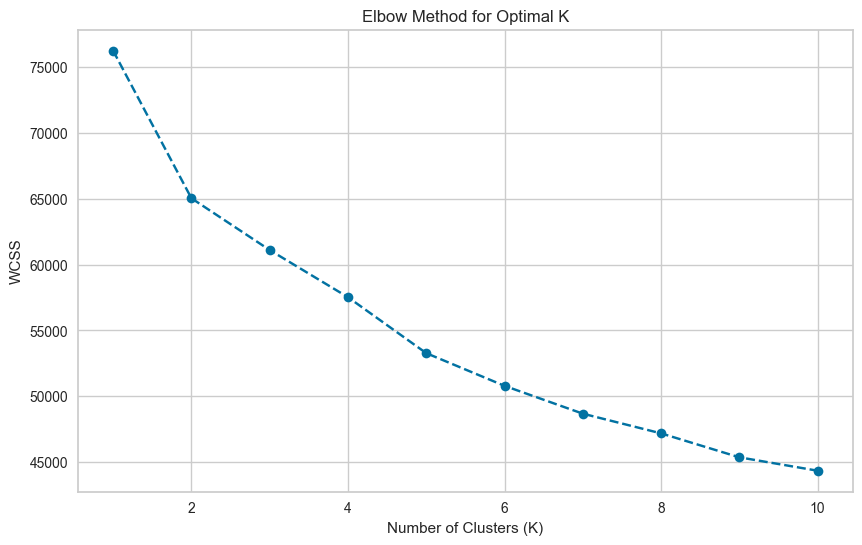

In [268]:
# Elbow Method for KMeans
wcss = []  # Store WCSS values

for k in range(1, 11):  # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(withouPCA_scaled_kmeans_df_scaled)  # Use the scaled data
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

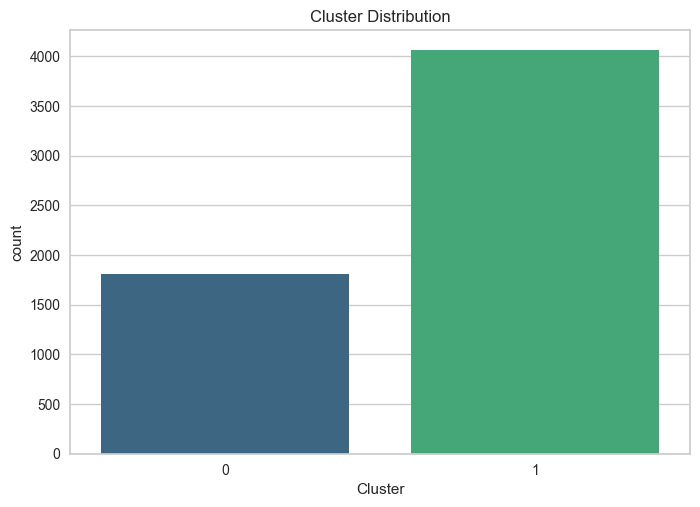

The average silhouette score is: 0.24216812480071792


In [269]:
from sklearn.metrics import silhouette_score

# Fit the KMeans model to the scaled data
kmeans = KMeans(
    n_clusters=2,
    random_state=42
)
withouPCA_scaled_kmeans_df_scaled['Cluster'] = kmeans.fit_predict(withouPCA_scaled_kmeans_df_scaled)

# Visualize Cluster Distribution
sns.countplot(x=withouPCA_scaled_kmeans_df_scaled['Cluster'], palette='viridis')
plt.title('Cluster Distribution')
plt.show()

# Calculate and print the silhouette score
silhouette_avg = silhouette_score(withouPCA_scaled_kmeans_df_scaled, kmeans.labels_)
print(f"The average silhouette score is: {silhouette_avg}")

In [270]:
# Calculate the average of each column
column_means = df.mean()

# Convert the result to a DataFrame
column_means_df = column_means.to_frame(name='Average')

# Display the DataFrame
column_means_df

Average
Age                    48.973236
BMI                    27.973969
WaistCircumference     96.096198
TotalCholesterol      185.277872
FastingBloodGlucose   100.541255
InsulinLevel           10.152216
CRP                     2.328316
Glycohemoglobin         5.505745
Ferritin               39.261597
RBCFolate            1112.137232
MorbidityScore          0.722468
SES_Score              12.208765
BloodPressure           0.744801

In [271]:
# Group by cluster labels and calculate the mean for each group
cluster_means = withouPCA_scaled_kmeans_df_scaled.groupby('Cluster').mean()

# Convert the cluster means to a DataFrame
cluster_means_df = pd.DataFrame(cluster_means)

# Display the DataFrame
cluster_means_df.head()

Age       BMI  WaistCircumference  TotalCholesterol  \
Cluster                                                             
0        0.410739  1.005873            1.048060          0.166132   
1       -0.182708 -0.447440           -0.466206         -0.073900   

         FastingBloodGlucose  InsulinLevel       CRP  Glycohemoglobin  \
Cluster                                                                 
0                   0.478892      0.495421  0.664206         0.599240   
1                  -0.213024     -0.220377 -0.295457        -0.266559   

         Ferritin  RBCFolate  MorbidityScore  SES_Score  BloodPressure  
Cluster                                                                 
0        0.034340   0.352928        0.312827   0.037908       0.701185  
1       -0.015275  -0.156992       -0.139154  -0.016863      -0.311906

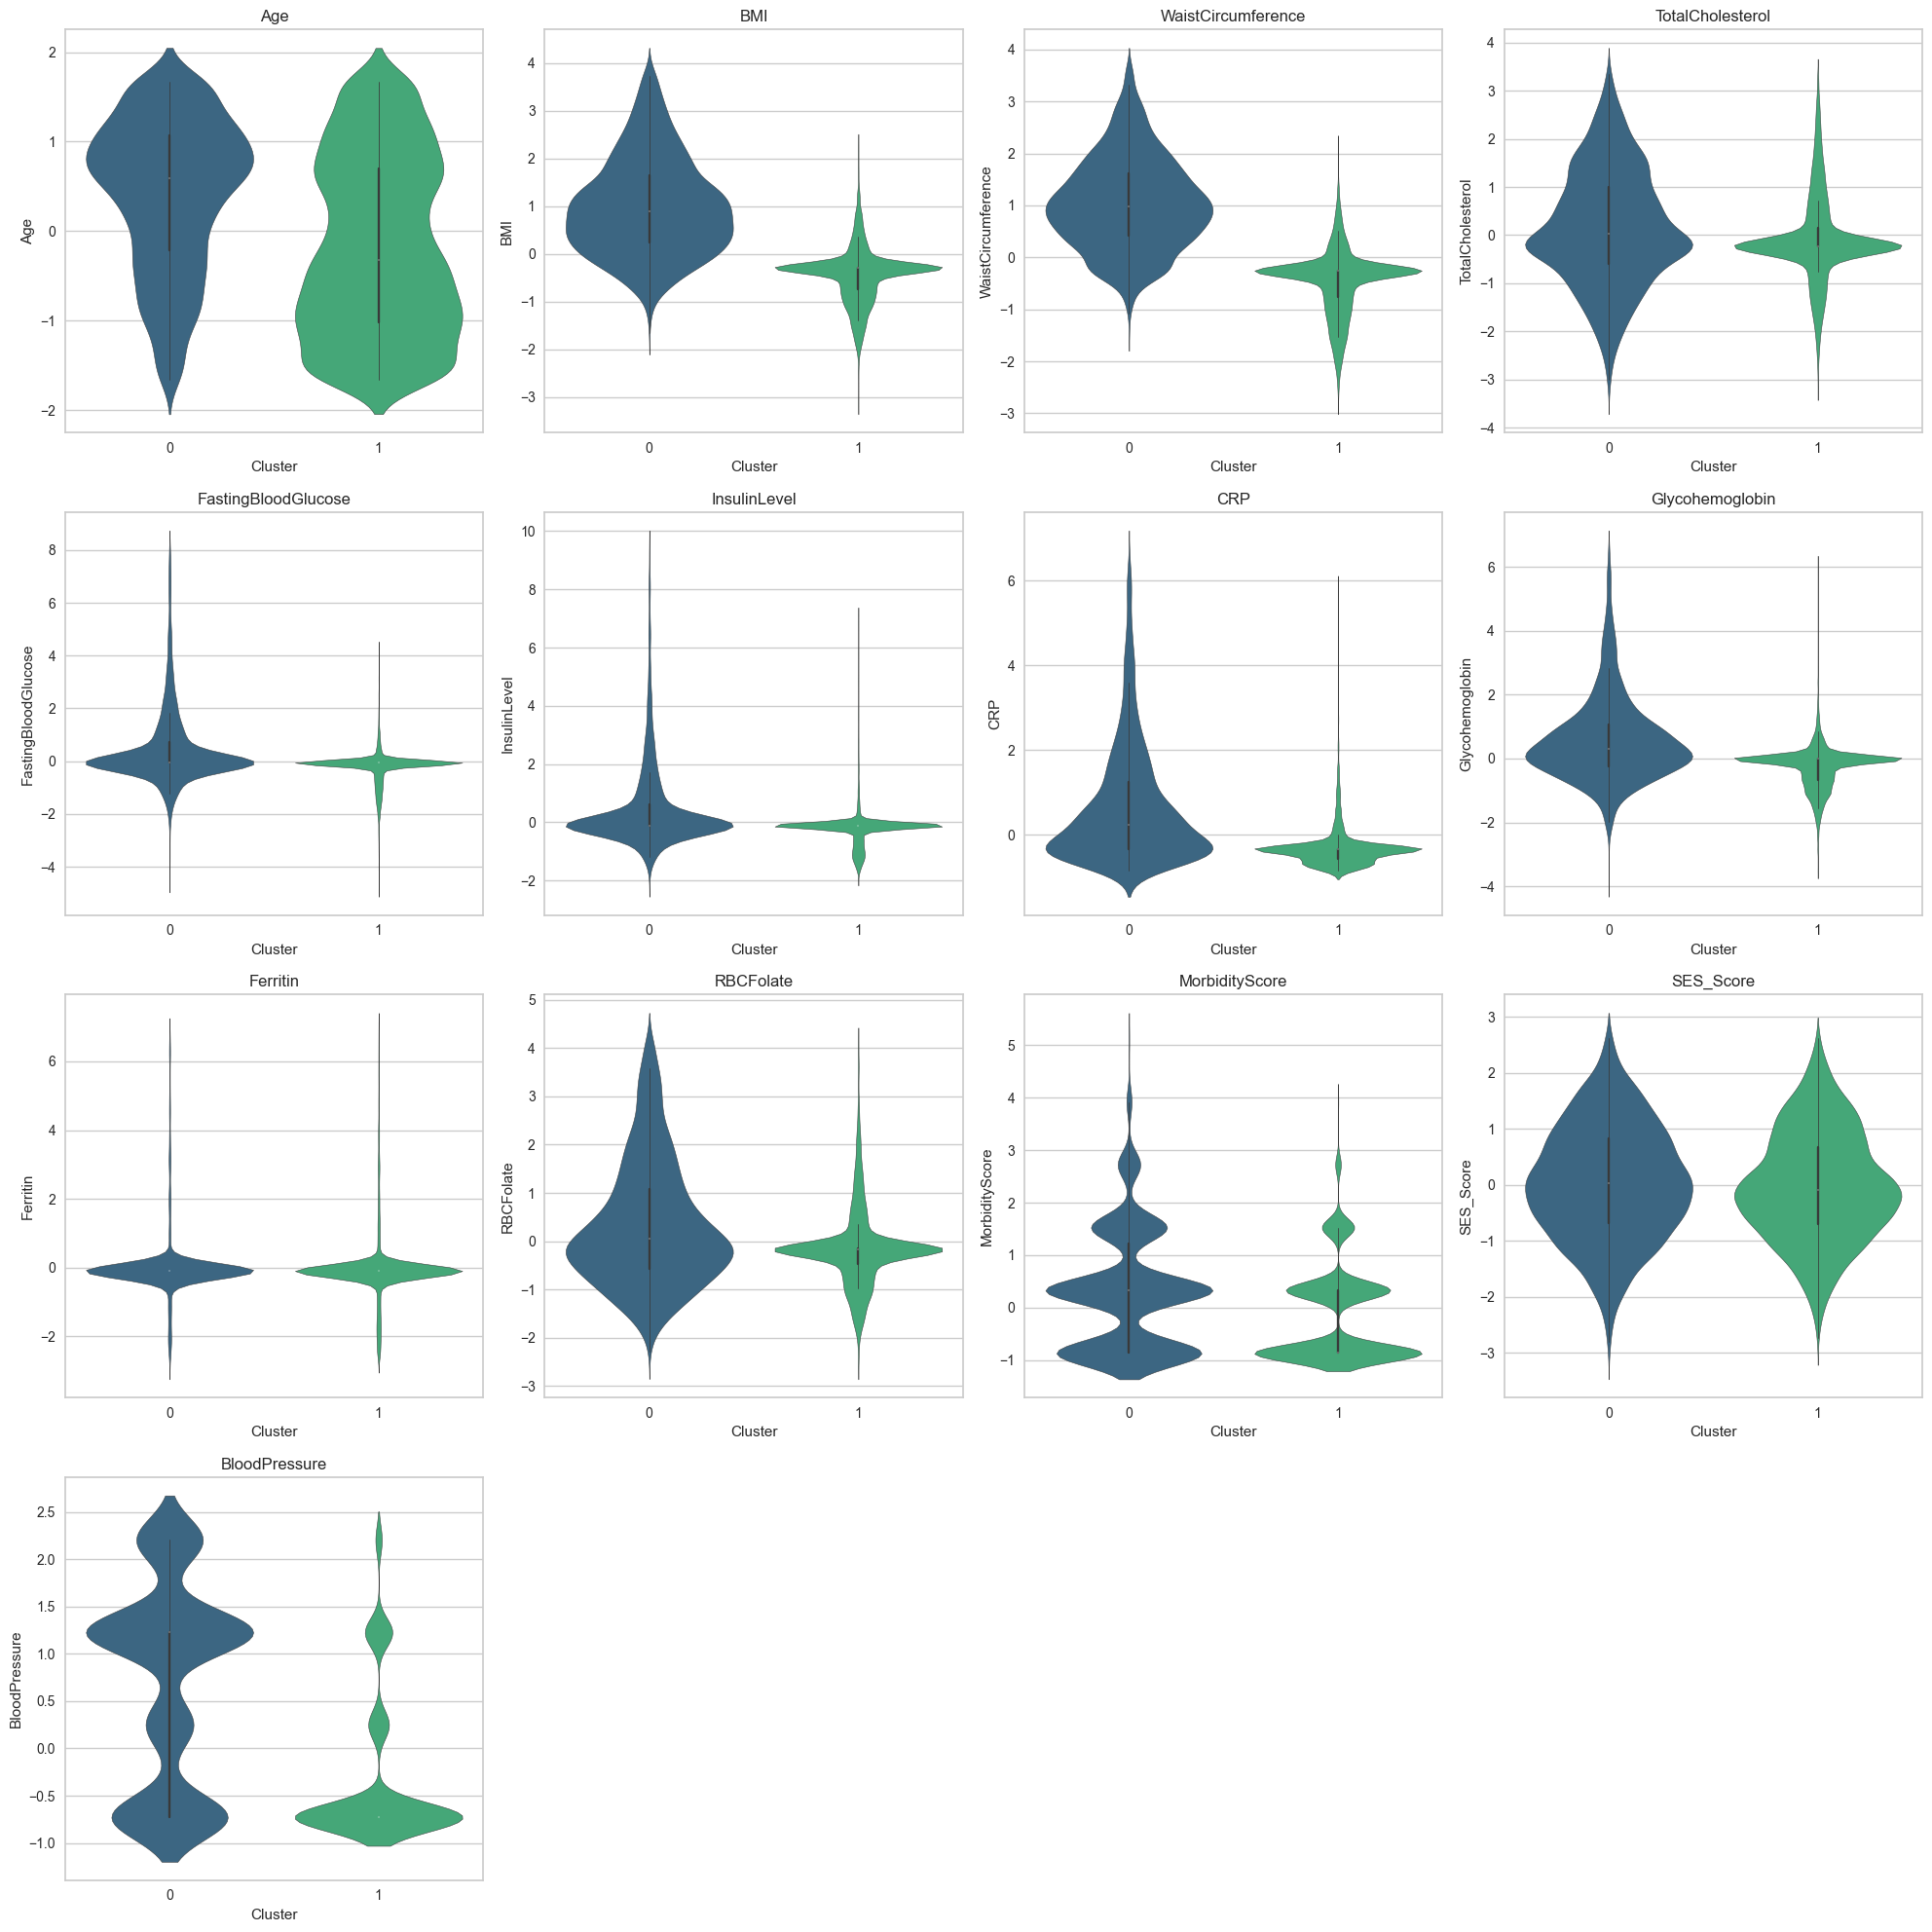

In [272]:

warnings.simplefilter(action='ignore', category=FutureWarning)

# Determine the number of columns and rows for the grid
num_columns = 4
num_rows = (len(withouPCA_scaled_kmeans_df_scaled.columns) - 1) // num_columns + 1  # -1 to exclude 'Cluster' column

plt.figure(figsize=(20, num_rows * 5))

# Create a subplot for each column
for i, col in enumerate(withouPCA_scaled_kmeans_df_scaled.columns):
    if col != 'Cluster':
        plt.subplot(num_rows, num_columns, i + 1)
        sns.violinplot(y=withouPCA_scaled_kmeans_df_scaled[col], x=withouPCA_scaled_kmeans_df_scaled["Cluster"], palette="viridis")
        plt.title(f'{col}')

plt.tight_layout()
plt.show()




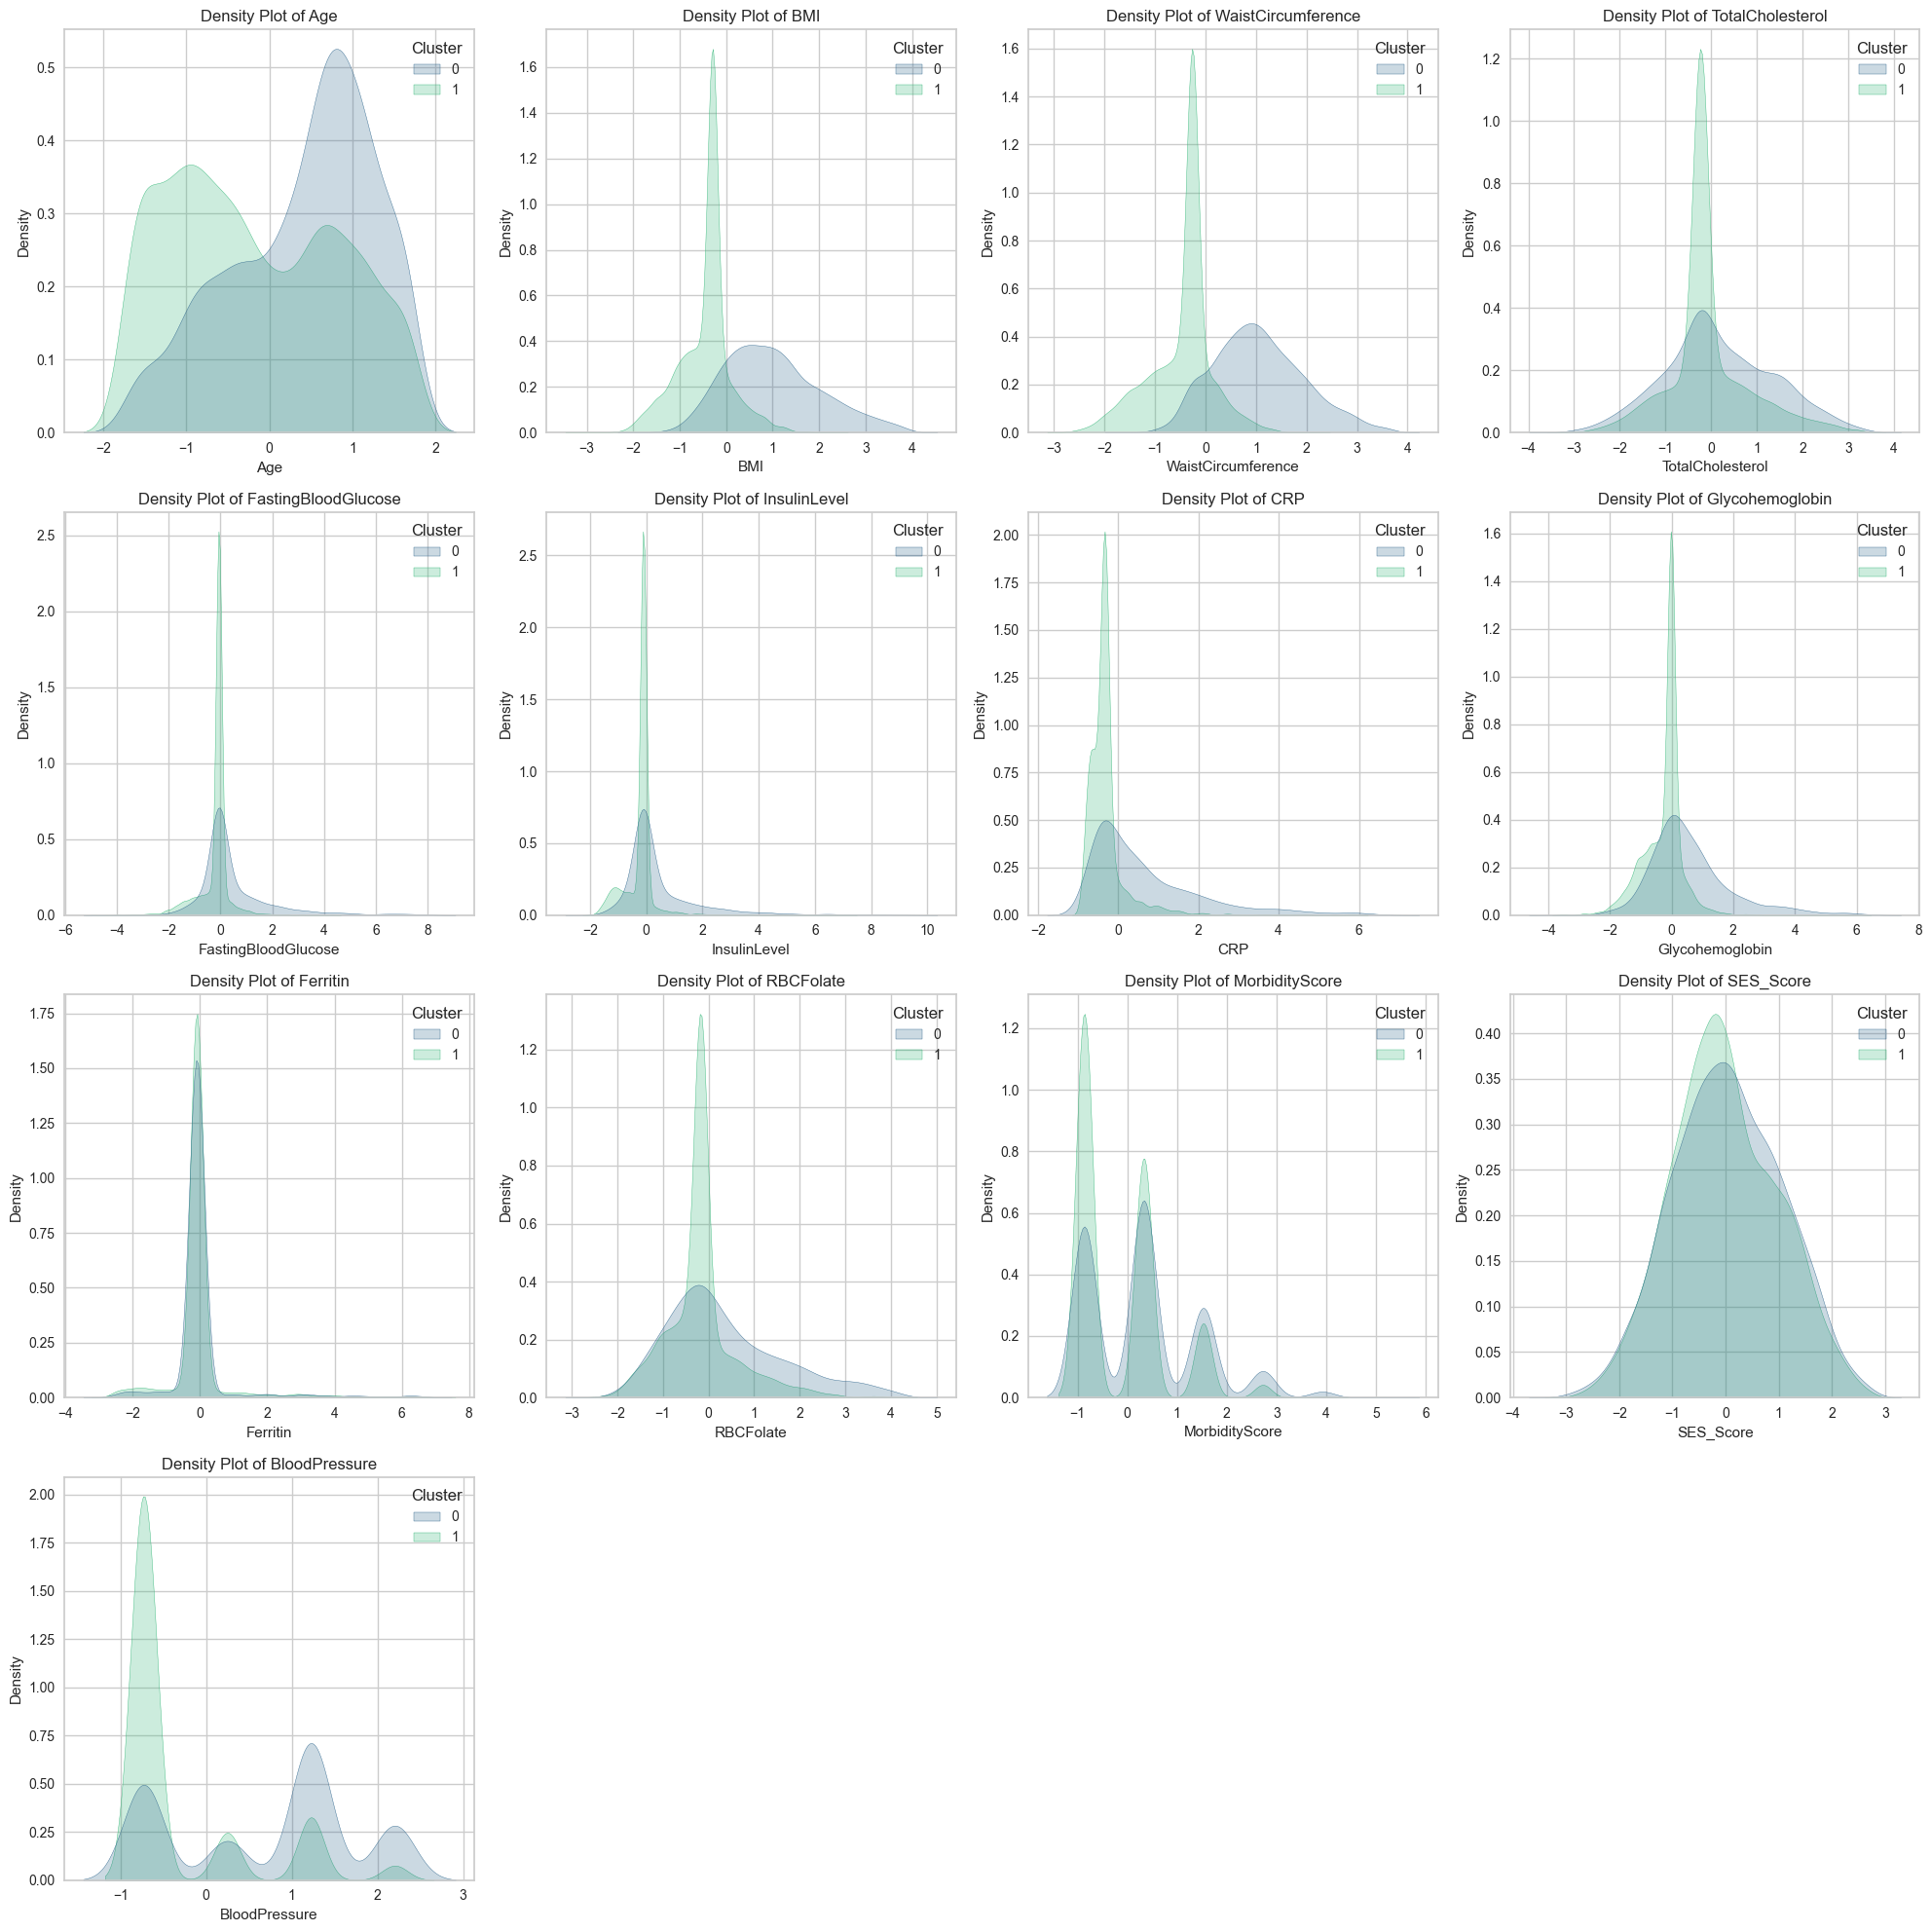

In [273]:
warnings.simplefilter(action='ignore', category=FutureWarning)

num_columns = 4
num_rows = (len(withouPCA_scaled_kmeans_df_scaled.columns) - 1) // num_columns + 1  # -1 to exclude 'Cluster' column

plt.figure(figsize=(20, num_rows * 5))

for i, col in enumerate(withouPCA_scaled_kmeans_df_scaled.columns):
    if col != 'Cluster':
        plt.subplot(num_rows, num_columns, i + 1)
        sns.kdeplot(data=withouPCA_scaled_kmeans_df_scaled, x=col, hue="Cluster", fill=True, common_norm=False, palette="viridis")
        plt.title(f'Density Plot of {col}')

plt.tight_layout()
plt.show()

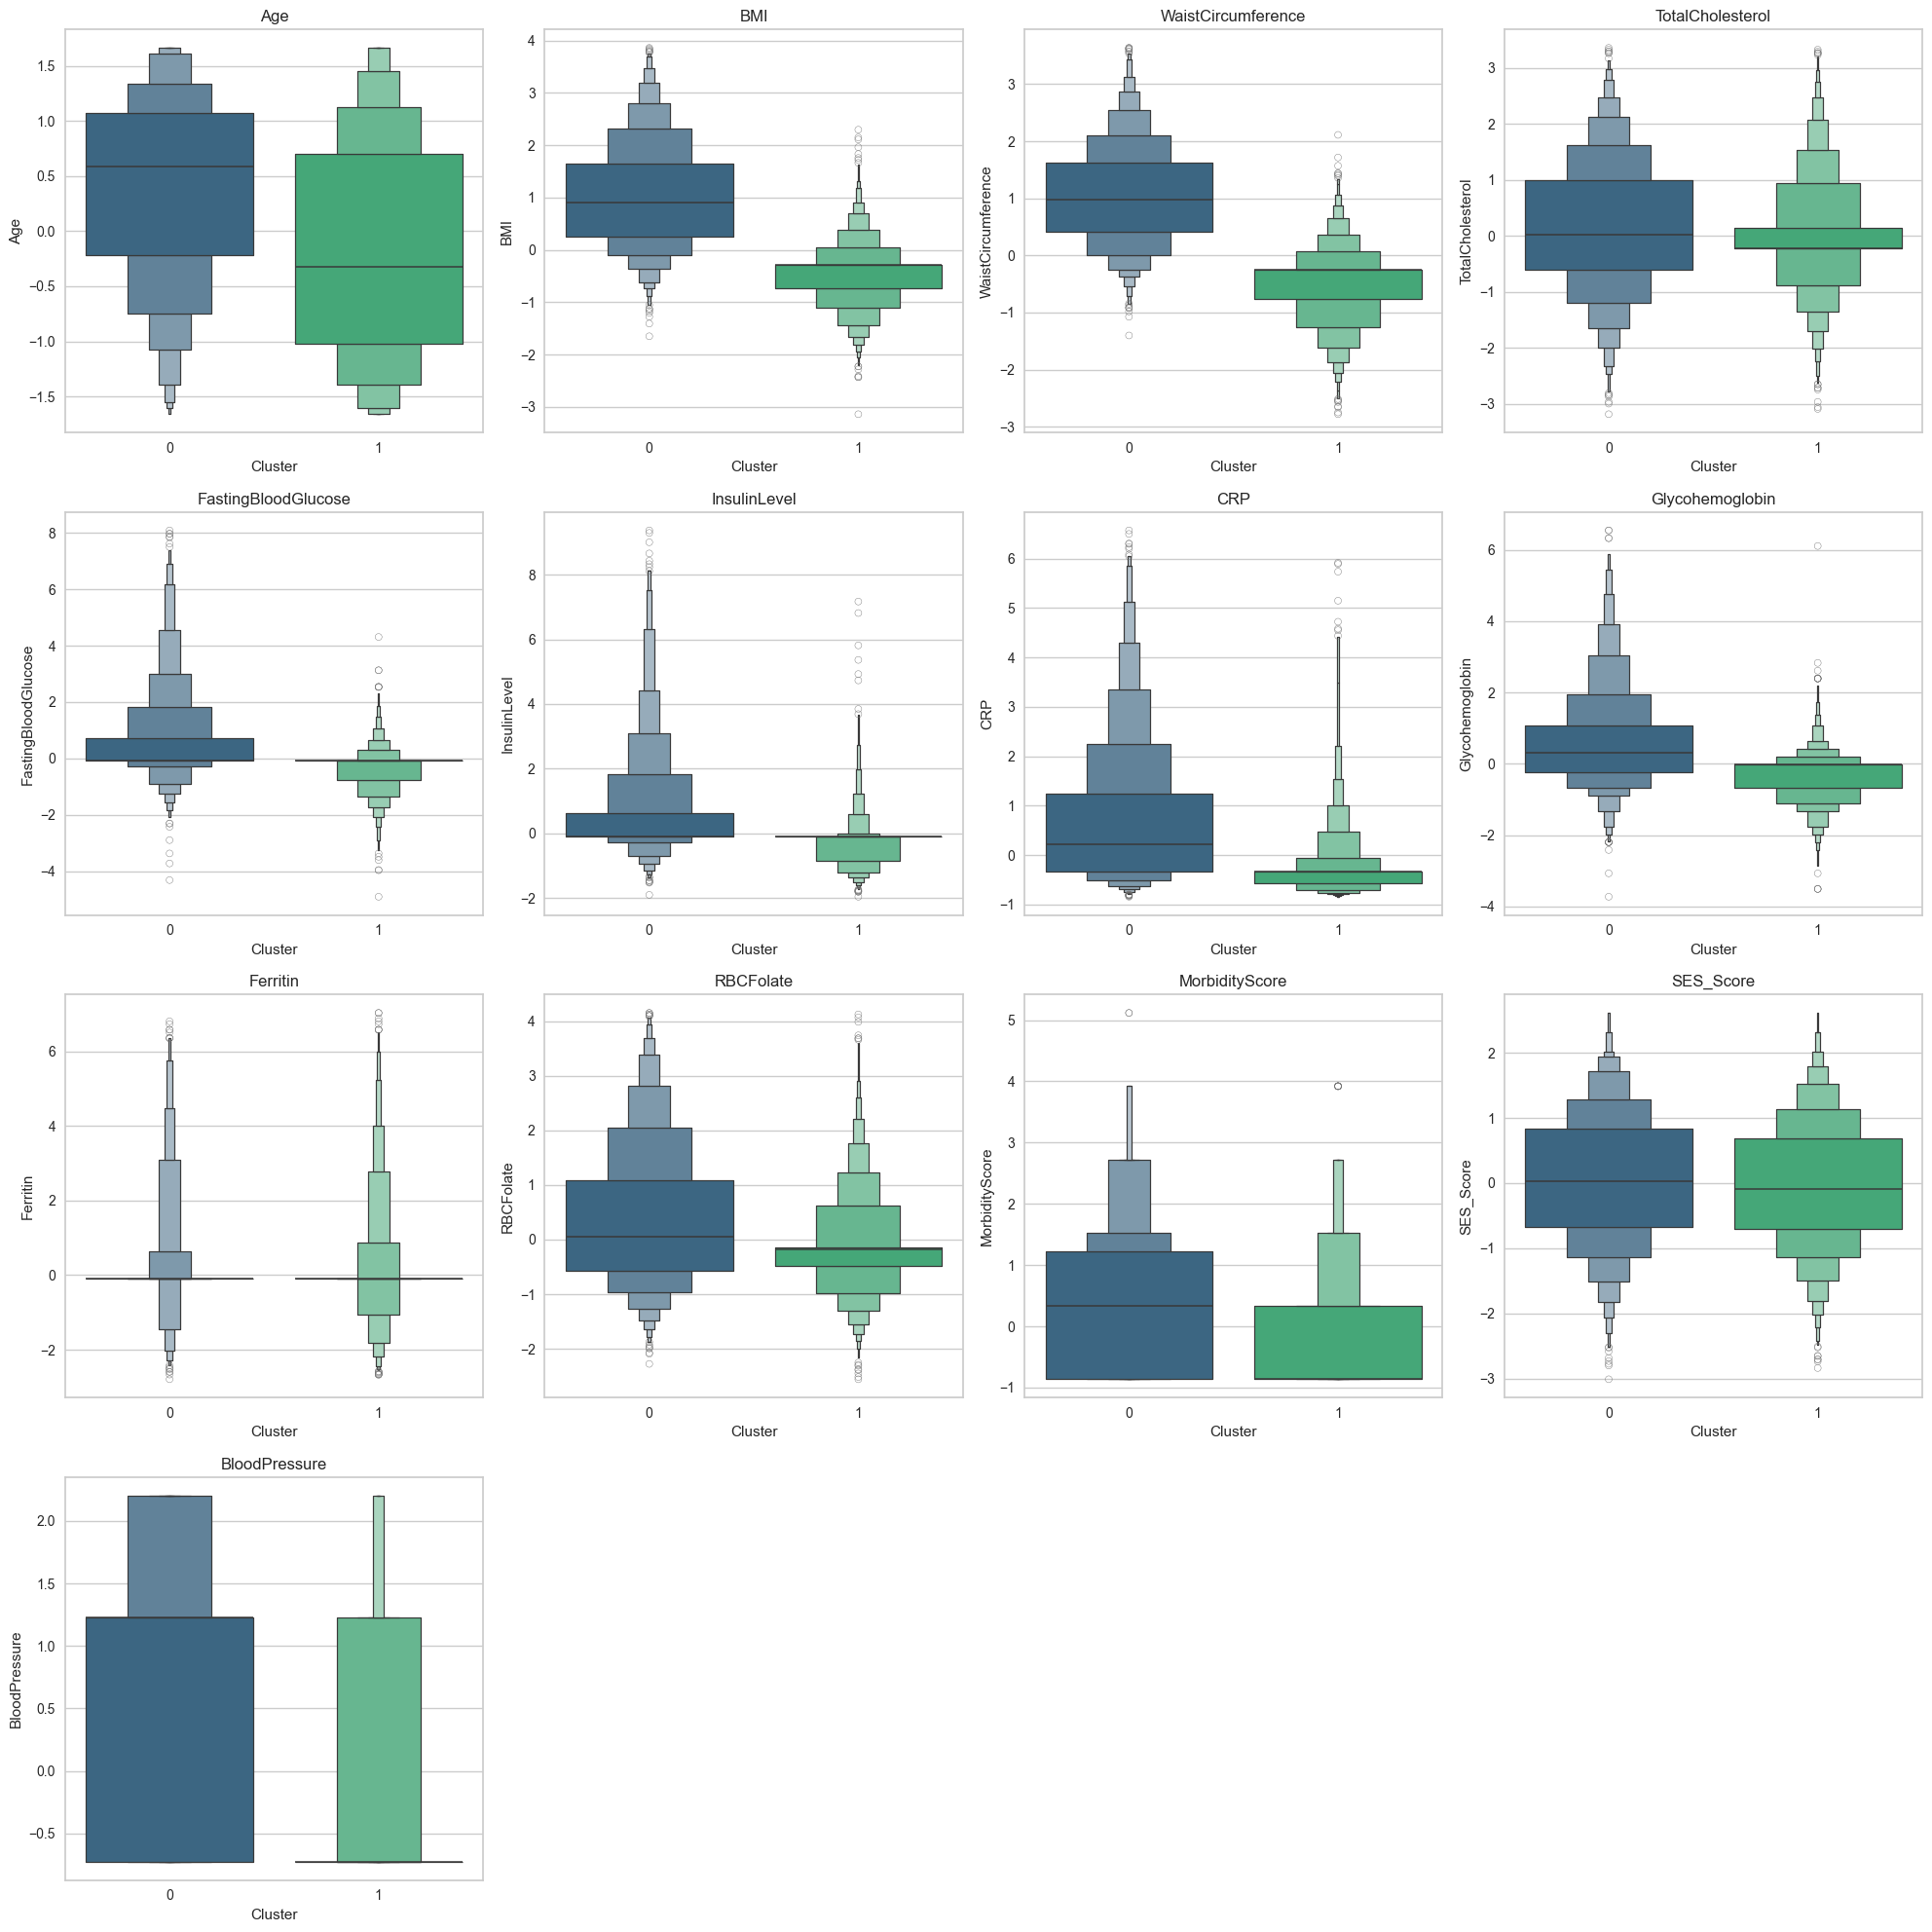

In [274]:
num_columns = 4
num_rows = (len(withouPCA_scaled_kmeans_df_scaled.columns) - 1) // num_columns + 1  # -1 to exclude 'Cluster' column

plt.figure(figsize=(20, num_rows * 5))

for i, col in enumerate(withouPCA_scaled_kmeans_df_scaled.columns):
  if col != 'Cluster':
    plt.subplot(num_rows, num_columns, i + 1)
    sns.boxenplot(y=withouPCA_scaled_kmeans_df_scaled[col], x=withouPCA_scaled_kmeans_df_scaled["Cluster"], palette="viridis")
    plt.title(f'{col}')

plt.tight_layout()
plt.show()



#### Not Scaled

In [307]:
withouPCA_Notscaled_kmeans_df = df.copy()
withouPCA_Notscaled_kmeans_df_scaled = df_scaled.copy()

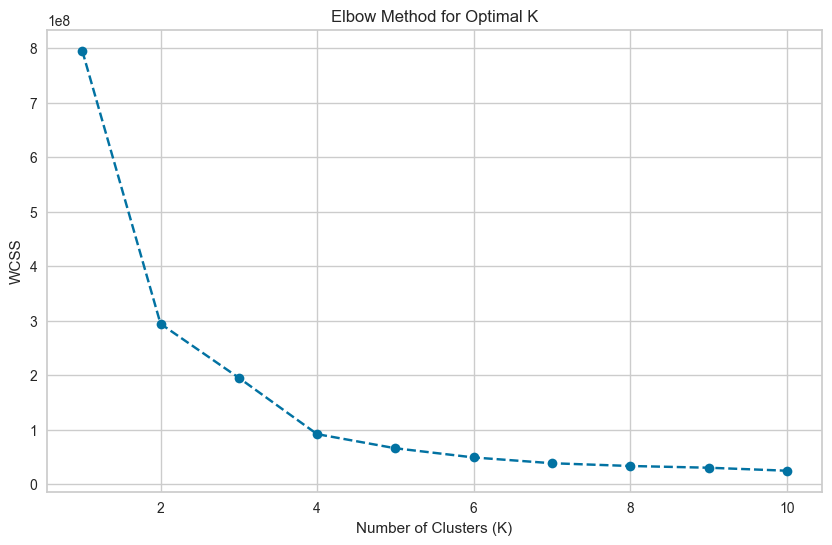

In [ ]:
# Elbow Method for KMeans
wcss = []  # Store WCSS values

for k in range(1, 11):  # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(withouPCA_Notscaled_kmeans_df)  # Use the scaled data
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

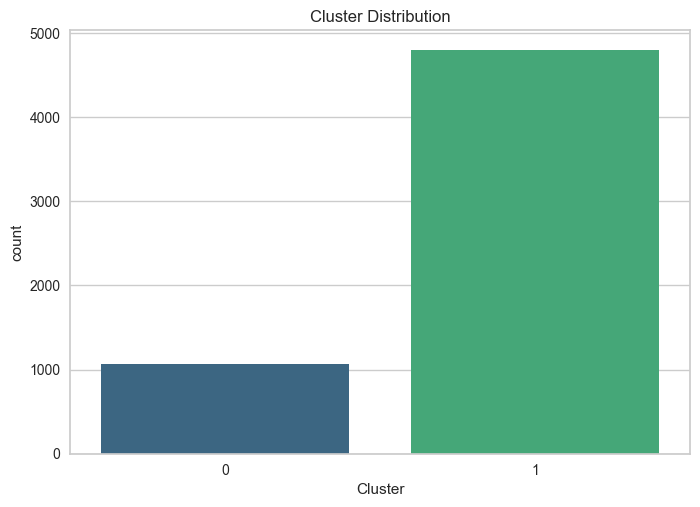

The average silhouette score is: 0.6628891075107042


In [309]:
from sklearn.metrics import silhouette_score

# Fit the KMeans model to the scaled data
# Apply K-Means
kmeans = KMeans(
    n_clusters=2, 
    random_state=42
)  # Adjust clusters as needed
withouPCA_Notscaled_kmeans_df['Cluster'] = kmeans.fit_predict(withouPCA_Notscaled_kmeans_df)

# Visualize Cluster Distribution
sns.countplot(x=withouPCA_Notscaled_kmeans_df['Cluster'], palette='viridis')
plt.title('Cluster Distribution')
plt.show()

# Calculate and print the silhouette score
silhouette_avg = silhouette_score(withouPCA_Notscaled_kmeans_df, kmeans.labels_)
print(f"The average silhouette score is: {silhouette_avg}")

In [310]:
# Calculate the average of each column
column_means = df.mean()

# Convert the result to a DataFrame
column_means_df = column_means.to_frame(name='Average')

# Display the DataFrame
column_means_df

Average
Age                    48.973236
BMI                    27.973969
WaistCircumference     96.096198
TotalCholesterol      185.277872
FastingBloodGlucose   100.541255
InsulinLevel           10.152216
CRP                     2.328316
Glycohemoglobin         5.505745
Ferritin               39.261597
RBCFolate            1112.137232
MorbidityScore          0.722468
SES_Score              12.208765
BloodPressure           0.744801

In [311]:
# Group by cluster labels and calculate the mean for each group
cluster_means = withouPCA_Notscaled_kmeans_df.groupby('Cluster').mean()

# Convert the cluster means to a DataFrame
cluster_means_df = pd.DataFrame(cluster_means)

# Display the DataFrame
cluster_means_df.head()

Age        BMI  WaistCircumference  TotalCholesterol  \
Cluster                                                               
0        56.249300  29.032586           99.317927        191.205415   
1        47.348071  27.737518           95.376601        183.953910   

         FastingBloodGlucose  InsulinLevel       CRP  Glycohemoglobin  \
Cluster                                                                 
0                 101.393091     10.001186  2.757908         5.534174   
1                 100.350991     10.185950  2.232363         5.499395   

          Ferritin    RBCFolate  MorbidityScore  SES_Score  BloodPressure  
Cluster                                                                    
0        39.367162  1730.429505        0.878618  13.087899       1.122316  
1        39.238019   974.036913        0.687591  12.012404       0.660480

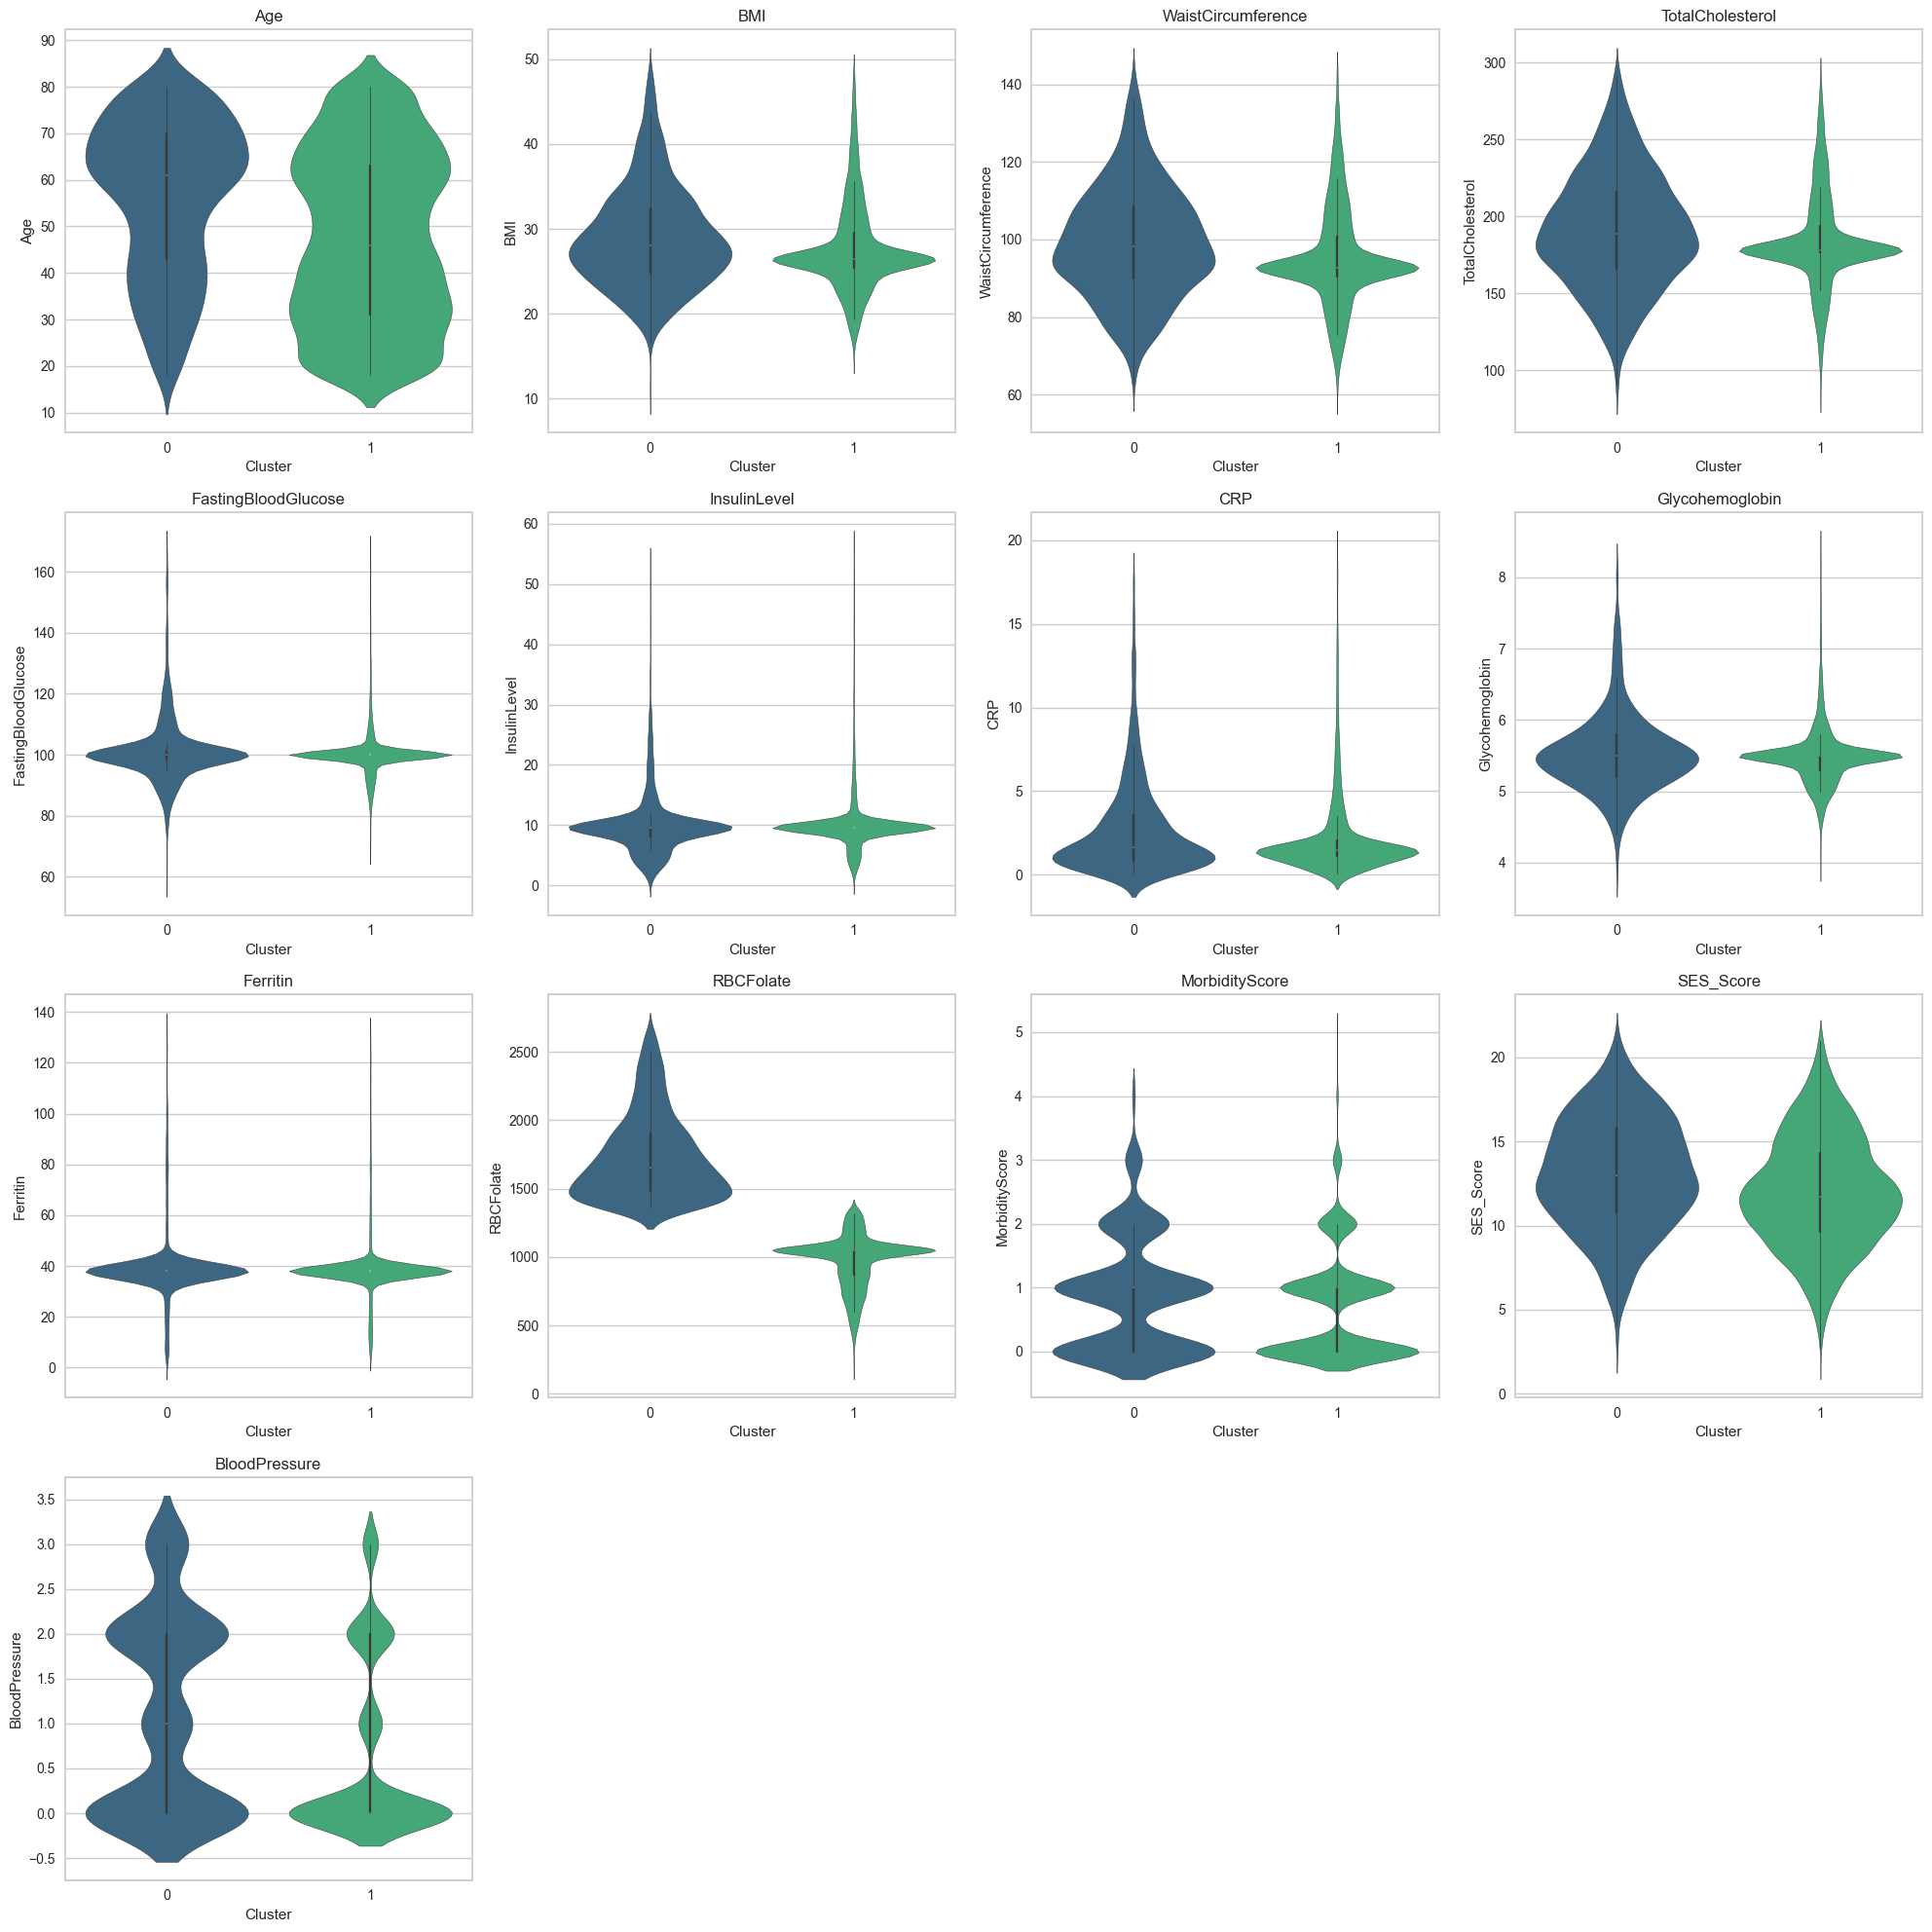

In [313]:

warnings.simplefilter(action='ignore', category=FutureWarning)

# Determine the number of columns and rows for the grid
num_columns = 4
num_rows = (len(withouPCA_Notscaled_kmeans_df.columns) - 1) // num_columns + 1  # -1 to exclude 'Cluster' column

plt.figure(figsize=(20, num_rows * 5))

# Create a subplot for each column
for i, col in enumerate(withouPCA_Notscaled_kmeans_df.columns):
    if col != 'Cluster':
        plt.subplot(num_rows, num_columns, i + 1)
        sns.violinplot(y=withouPCA_Notscaled_kmeans_df[col], x=withouPCA_Notscaled_kmeans_df["Cluster"], palette="viridis")
        plt.title(f'{col}')

plt.tight_layout()
plt.show()




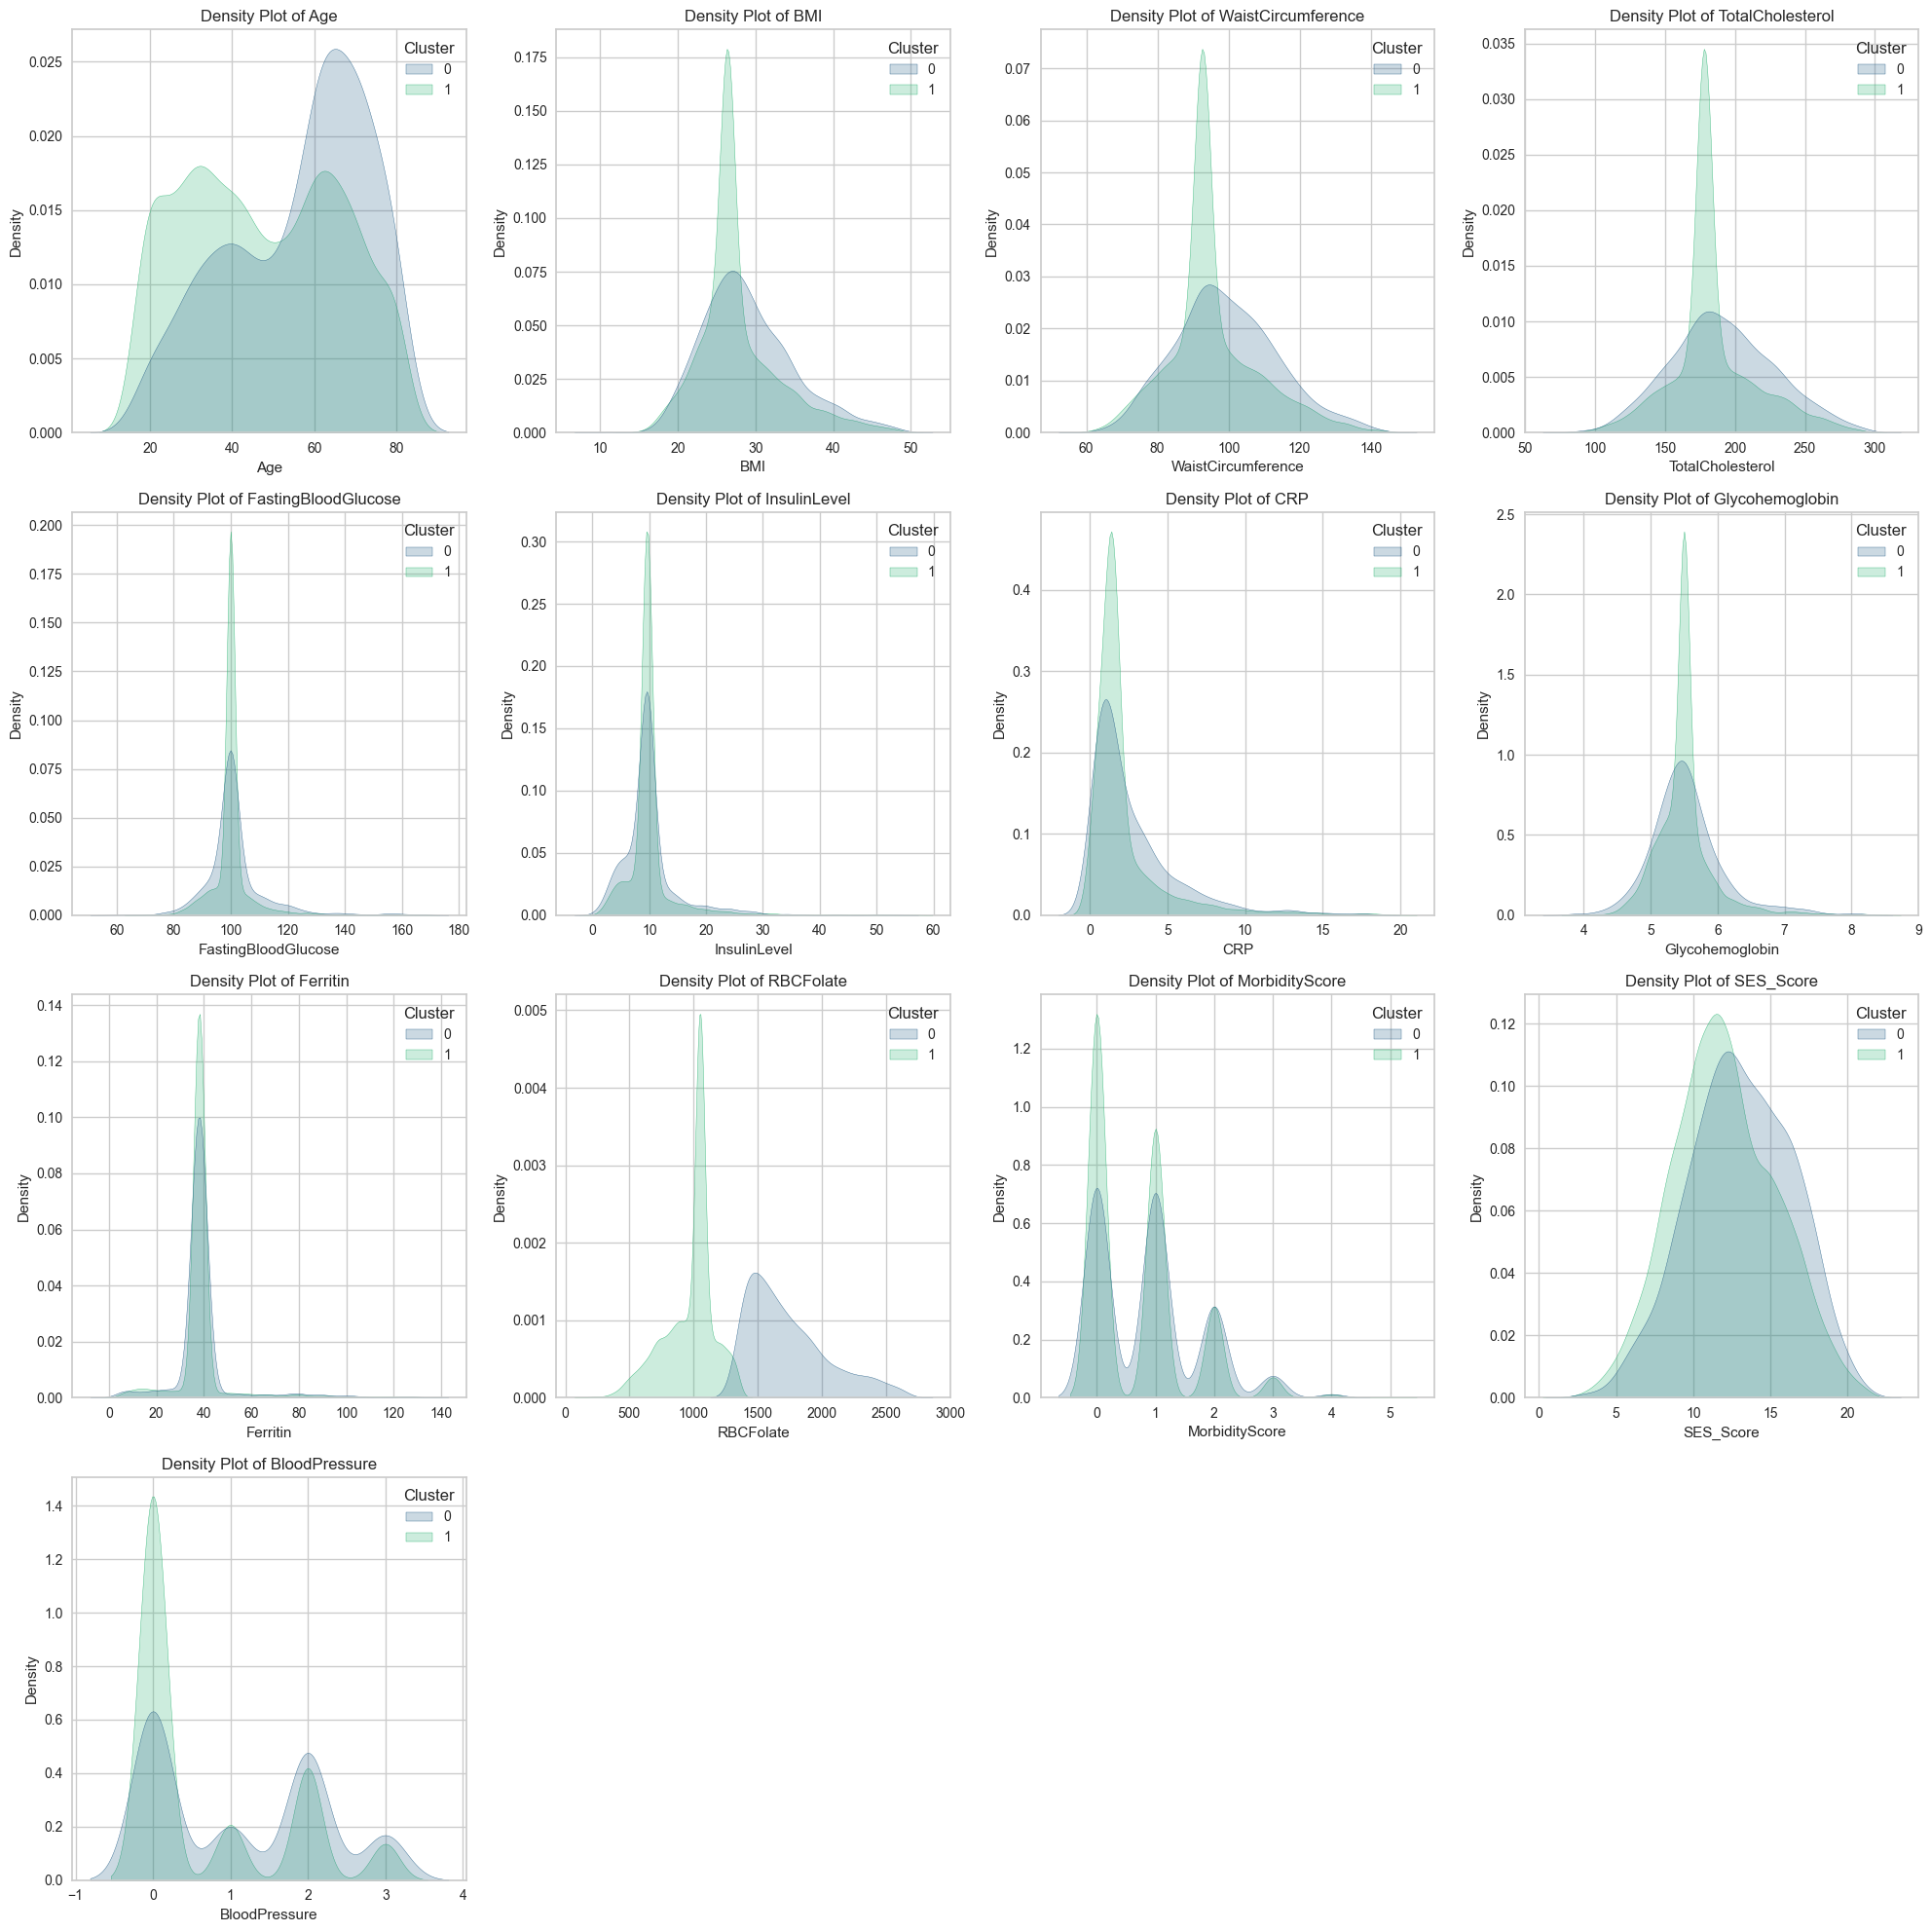

In [314]:
warnings.simplefilter(action='ignore', category=FutureWarning)

num_columns = 4
num_rows = (len(withouPCA_Notscaled_kmeans_df.columns) - 1) // num_columns + 1  # -1 to exclude 'Cluster' column

plt.figure(figsize=(20, num_rows * 5))

for i, col in enumerate(withouPCA_Notscaled_kmeans_df.columns):
    if col != 'Cluster':
        plt.subplot(num_rows, num_columns, i + 1)
        sns.kdeplot(data=withouPCA_Notscaled_kmeans_df, x=col, hue="Cluster", fill=True, common_norm=False, palette="viridis")
        plt.title(f'Density Plot of {col}')

plt.tight_layout()
plt.show()

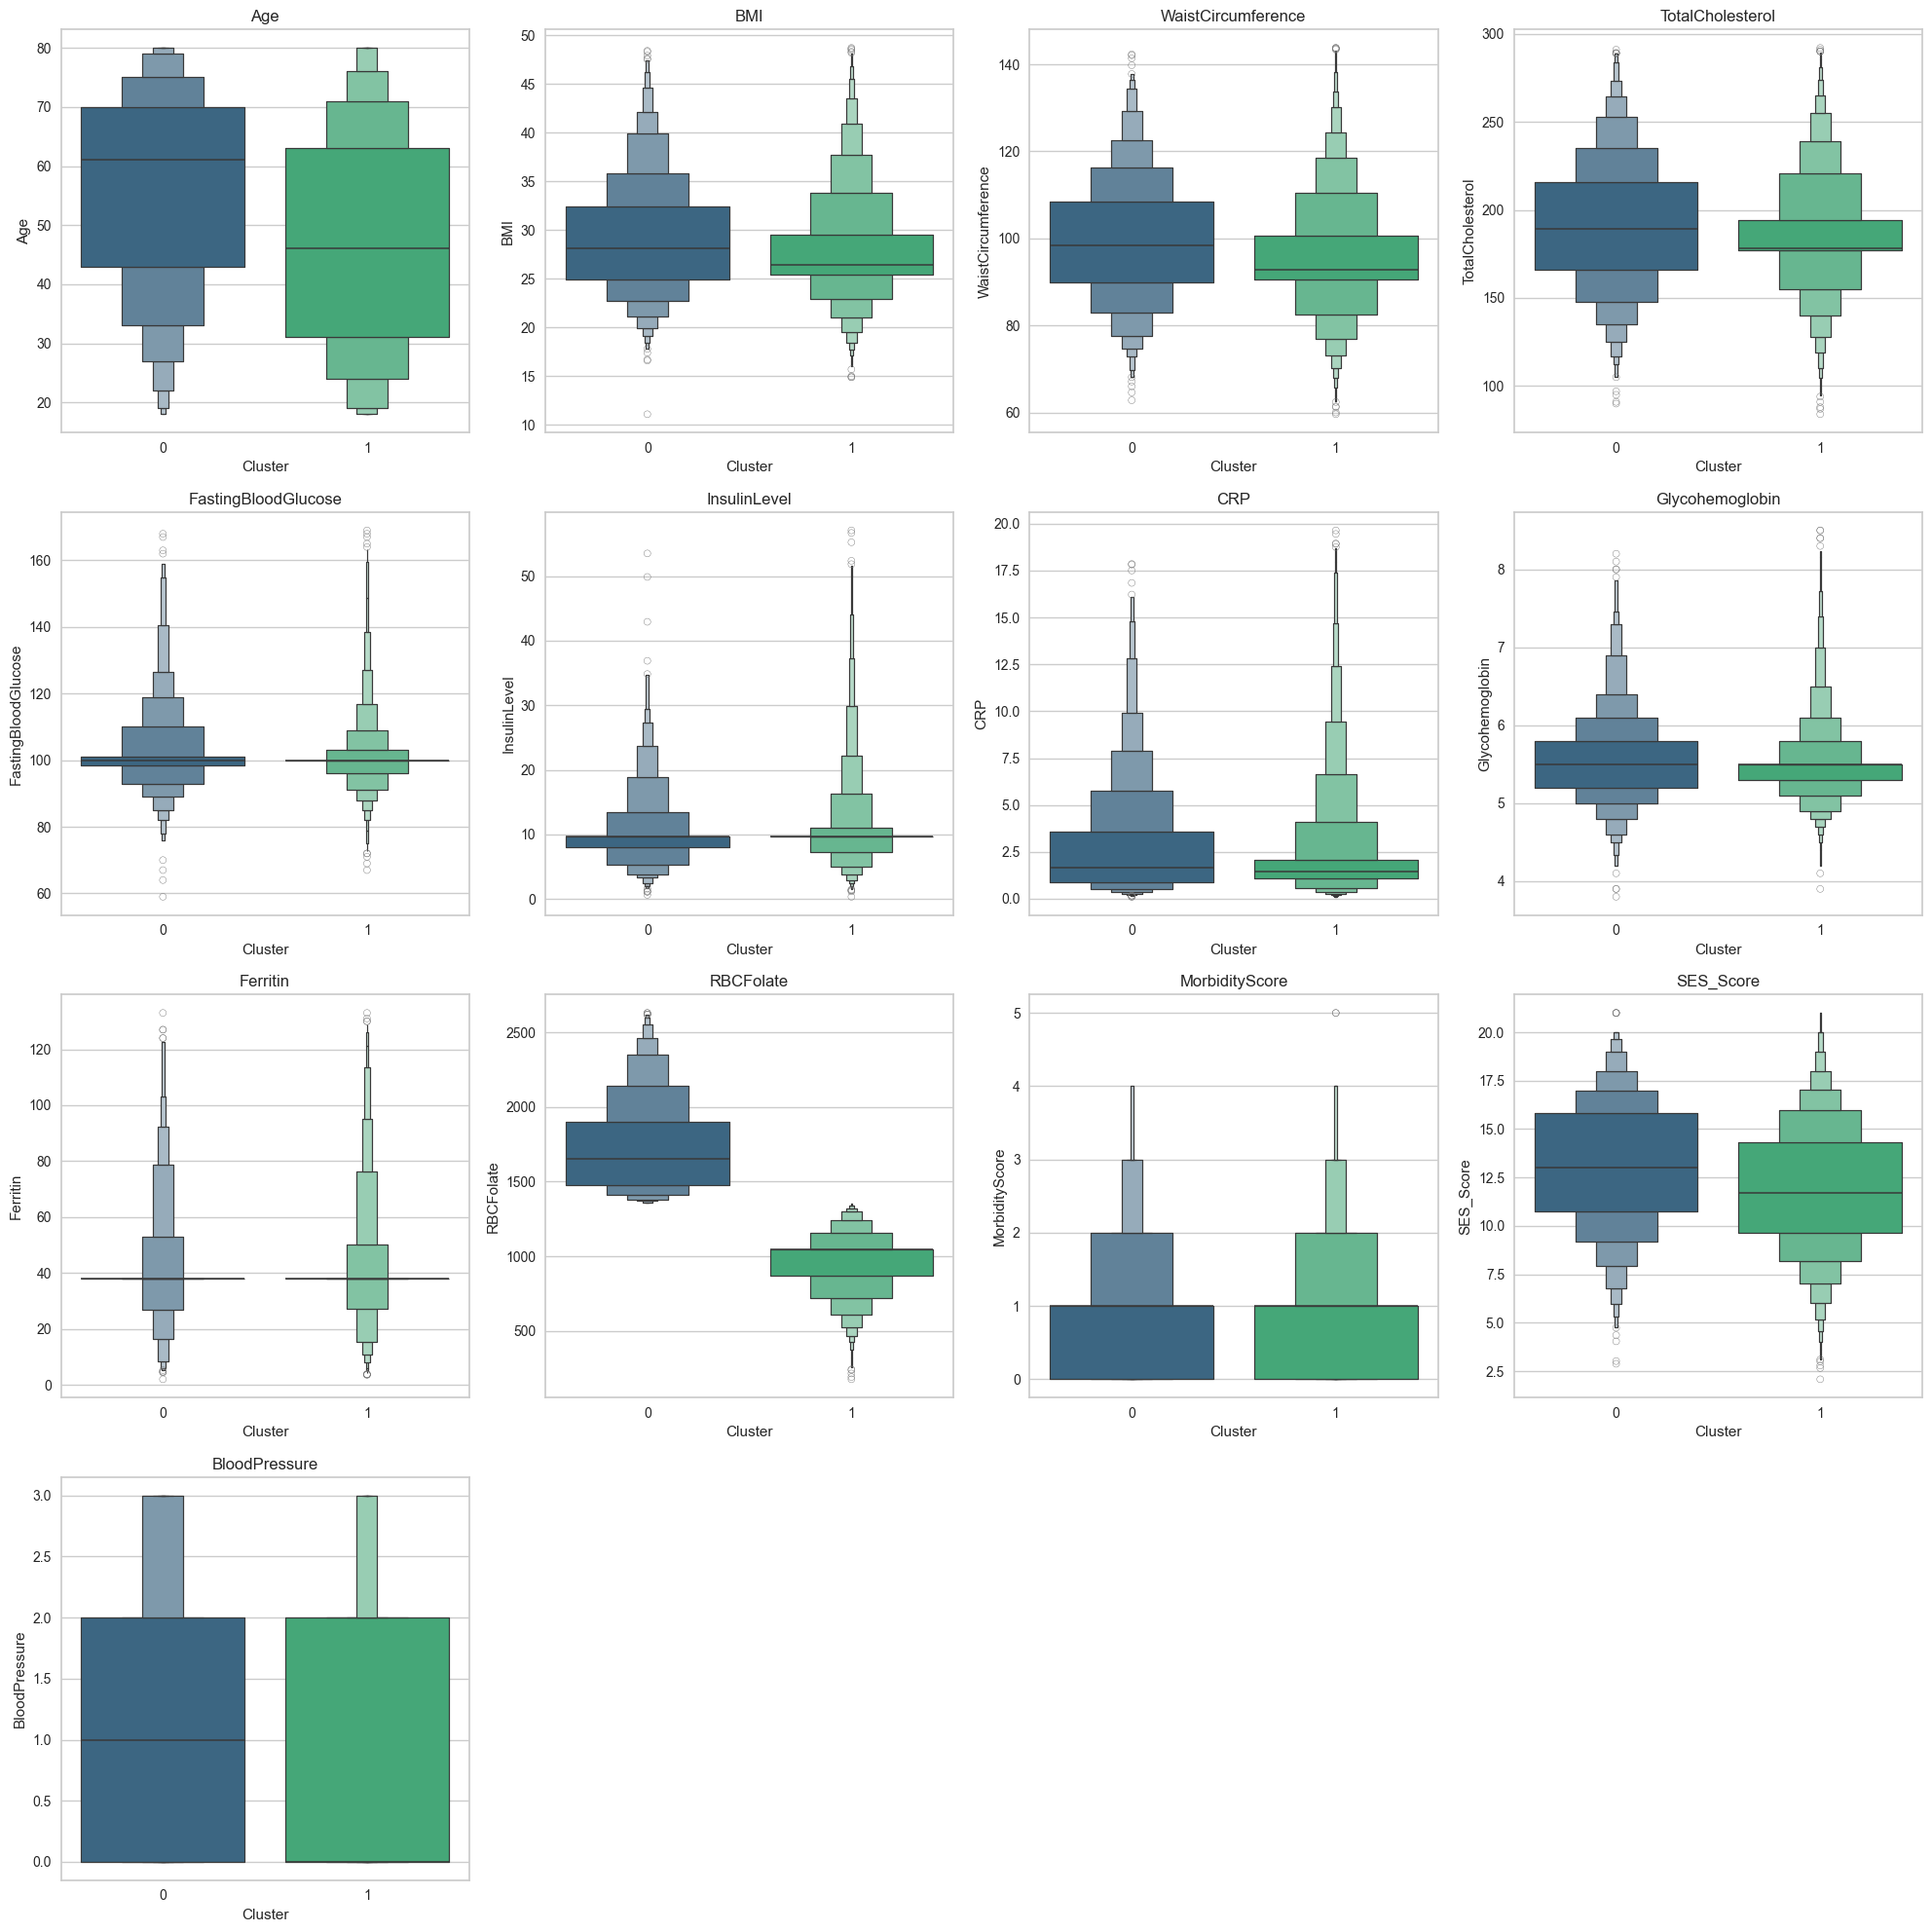

In [315]:
num_columns = 4
num_rows = (len(withouPCA_scaled_kmeans_df.columns) - 1) // num_columns + 1  # -1 to exclude 'Cluster' column

plt.figure(figsize=(20, num_rows * 5))

for i, col in enumerate(withouPCA_Notscaled_kmeans_df.columns):
  if col != 'Cluster':
    plt.subplot(num_rows, num_columns, i + 1)
    sns.boxenplot(y=withouPCA_Notscaled_kmeans_df[col], x=withouPCA_Notscaled_kmeans_df["Cluster"], palette="viridis")
    plt.title(f'{col}')

plt.tight_layout()
plt.show()



### With PCA

In [283]:
kmeans_df = df.copy()
kmeans_df_scaled = df_scaled.copy()
kmeans_pca2D = PCA_2D.copy()
kmeans_pca3D = PCA_3D.copy()

##### 2D

In [284]:
withPCA_2D_kmeans_df = df.copy()
withPCA_2D_kmeans_df_scaled = df_scaled.copy()
withPCA_2D_kmeans_pca2D = PCA_2D.copy()
withPCA_2D_kmeans_pca3D = PCA_3D.copy()

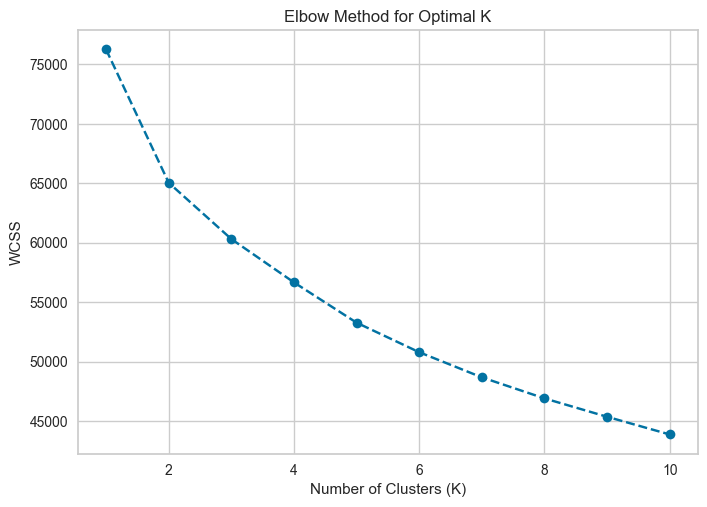

In [285]:
# try elbow method
 
wcss = []  # Store WCSS values

for k in range(1, 11):  # Test K from 1 to 10

    kmeans = KMeans(

        n_clusters=k, 
        #init='k-means++', #default
        #n_init=10, #default
        #max_iter=300, #default
        #tol=0.0001, #default
        #precompute_distances='auto', #default
        #verbose=0, #default
        #algorithm='lloyd', #default
        random_state=42, 
        n_init=10
    )
    kmeans.fit(withPCA_2D_kmeans_df_scaled)  # Use the standardized data
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

Note: you may need to restart the kernel to use updated packages.
Elbow Method to determine the number of clusters to be formed:


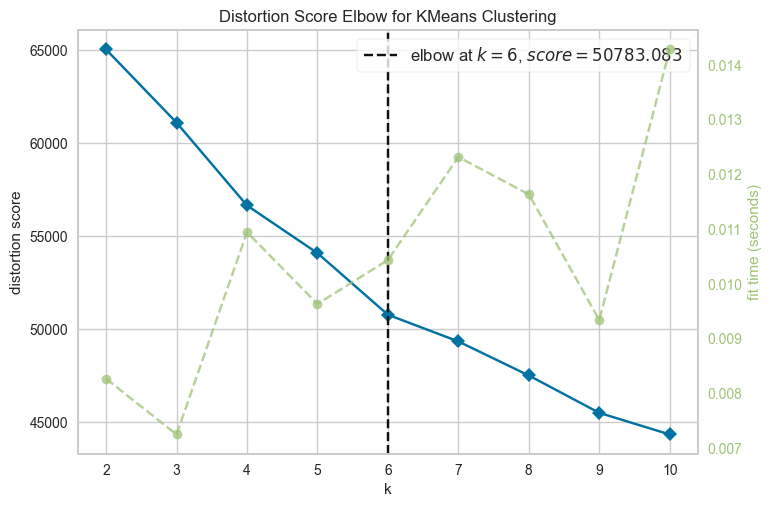

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [286]:
%pip install yellowbrick

from yellowbrick.cluster import KElbowVisualizer

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(withPCA_2D_kmeans_df_scaled)
Elbow_M.show()

In [287]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(

        n_clusters=7,
        #init='k-means++', #default
        #n_init=10, #default
        #max_iter=300, #default
        #tol=0.0001, #default
        #precompute_distances='auto', #default
        #verbose=0, #default
        #algorithm='lloyd', #default
        random_state=42, 
        n_init=10
    )
y_kmeans = kmeans.fit(withPCA_2D_kmeans_pca2D)
withPCA_2D_kmeans_pca2D["Clusters"] = y_kmeans.labels_
withPCA_2D_kmeans_df_scaled["Clusters"]= y_kmeans.labels_

print(f"The inertia score is : {kmeans.inertia_}")
silhouette_avg = silhouette_score(withPCA_2D_kmeans_pca2D, kmeans.labels_)
print(f"The average silhouette score is : {silhouette_avg}")

The inertia score is : 5272.606296679969
The average silhouette score is : 0.5687641687183039


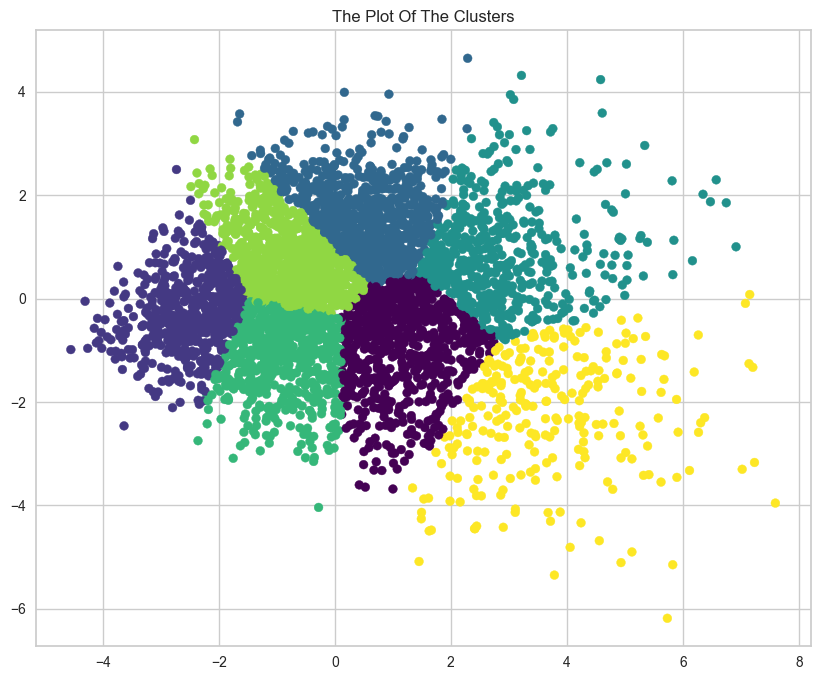

In [288]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax =plt.subplot(111, label="bla")
ax.scatter(x, y, s=40, c=withPCA_2D_kmeans_df_scaled["Clusters"], marker='o', cmap='viridis')
ax.set_title("The Plot Of The Clusters")
plt.show()

In [289]:
# Group by cluster labels and calculate the mean for each group
cluster_means = withPCA_2D_kmeans_df_scaled.groupby('Clusters').mean()

# Convert the cluster means to a DataFrame
cluster_means_df = pd.DataFrame(cluster_means)

# Display the DataFrame
cluster_means_df.head()

Age       BMI  WaistCircumference  TotalCholesterol  \
Clusters                                                             
0        -0.166026  0.998486            0.928877          0.096913   
1        -1.035300 -1.172426           -1.384364         -0.495595   
2         0.995701 -0.242241           -0.052703          0.481070   
3         0.850974  1.036226            1.207657          0.215496   
4        -0.895488 -0.189215           -0.249602         -0.282702   

          FastingBloodGlucose  InsulinLevel       CRP  Glycohemoglobin  \
Clusters                                                                 
0                   -0.011226      0.353719  0.586562        -0.057675   
1                   -0.635780     -0.513791 -0.534736        -0.842633   
2                    0.154347     -0.283791 -0.193352         0.238998   
3                    1.063376      0.330323  0.595732         1.472287   
4                   -0.186687     -0.048491 -0.178853        -0.280572   

          Ferritin  RBCFolate  MorbidityScore  SES_Score  BloodPressure  
Clusters                                                                 
0         0.111103  -0.194363       -0.103471  -0.179210       0.284815  
1        -0.032926  -0.409041       -0.285327  -0.028593      -0.462507  
2        -0.113635   0.609606        0.462173   0.449460       0.796839  
3        -0.093954   0.809078        0.745830   0.168638       0.894109  
4         0.122249  -0.313960       -0.442358  -0.373151      -0.559383

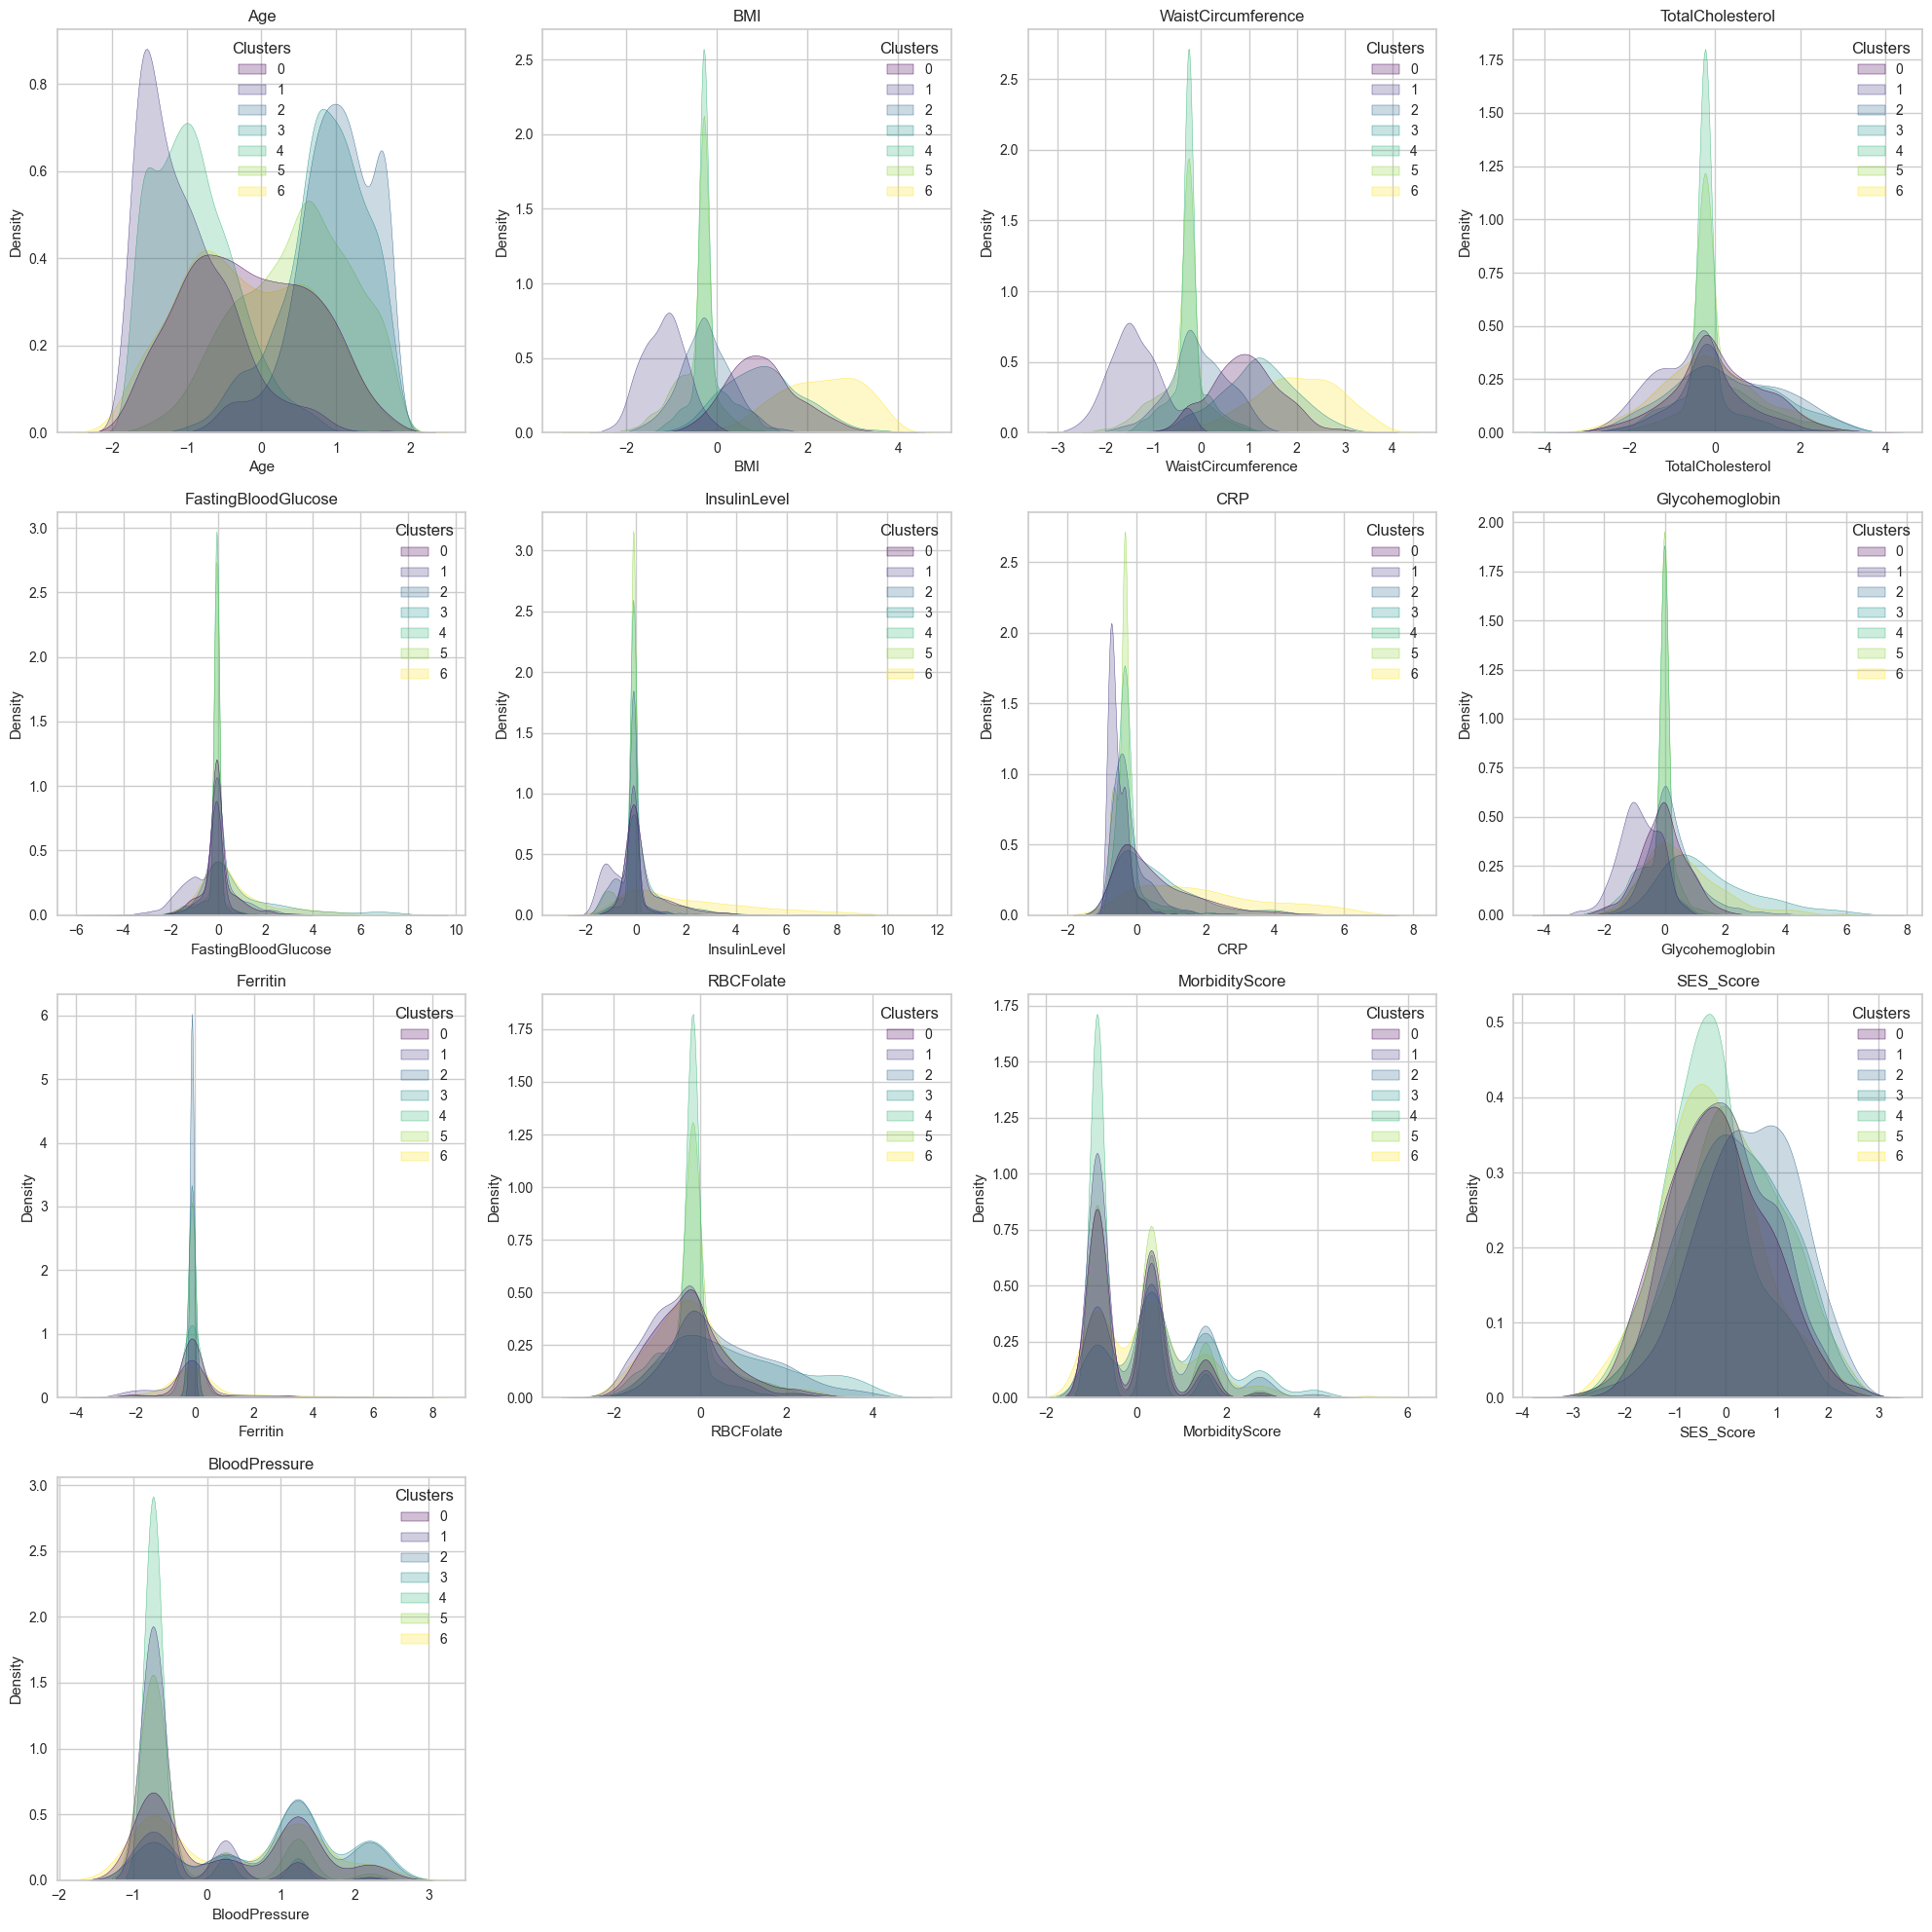

In [323]:
warnings.simplefilter(action='ignore', category=FutureWarning)

num_columns = 4
num_rows = (len(withPCA_2D_kmeans_df_scaled.columns) - 1) // num_columns + 1  # -1 to exclude 'Clusters' column

plt.figure(figsize=(20, num_rows * 5))

for i, col in enumerate(withPCA_2D_kmeans_df_scaled.columns):
    if col != 'Clusters':
        plt.subplot(num_rows, num_columns, i + 1)
        sns.kdeplot(data=withPCA_2D_kmeans_df_scaled, x=col, hue="Clusters", fill=True, common_norm=False, palette="viridis")
        plt.title(col)

plt.tight_layout()
plt.show()


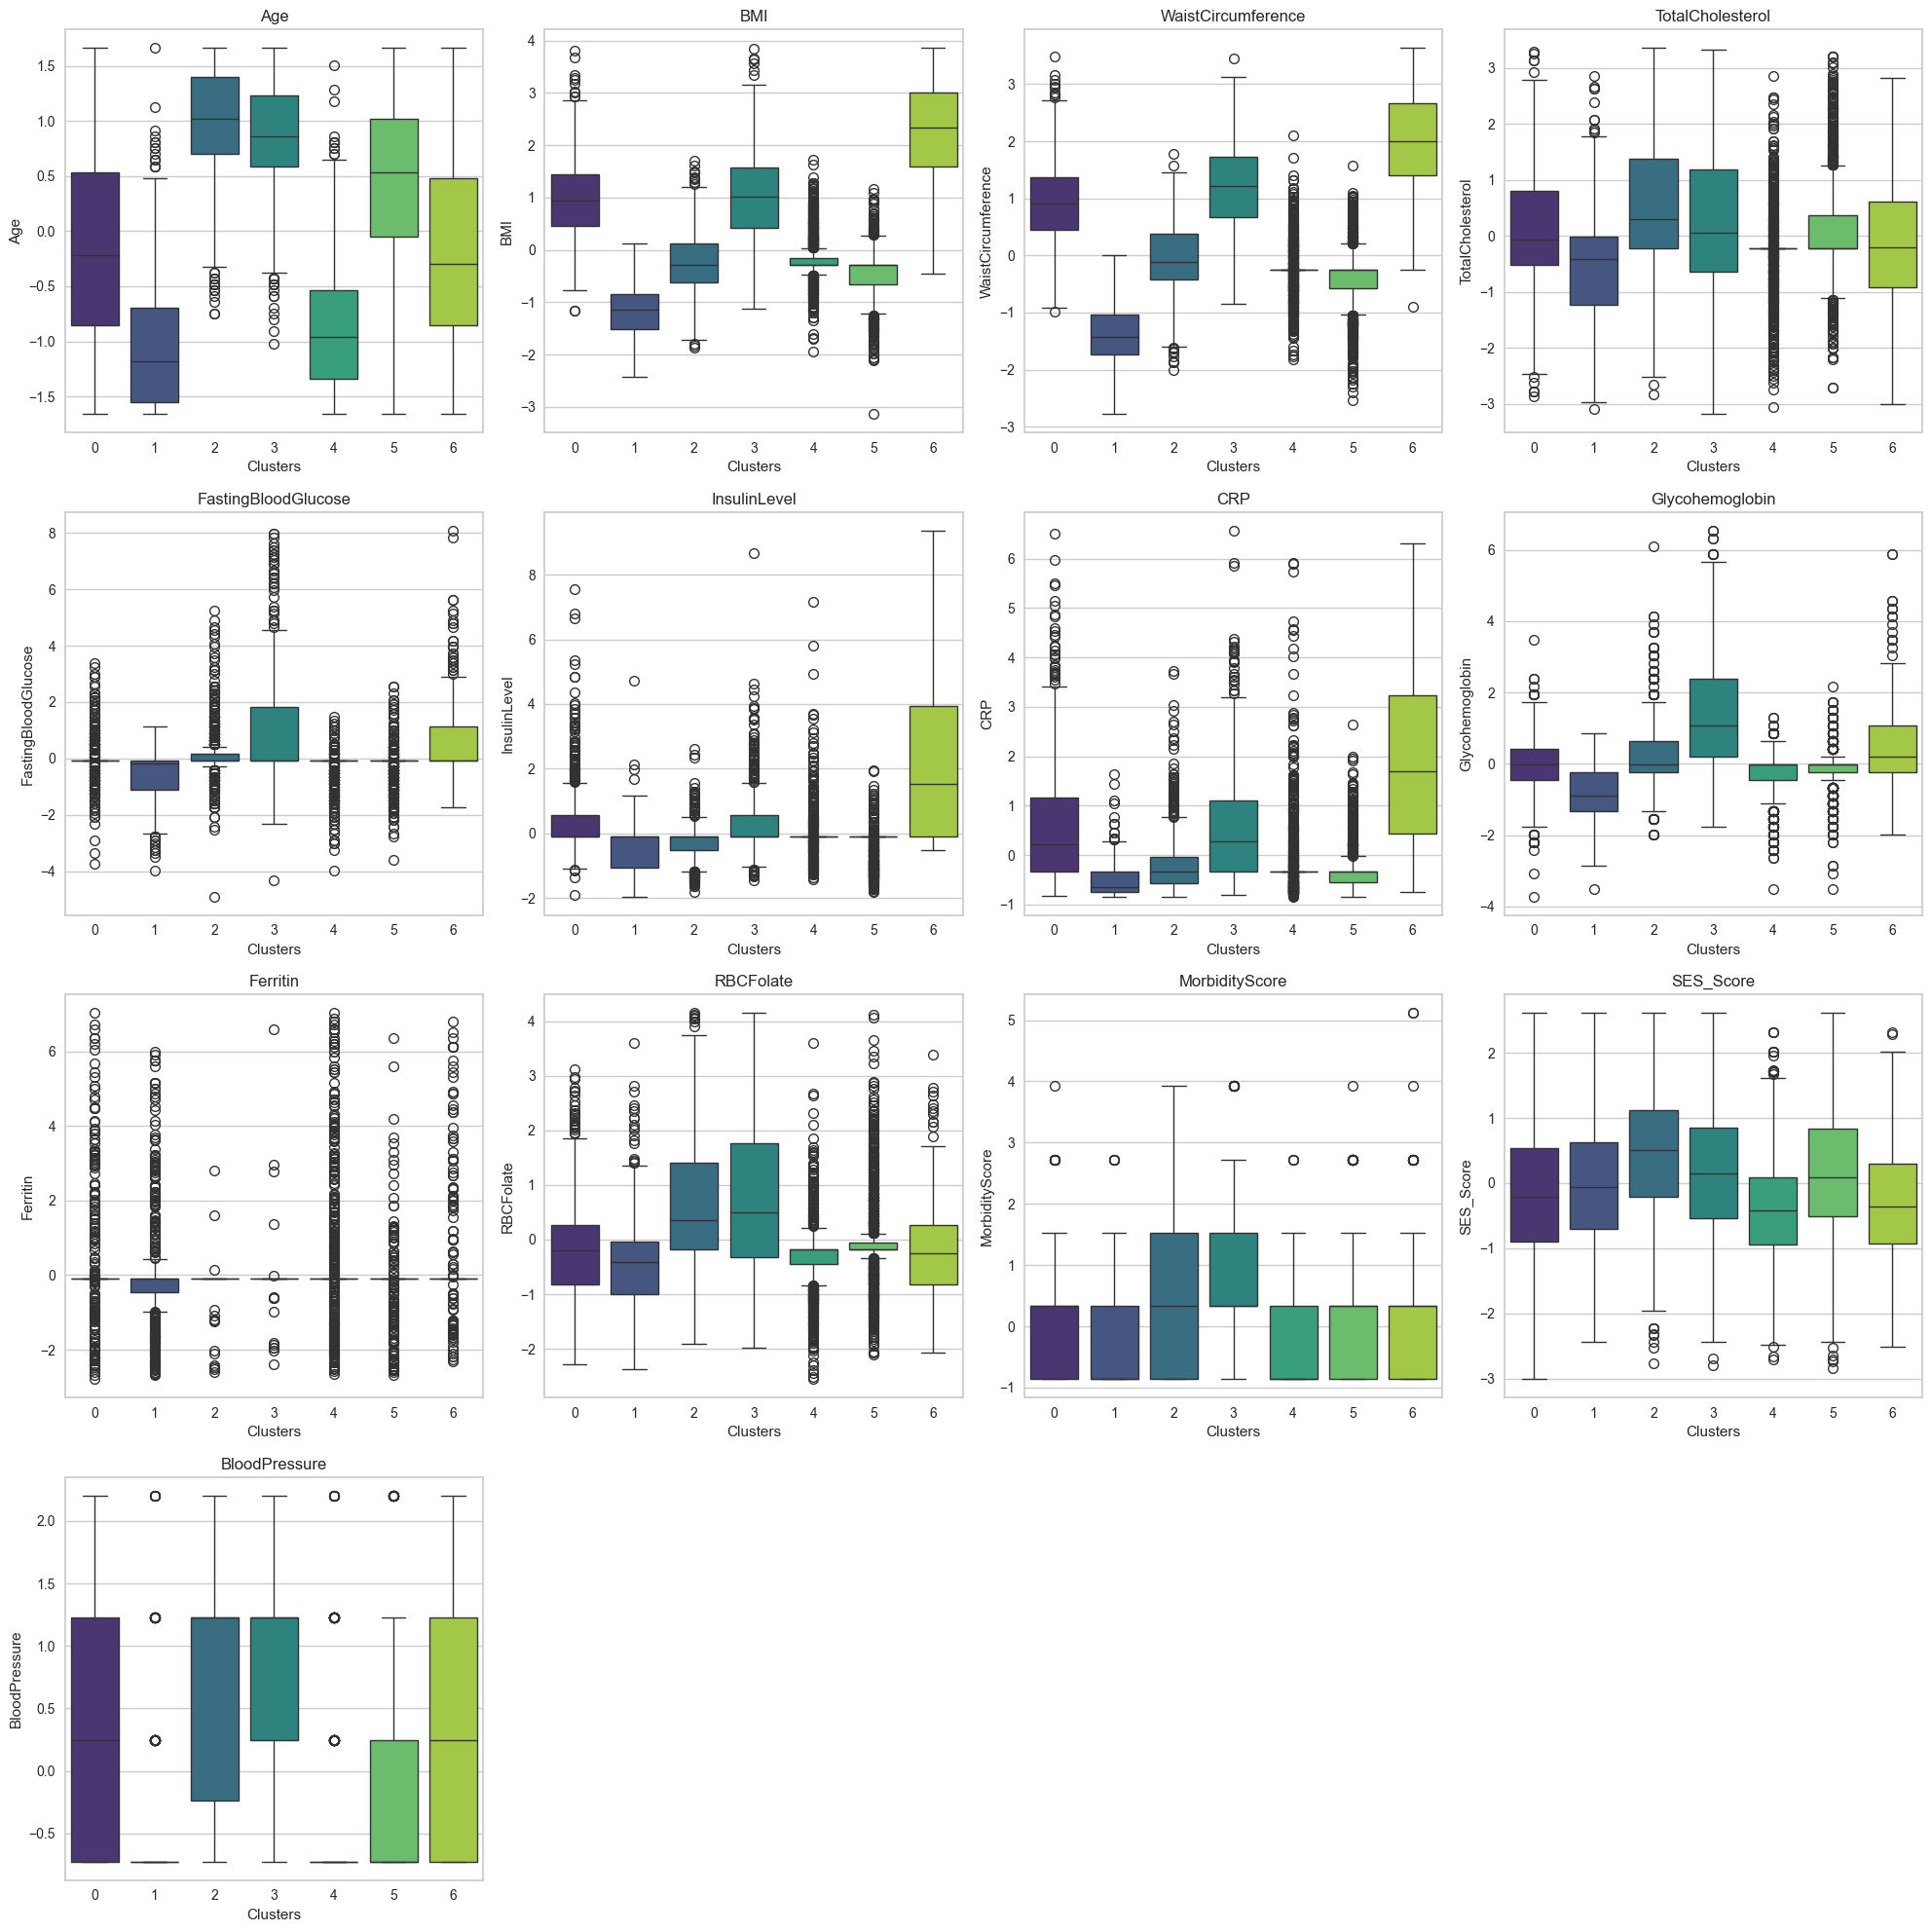

In [321]:

warnings.simplefilter(action='ignore', category=FutureWarning)

num_columns = 4
num_rows = (len(withPCA_2D_kmeans_df_scaled.columns) - 1) // num_columns + 1  # -1 to exclude 'Clusters' column

plt.figure(figsize=(20, num_rows * 5))

for i, col in enumerate(withPCA_2D_kmeans_df_scaled.columns):
    if col != 'Clusters':
        plt.subplot(num_rows, num_columns, i + 1)
        sns.boxplot(y=withPCA_2D_kmeans_df_scaled[col], x=withPCA_2D_kmeans_df_scaled["Clusters"], palette="viridis")
        plt.title(col)

plt.tight_layout()
plt.show()



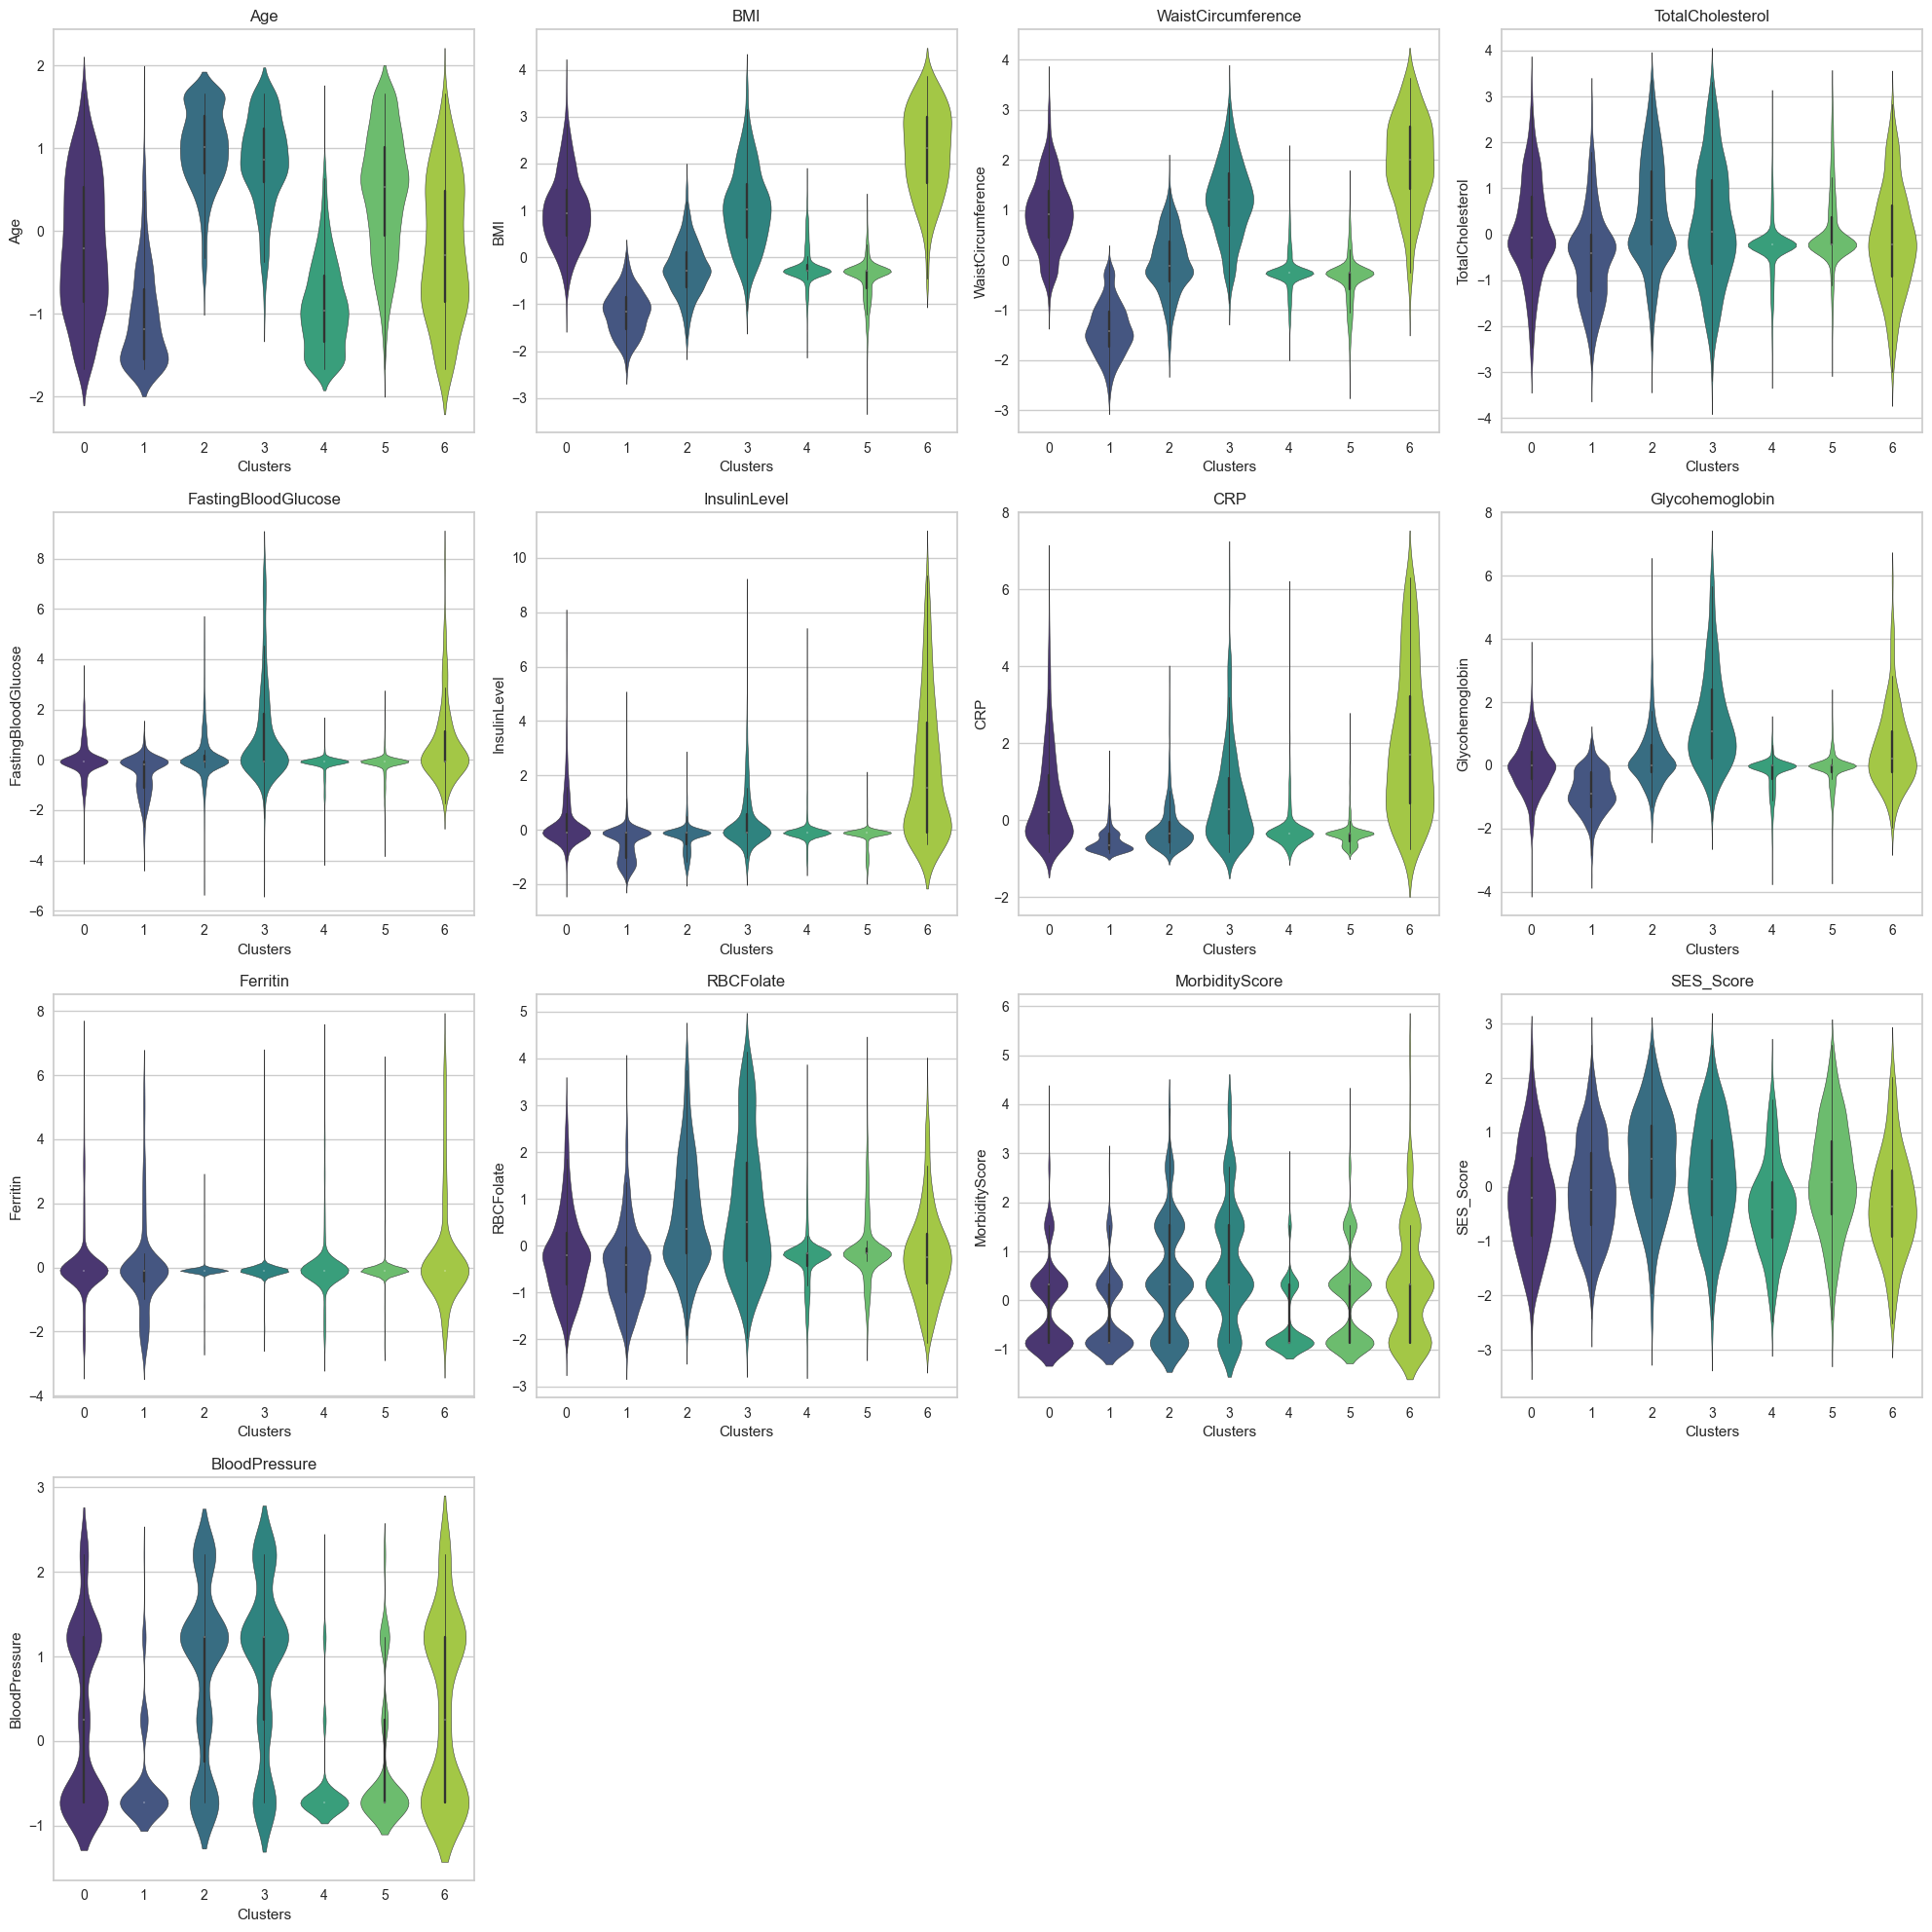

In [319]:

warnings.simplefilter(action='ignore', category=FutureWarning)

num_columns = 4
num_rows = (len(withPCA_2D_kmeans_df_scaled.columns) - 1) // num_columns + 1  # -1 to exclude 'Clusters' column

plt.figure(figsize=(20, num_rows * 5))

for i, col in enumerate(withPCA_2D_kmeans_df_scaled.columns):
  if col != 'Clusters':
    plt.subplot(num_rows, num_columns, i + 1)
    sns.violinplot(y=withPCA_2D_kmeans_df_scaled[col], x=withPCA_2D_kmeans_df_scaled["Clusters"], palette="viridis")
    plt.title(col)

plt.tight_layout()
plt.show()



#### 3D


In [291]:
withPCA_3D_kmeans_df = df.copy()
withPCA_3D_kmeans_df_scaled = df_scaled.copy()
withPCA_3D_kmeans_pca2D = PCA_2D.copy()
withPCA_3D_kmeans_pca3D = PCA_3D.copy()

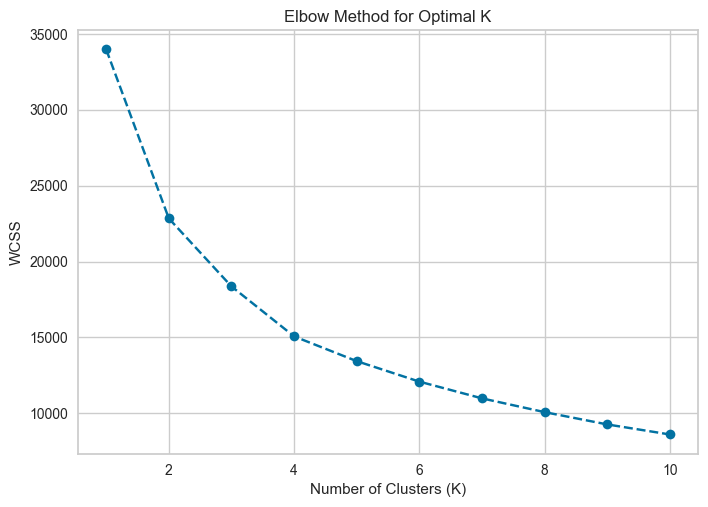

In [292]:
# try elbow method
 
wcss = []  # Store WCSS values

for k in range(1, 11):  # Test K from 1 to 10

    kmeans = KMeans(

        n_clusters=k, 
        #init='k-means++', #default
        #n_init=10, #default
        #max_iter=300, #default
        #tol=0.0001, #default
        #precompute_distances='auto', #default
        #verbose=0, #default
        #algorithm='lloyd', #default
        random_state=42, 
        n_init=10
    )
    kmeans.fit(withPCA_3D_kmeans_pca3D)  # Use the standardized data
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

Note: you may need to restart the kernel to use updated packages.
Elbow Method to determine the number of clusters to be formed:


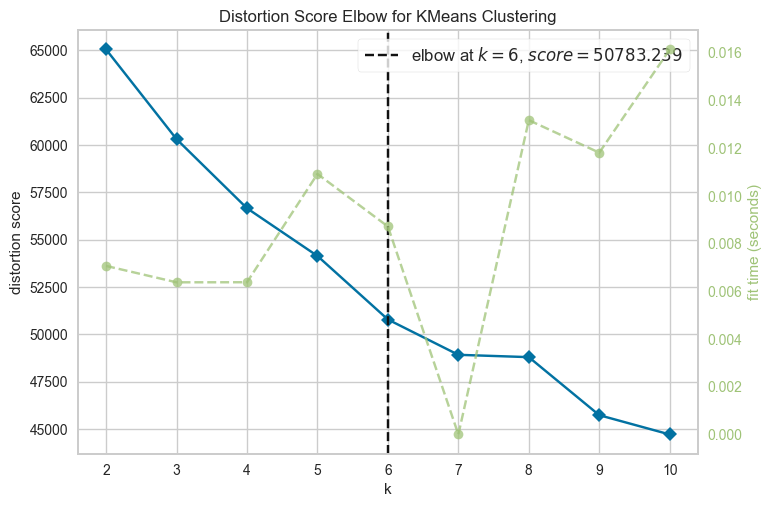

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [293]:
%pip install yellowbrick

from yellowbrick.cluster import KElbowVisualizer

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(withPCA_3D_kmeans_df_scaled)
Elbow_M.show()

In [294]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(

        n_clusters=6,
        #init='k-means++', #default
        #n_init=10, #default
        #max_iter=300, #default
        #tol=0.0001, #default
        #precompute_distances='auto', #default
        #verbose=0, #default
        #algorithm='lloyd', #default
        random_state=42, 
        n_init=10
    )
y_kmeans = kmeans.fit(kmeans_pca3D)
withPCA_3D_kmeans_pca3D["Clusters"] = y_kmeans.labels_
withPCA_3D_kmeans_df["Clusters"]= y_kmeans.labels_

print(f"The inertia score is : {kmeans.inertia_}")
silhouette_avg = silhouette_score(withPCA_3D_kmeans_pca3D, kmeans.labels_)
print(f"The average silhouette score is : {silhouette_avg}")

The inertia score is : 12092.808103866057
The average silhouette score is : 0.4530143710757335


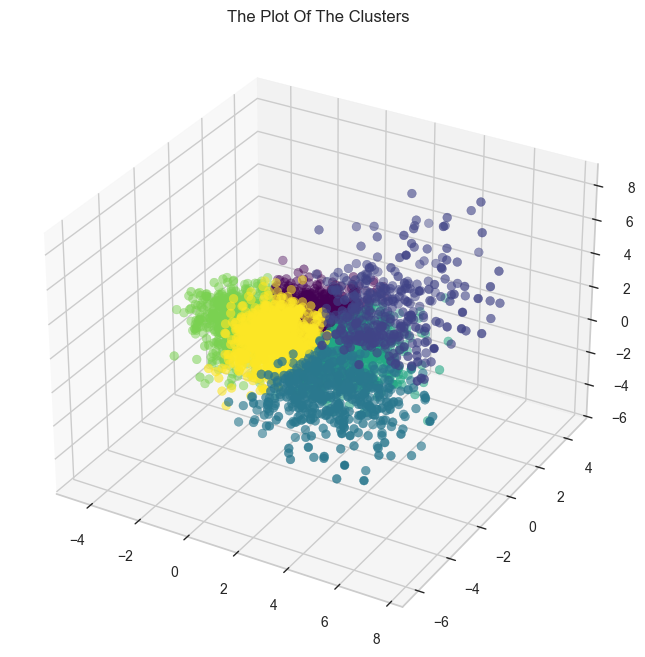

In [295]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=withPCA_3D_kmeans_pca3D["Clusters"], marker='o', cmap='viridis')
ax.set_title("The Plot Of The Clusters")
plt.show()

In [296]:
# Group by cluster labels and calculate the mean for each group
cluster_means = withPCA_3D_kmeans_df.groupby('Clusters').mean()

# Convert the cluster means to a DataFrame
cluster_means_df = pd.DataFrame(cluster_means)

# Display the DataFrame
cluster_means_df.head()

Age        BMI  WaistCircumference  TotalCholesterol  \
Clusters                                                               
0         63.043059  25.216710           90.541260        193.008355   
1         64.988473  31.186167          106.514121        168.345821   
2         42.754420  38.261886          117.816110        187.445972   
3         60.281706  31.750281          107.130191        206.933782   
4         29.848175  22.192409           79.223504        170.370803   

          FastingBloodGlucose  InsulinLevel       CRP  Glycohemoglobin  \
Clusters                                                                 
0                   99.707584      8.520713  1.379974         5.478213   
1                  119.723343     15.423343  3.380317         6.606916   
2                  100.508841     15.265972  6.529293         5.524558   
3                  100.367003     10.117026  3.154254         5.566554   
4                   95.308029      7.772949  0.986847         5.111387   

           Ferritin    RBCFolate  MorbidityScore  SES_Score  BloodPressure  
Clusters                                                                    
0         37.733239  1151.284704        0.890103  13.444715       0.826478  
1         37.945130  1240.922190        1.400576  11.012733       1.423631  
2         46.101277  1043.273084        0.762279  11.619210       1.062868  
3         38.269293  1374.381594        0.937149  13.674091       1.611672  
4         39.926905   969.327007        0.464234  12.157962       0.256934

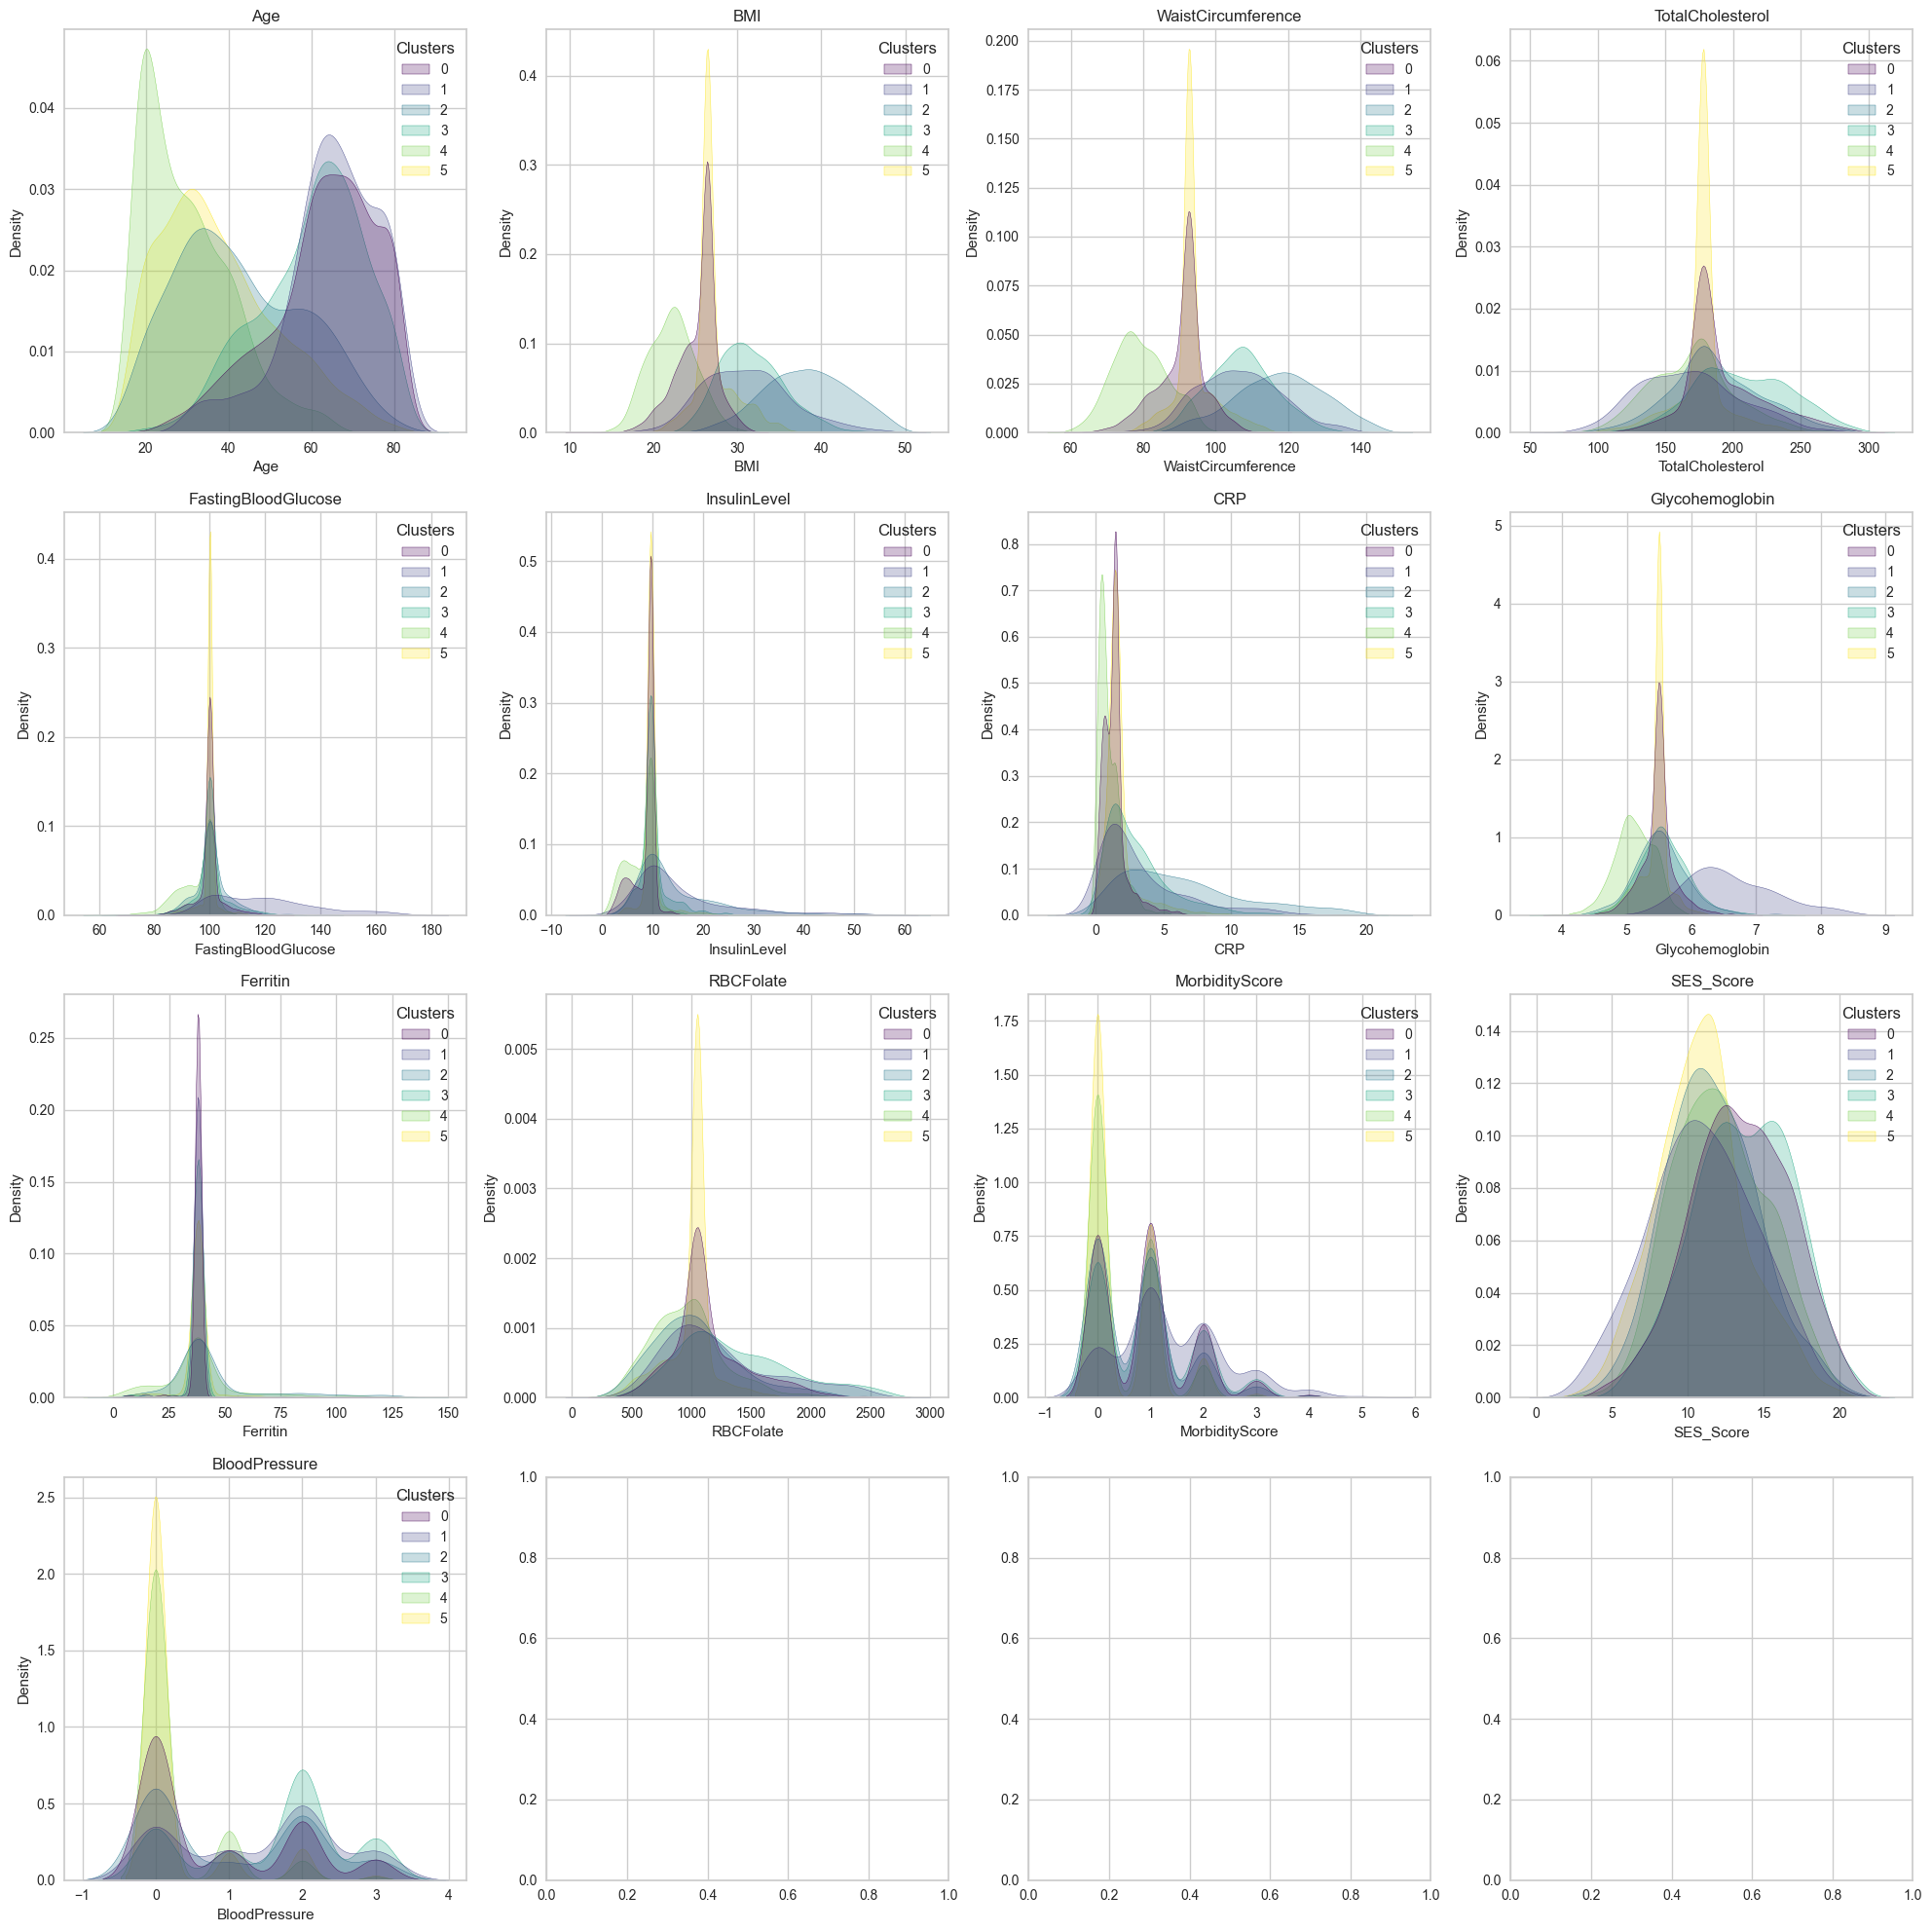

In [325]:
warnings.simplefilter(action='ignore', category=FutureWarning)

num_columns = 4
num_rows = (len(kmeans_df.columns)) // num_columns + 1  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 5))

for i, col in enumerate(kmeans_df.columns):
    row = i // num_columns
    col_idx = i % num_columns
    sns.kdeplot(data=kmeans_df, x=col, hue=withPCA_3D_kmeans_df["Clusters"], fill=True, common_norm=False, palette="viridis", ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)

plt.tight_layout()
plt.show()

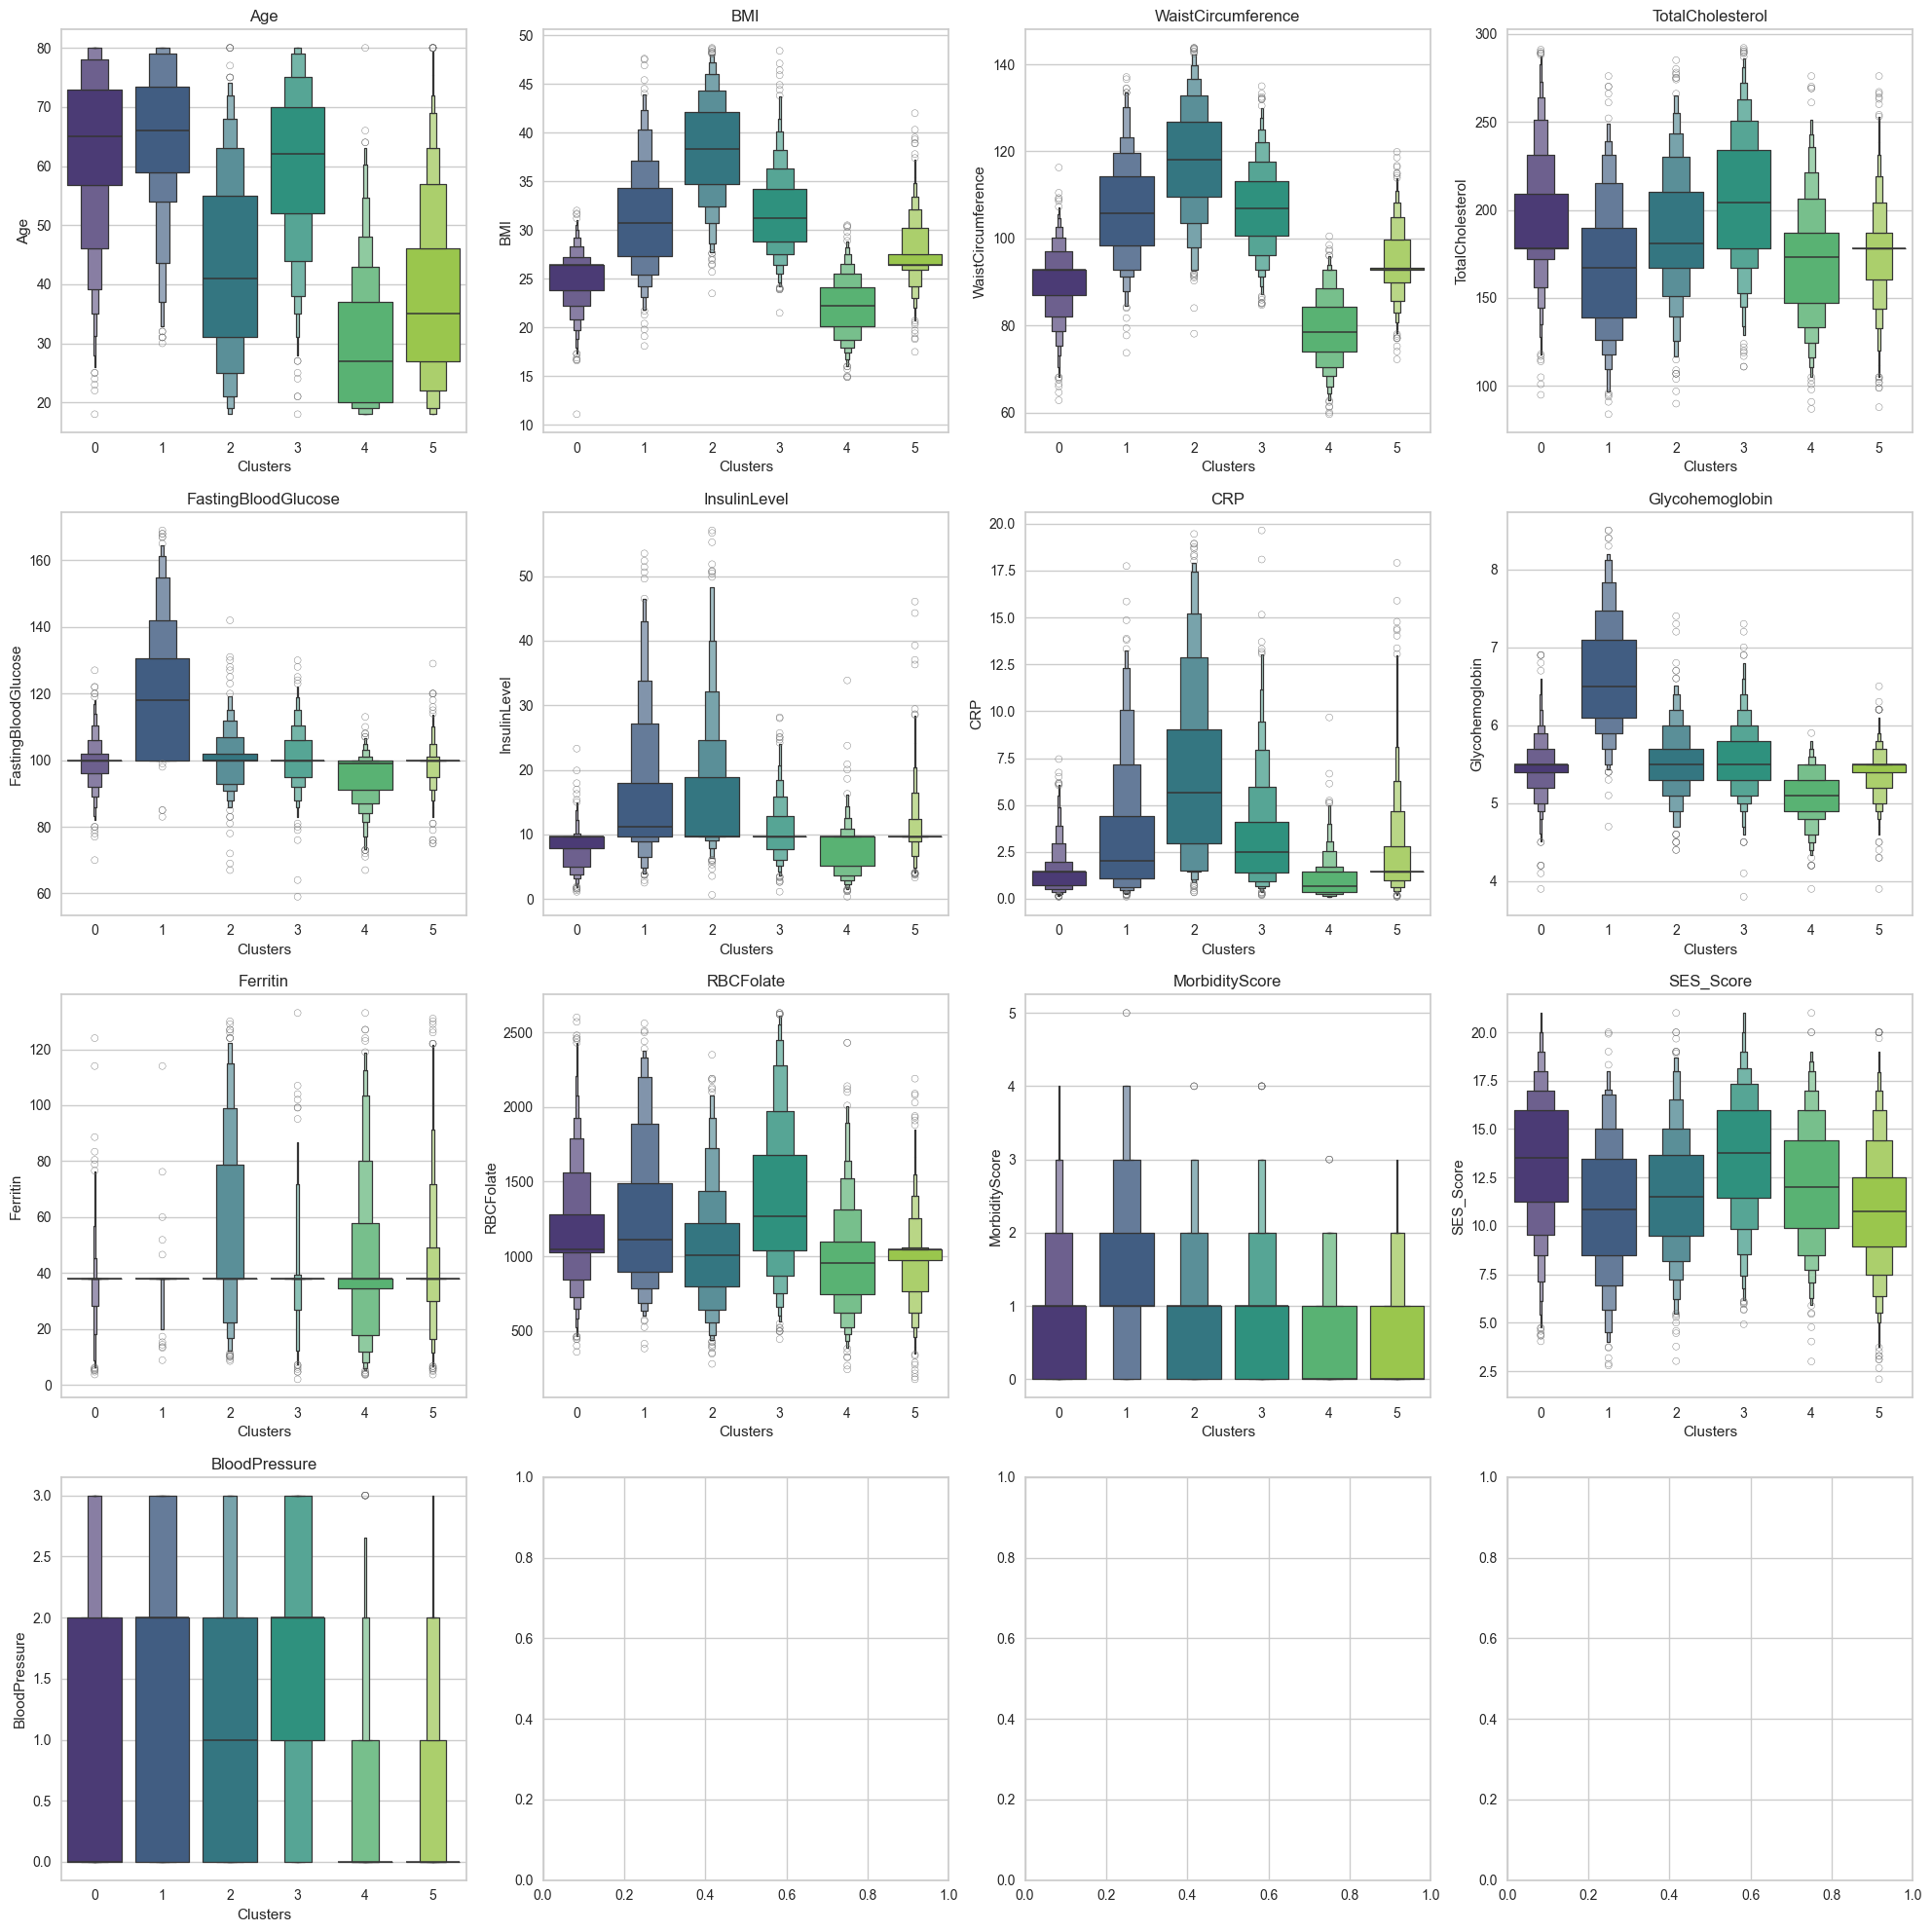

In [324]:
warnings.simplefilter(action='ignore', category=FutureWarning)

num_columns = 4
num_rows = (len(kmeans_df.columns)) // num_columns + 1  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 5))

for i, col in enumerate(kmeans_df.columns):
  row = i // num_columns
  col_idx = i % num_columns
  sns.boxenplot(y=kmeans_df[col], x=withPCA_3D_kmeans_df["Clusters"], palette="viridis", ax=axes[row, col_idx])
  axes[row, col_idx].set_title(col)

plt.tight_layout()
plt.show()

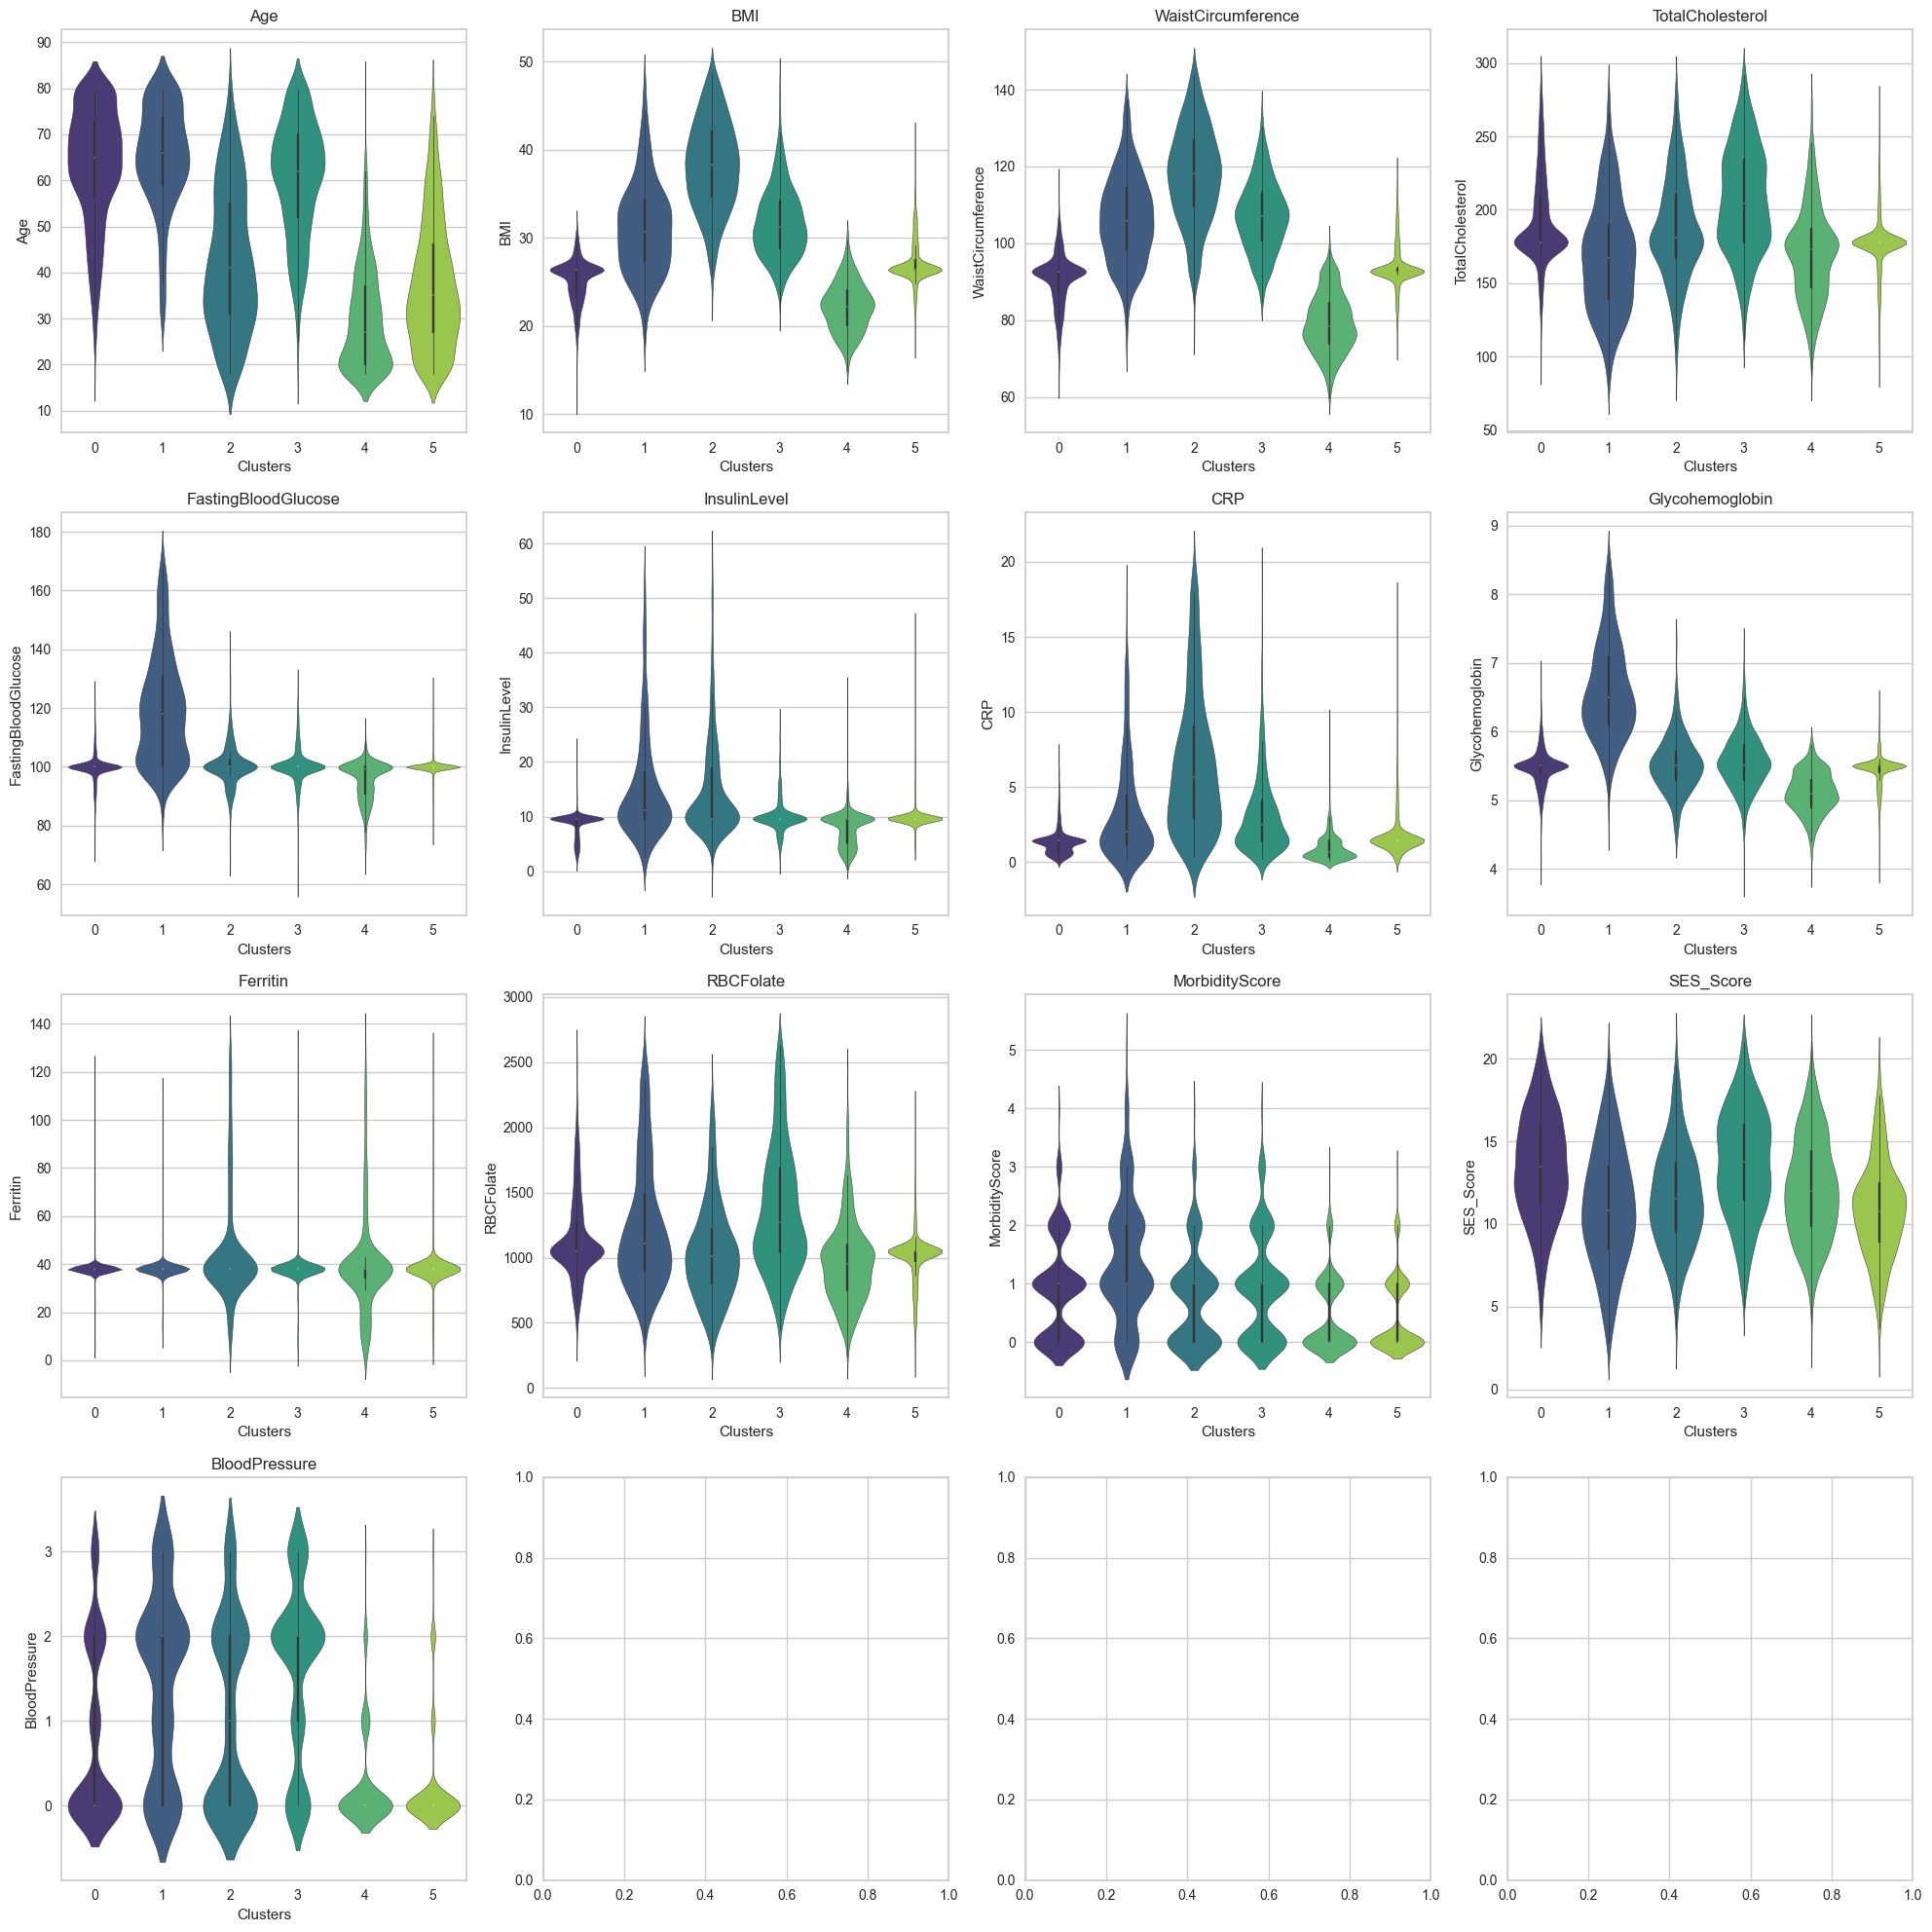

In [326]:
warnings.simplefilter(action='ignore', category=FutureWarning)

num_columns = 4
num_rows = (len(kmeans_df.columns)) // num_columns + 1  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 5))

for i, col in enumerate(kmeans_df.columns):
    row = i // num_columns
    col_idx = i % num_columns
    sns.violinplot(y=kmeans_df[col], x=withPCA_3D_kmeans_df["Clusters"], palette="viridis", ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)

plt.tight_layout()
plt.show()

## DB Scan

In [298]:
# pca2d = PCA(n_components=2)
# pca2d.fit(df_scaled)

# pca3d = PCA(n_components=3)
# pca3d.fit(df_scaled)

# PCA_ds_2d = pd.DataFrame(pca2d.transform(df_scaled), columns=(["col1","col2"]))
# PCA_ds_3d = pd.DataFrame(pca3d.transform(df_scaled), columns=(["col1","col2", "col3"]))

In [299]:
dbscan_df = df.copy()
dbscan_df_scaled = df_scaled.copy()
dbscan_pca_2d = PCA_2D.copy()
dbscan_pca_3d = PCA_3D.copy()

### Without PCA

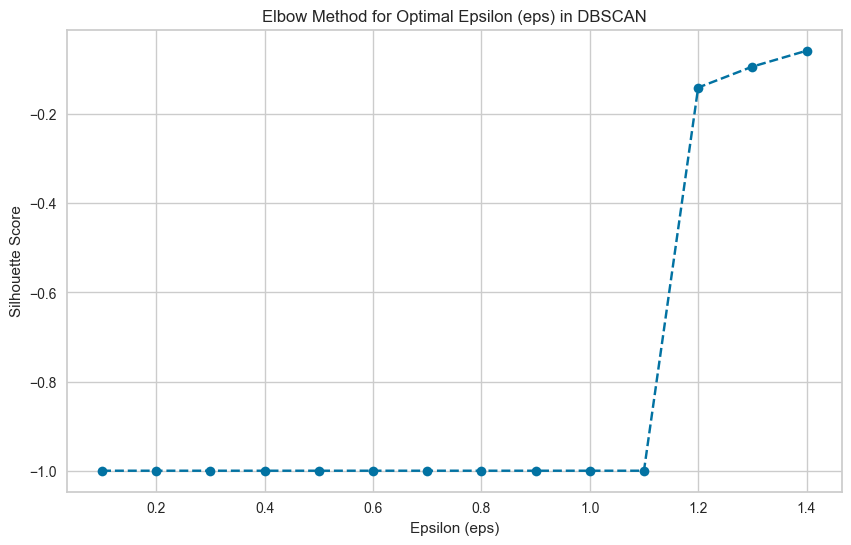

In [300]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define a range of eps values to test
eps_values = np.arange(0.1, 1.5, 0.1)
silhouette_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=500)
    labels = dbscan.fit_predict(dbscan_df_scaled)
    
    # Calculate silhouette score only if more than one cluster is formed
    if len(set(labels)) > 1:
        score = silhouette_score(dbscan_df_scaled, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)  # Invalid score for single cluster

# Plot the silhouette scores for different eps values
plt.figure(figsize=(10, 6))
plt.plot(eps_values, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method for Optimal Epsilon (eps) in DBSCAN')
plt.show()

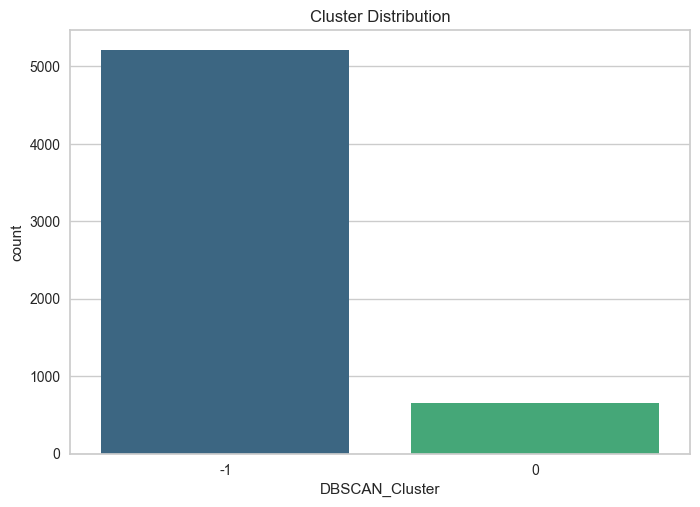

Number of clusters formed by DBSCAN: 2
The average silhouette score is : -0.11079793660440178


In [301]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(
    #parameters
    eps=1.2,    # The maximum distance between two samples for one to be considered as in the neighborhood of the other     
    min_samples=500,
    #metric='euclidean', #default
    #algorithm='auto', #default
    leaf_size=20 #default = 30
    #p=None, #defaul
)
dbscan_labels = dbscan.fit_predict(dbscan_df_scaled)

# Add DBSCAN labels to the PCA dataframe
dbscan_df_scaled['DBSCAN_Cluster'] = dbscan_labels
dbscan_df['DBSCAN_Cluster'] = dbscan_labels

# Visualize Cluster Distribution
sns.countplot(x=dbscan_df_scaled['DBSCAN_Cluster'], palette='viridis')
plt.title('Cluster Distribution')
plt.show()

#display the number of clusters formed
print(f"Number of clusters formed by DBSCAN: {len(set(dbscan_labels))}")

#display the silhouette score
silhouette_avg = silhouette_score(dbscan_df_scaled, dbscan_labels)
print(f"The average silhouette score is : {silhouette_avg}")

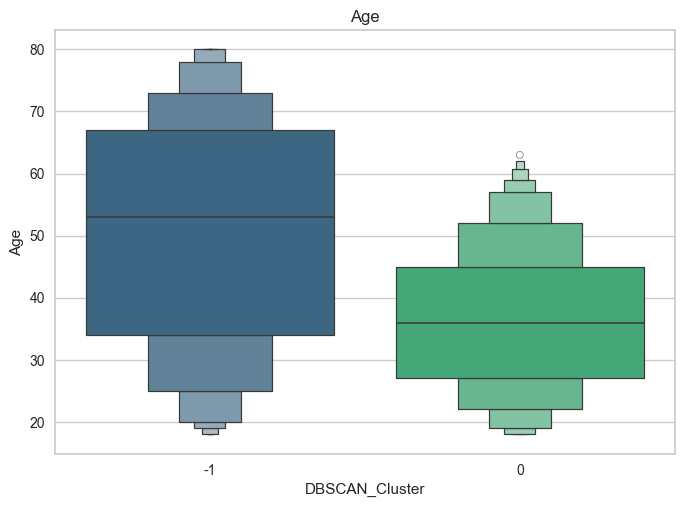

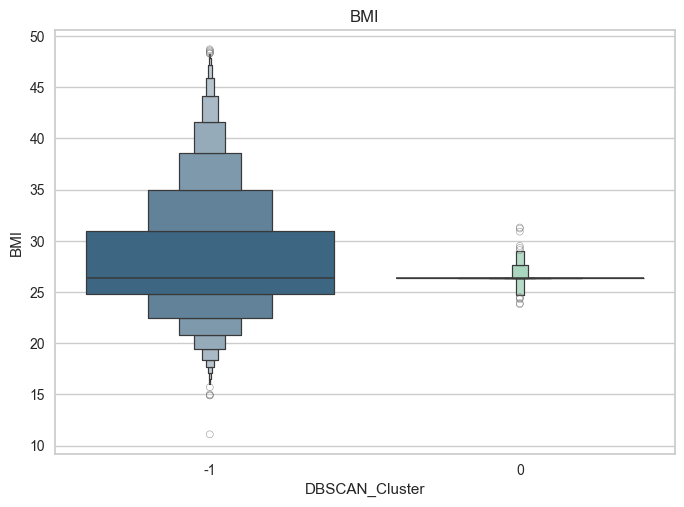

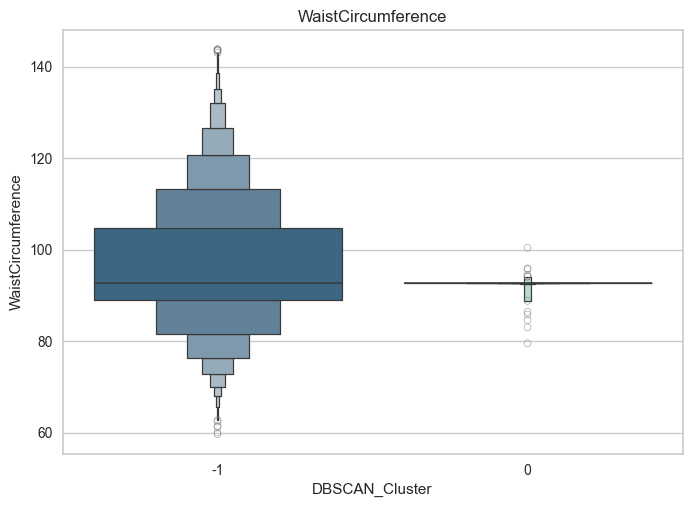

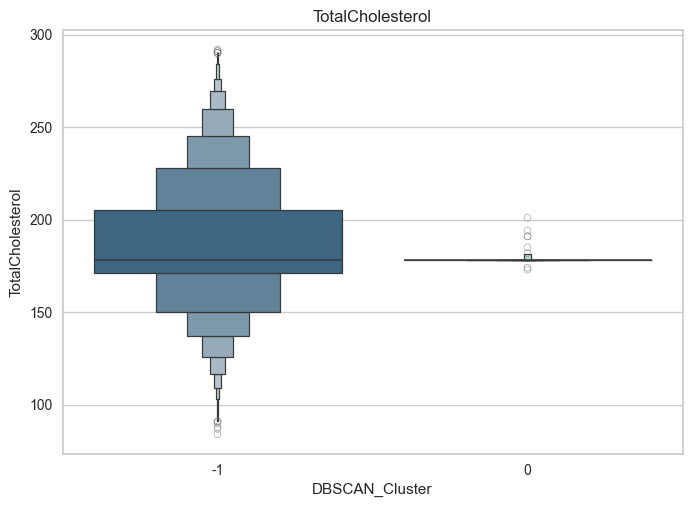

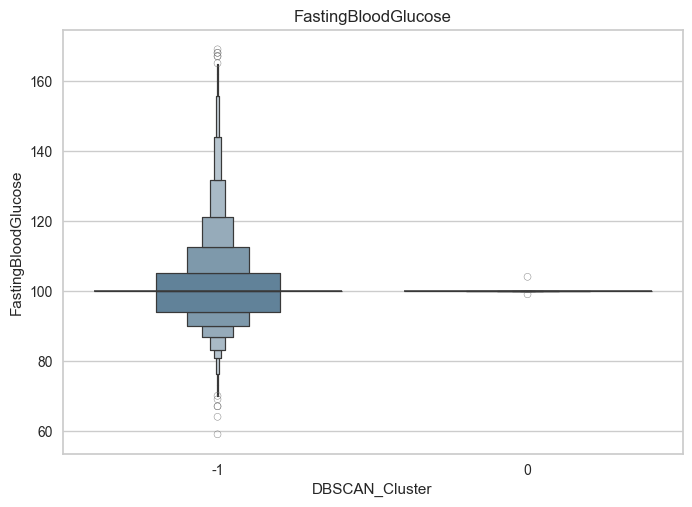

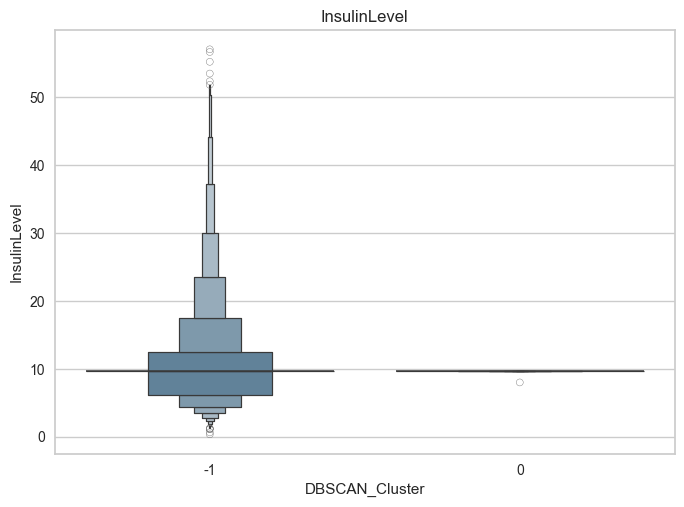

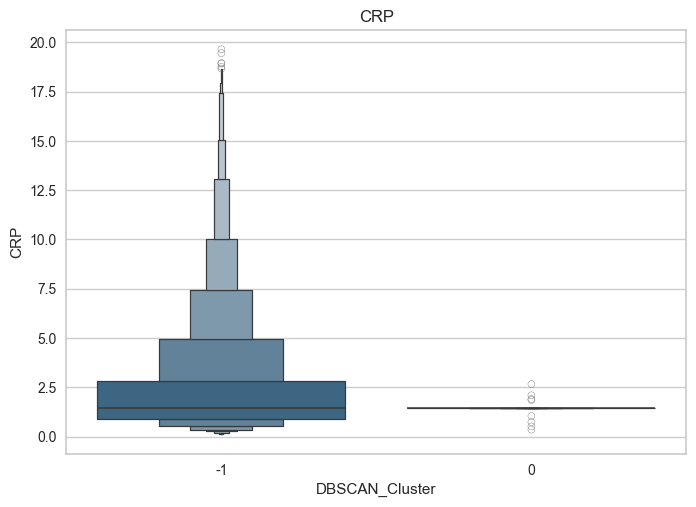

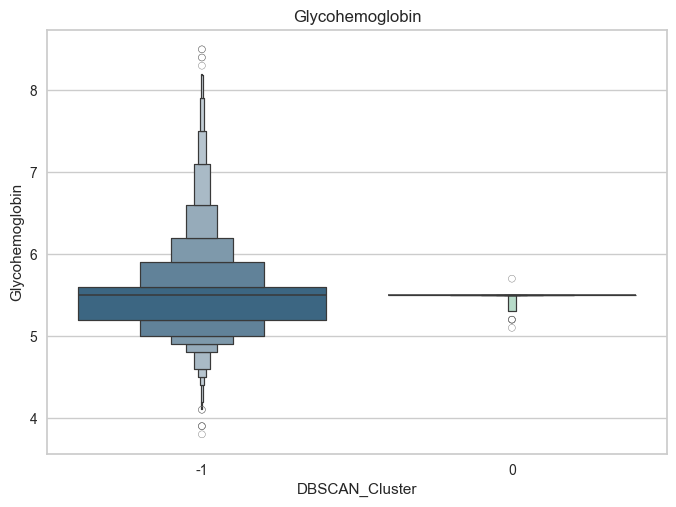

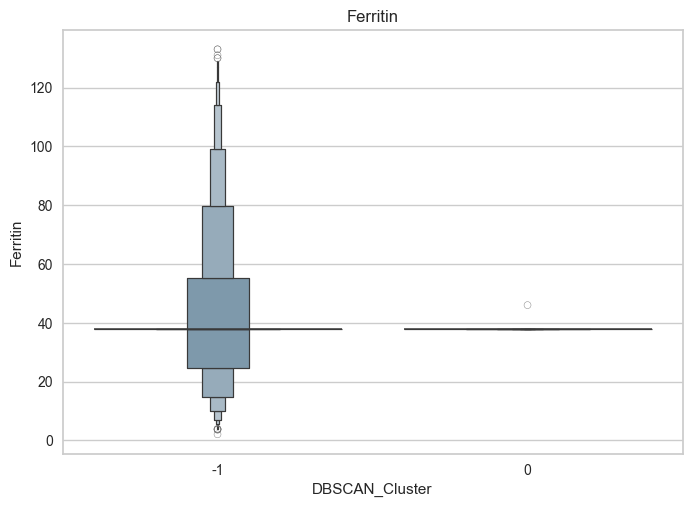

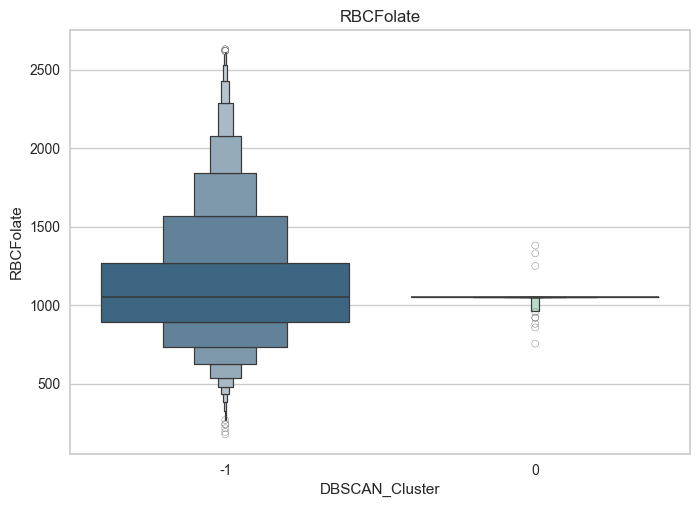

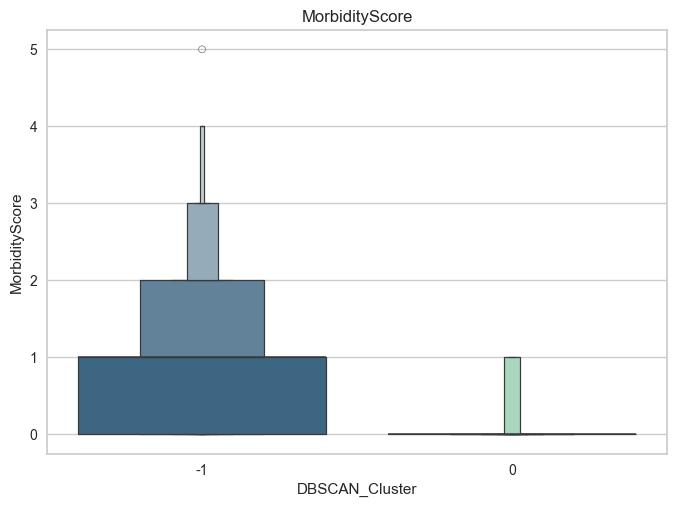

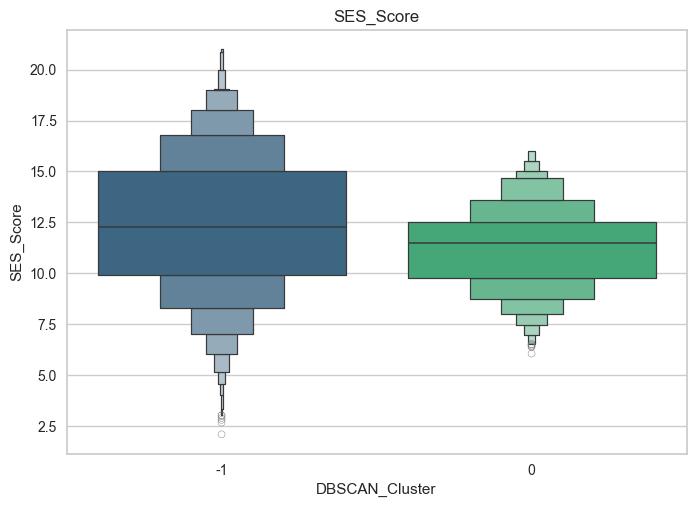

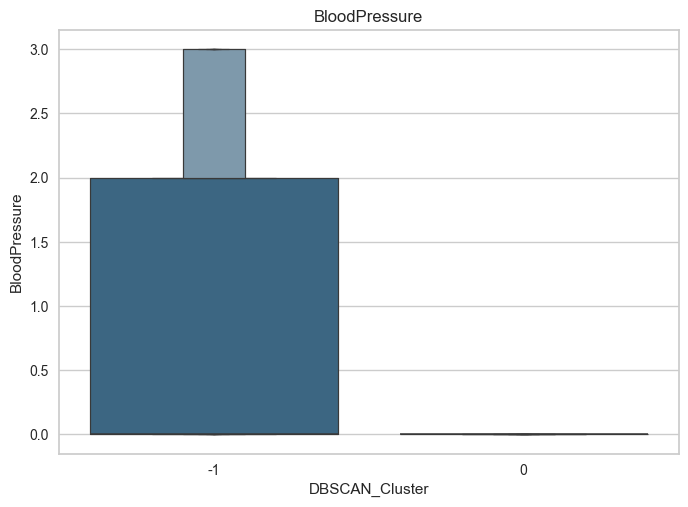

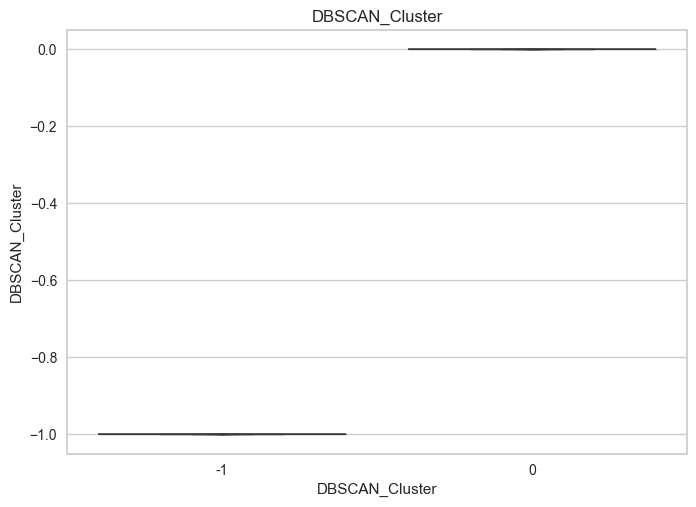

In [302]:
for col in dbscan_df.columns:
  plt.figure()
  pl = sns.boxenplot(y=dbscan_df[col], x=dbscan_df["DBSCAN_Cluster"], palette="viridis")
  pl.set_title(col)
  plt.show()

### With PCA

#### 2D

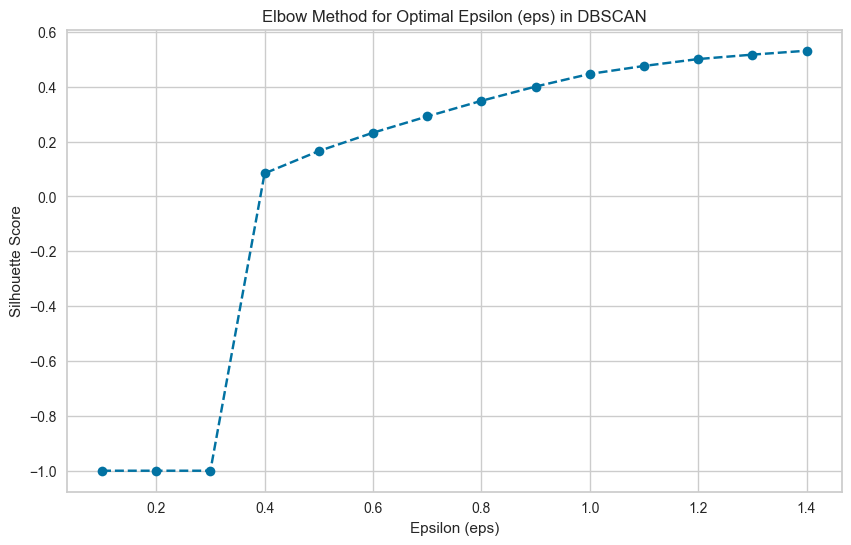

In [303]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define a range of eps values to test
eps_values = np.arange(0.1, 1.5, 0.1)
silhouette_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=500)
    labels = dbscan.fit_predict(dbscan_pca_2d)
    
    # Calculate silhouette score only if more than one cluster is formed
    if len(set(labels)) > 1:
        score = silhouette_score(dbscan_pca_2d, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)  # Invalid score for single cluster

# Plot the silhouette scores for different eps values
plt.figure(figsize=(10, 6))
plt.plot(eps_values, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method for Optimal Epsilon (eps) in DBSCAN')
plt.show()

In [304]:
explained_variance = pca2d.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

NameError: name 'pca2d' is not defined

In [ ]:
plt.figure()
principalcomponents = ['PC1', 'PC2']

plt.bar(principalcomponents, explained_variance, width=0.5, label='individual explained variance', color='violet')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
# A 2D Projection Of Data In The Reduced Dimension
x = dbscan_pca_2d["col1"]
y = dbscan_pca_2d["col2"]

# To plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.scatter(x, y, c="maroon", marker="o")
ax.set_title("A 2D Projection Of Data In The Reduced Dimension")
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(
    #parameters
    eps=1.2,    # The maximum distance between two samples for one to be considered as in the neighborhood of the other     
    min_samples=500,
    #metric='euclidean', #default
    #algorithm='auto', #default
    leaf_size=20 #default = 30
    #p=None, #defaul
)
dbscan_labels = dbscan.fit_predict(dbscan_pca_2d)

# Add DBSCAN labels to the PCA dataframe
dbscan_pca_2d['DBSCAN_Cluster'] = dbscan_labels
dbscan_df['DBSCAN_Cluster'] = dbscan_labels

# Plot the DBSCAN clusters
plt.figure(figsize=(10, 8))
plt.scatter(dbscan_pca_2d["col1"], dbscan_pca_2d["col2"], c=dbscan_pca_2d["DBSCAN_Cluster"], s=50, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#display the number of clusters formed
print(f"Number of clusters formed by DBSCAN: {len(set(dbscan_labels))}")

#display the silhouette score
silhouette_avg = silhouette_score(dbscan_pca_2d, dbscan_labels)
print(f"The average silhouette score is : {silhouette_avg}")

In [ ]:
dbscan_pca_2d['DBSCAN_Cluster'].value_counts()

In [ ]:
for col in dbscan_df.columns:
  plt.figure()
  pl = sns.boxenplot(y=dbscan_df[col], x=dbscan_df["DBSCAN_Cluster"], palette="viridis")
  pl.set_title(col)
  plt.show()

#### 3D

In [ ]:
# from sklearn.cluster import DBSCAN
# from sklearn.metrics import silhouette_score

# # Define a range of eps values to test
# eps_values = np.arange(0.1, 1.5, 0.1)
# silhouette_scores = []

# for eps in eps_values:
#     dbscan = DBSCAN(eps=eps, min_samples=500)
#     labels = dbscan.fit_predict(dbscan_pca_3d)
    
#     # Calculate silhouette score only if more than one cluster is formed
#     if len(set(labels)) > 1:
#         score = silhouette_score(dbscan_pca_3d, labels)
#         silhouette_scores.append(score)
#     else:
#         silhouette_scores.append(-1)  # Invalid score for single cluster

# # Plot the silhouette scores for different eps values
# plt.figure(figsize=(10, 6))
# plt.plot(eps_values, silhouette_scores, marker='o', linestyle='--')
# plt.xlabel('Epsilon (eps)')
# plt.ylabel('Silhouette Score')
# plt.title('Elbow Method for Optimal Epsilon (eps) in DBSCAN')
# plt.show()

In [ ]:
explained_variance = pca3d.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

PC3_explainedvariance = explained_variance[2]
print("Explained variance of PC3", PC3_explainedvariance)

In [ ]:
plt.figure()
principalcomponents = ['PC1', 'PC2', 'PC3']

plt.bar(principalcomponents, explained_variance, width=0.5, label='individual explained variance', color='violet')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
# A 3D Projection Of Data In The Reduced Dimension
x = dbscan_pca_3d["col1"]
y = dbscan_pca_3d["col2"]
z = dbscan_pca_3d["col3"]

# To plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c="maroon", marker="o")
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(
    #parameters
    eps=1.2,    # The maximum distance between two samples for one to be considered as in the neighborhood of the other     
    min_samples=500,
    #metric='euclidean', #default
    #algorithm='auto', #default
    leaf_size=20 #default = 30
    #p=None, #defaul
)
dbscan_labels = dbscan.fit_predict(dbscan_pca_3d)

# Add DBSCAN labels to the PCA dataframe
dbscan_pca_3d['DBSCAN_Cluster'] = dbscan_labels
dbscan_df['DBSCAN_Cluster'] = dbscan_labels

# Plot the DBSCAN clusters in 3D
x = dbscan_pca_3d["col1"]
y = dbscan_pca_3d["col2"]
z = dbscan_pca_3d["col3"]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=dbscan_pca_3d["DBSCAN_Cluster"], s=50, cmap='viridis')
ax.set_title("DBSCAN Clustering in 3D")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.show()

#display the number of clusters formed
print(f"Number of clusters formed by DBSCAN: {len(set(dbscan_labels))}")

#display the silhouette score
silhouette_avg = silhouette_score(dbscan_pca_3d, dbscan_labels)
print(f"The average silhouette score is : {silhouette_avg}")

In [ ]:
dbscan_pca_3d['DBSCAN_Cluster'].value_counts()

In [ ]:
for col in dbscan_df.columns:
  plt.figure()
  pl = sns.boxenplot(y=dbscan_df[col], x=dbscan_df["DBSCAN_Cluster"], palette="viridis")
  pl.set_title(col)
  plt.show()

## Agglo 

In [ ]:
agglo_df = df.copy()
agglo_df_scaled = df_scaled.copy()
agglo_pca2d = PCA_2D.copy()
agglo_pca3d = PCA_3D.copy()

#### Without PCA

##### Scaled

In [ ]:
# # Elbow Method for Agglomerative Clustering
# wcss_agglo = []  # Store WCSS values

# # Choose 'ward' linkage for consistency (minimizes variance within clusters)
# linkage = 'ward'

# for k in range(1, 11):  # Test K from 1 to 10
#     # Fit Agglomerative Clustering
#     agglo = AgglomerativeClustering(n_clusters=k, linkage=linkage)
#     cluster_labels = agglo.fit_predict(agglo_df_scaled)
    
#     # Calculate WCSS (sum of squared distances of samples to their closest cluster center)
#     wcss_value = 0
#     for i in range(k):
#         # Get indices of samples belonging to the current cluster
#         cluster_indices = np.where(cluster_labels == i)[0]
        
#         if len(cluster_indices) > 0:  # Ensure the cluster is not empty
#             # Get samples belonging to the current cluster
#             cluster_samples = agglo_df_scaled.iloc[cluster_indices]
            
#             # Calculate cluster centroid
#             centroid = cluster_samples.mean().values.reshape(1, -1)
            
#             # Calculate sum of squared distances from each point to centroid
#             squared_distances = np.sum((cluster_samples.values - centroid)**2, axis=1)
#             wcss_value += np.sum(squared_distances)
    
#     wcss_agglo.append(wcss_value)

# # Plot the Elbow Graph
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, 11), wcss_agglo, marker='o', linestyle='--')
# plt.xlabel('Number of Clusters (K)')
# plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
# plt.title(f'Elbow Method for Optimal K in Agglomerative Clustering (Linkage: {linkage})')
# plt.show()

In [ ]:
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
df_pca_clusters = agglo.fit_predict(agglo_df_scaled)
agglo_df_scaled['Cluster'] = df_pca_clusters

# # Plot Dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(sch.linkage(agglo_df_scaled, method='ward'))
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

In [ ]:
# Apply Agglomerative Clustering to the scaled data
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')  # Based on elbow method from previous cell
agglo_df_scaled['Cluster'] = agglo.fit_predict(agglo_df_scaled)

# Visualize Cluster Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=agglo_df_scaled['Cluster'], palette='viridis')
plt.title('Agglomerative Clustering - Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [ ]:
# Apply Agglomerative Clustering to the data
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_labels = agglo.fit_predict(agglo_df_scaled)

# Add cluster labels to both dataframes
agglo_df['Cluster'] = agglo_labels
agglo_pca2d['Cluster'] = agglo_labels

# Group by cluster labels and calculate the mean for each group
agglo_cluster_means = agglo_df.groupby('Cluster').mean()

# Convert the cluster means to a DataFrame and display it
print("Cluster means:")
display(agglo_cluster_means)

# Count samples in each cluster
cluster_counts = agglo_df['Cluster'].value_counts().sort_index()
print("\nSample count in each cluster:")
display(cluster_counts)

In [ ]:
agglo_df_scaled['Cluster'] = agglo_df['Cluster']

for col in agglo_df_scaled.columns[:-1]:  # Excluding the Cluster column
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=agglo_df_scaled['Cluster'], y=agglo_df_scaled[col], palette="viridis")
    plt.title(f"Boxplot of {col} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(col)
    plt.show()

##### Not Scaled

In [ ]:
# Elbow Method for Agglomerative Clustering (non-scaled data)
wcss_agglo_nonscaled = []  # Store WCSS values

linkage = 'ward'

for k in range(1, 11):  # Test K from 1 to 10
    # Fit Agglomerative Clustering
    agglo = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    cluster_labels = agglo.fit_predict(agglo_df)
    
    wcss_value = 0
    for i in range(k):
        
        cluster_indices = np.where(cluster_labels == i)[0]
        
        if len(cluster_indices) > 0:  # Ensure the cluster is not empty
            cluster_samples = agglo_df.iloc[cluster_indices]
            
            centroid = cluster_samples.mean().values.reshape(1, -1)
            
            squared_distances = np.sum((cluster_samples.values - centroid)**2, axis=1)
            wcss_value += np.sum(squared_distances)
    
    wcss_agglo_nonscaled.append(wcss_value)

# Plot the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_agglo_nonscaled, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title(f'Elbow Method for Optimal K in Agglomerative Clustering (Non-Scaled, Linkage: {linkage})')
plt.show()

In [ ]:
# Fit the Agglomerative Clustering model to the original data
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')  # Using 3 clusters based on elbow method
agglo_df['Cluster'] = agglo.fit_predict(agglo_df)

# Visualize Cluster Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=agglo_df['Cluster'], palette='viridis')
plt.title('Agglomerative Clustering - Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [ ]:
# Group by agglomerative cluster labels and calculate the mean for each group using non-scaled data
agglo_cluster_means = agglo_df.groupby('Cluster').mean()

# Convert the cluster means to a DataFrame
agglo_cluster_means_df = pd.DataFrame(agglo_cluster_means)

# Display the DataFrame with non-scaled means
print("Cluster means from non-scaled data:")
display(agglo_cluster_means_df)

In [ ]:
for col in agglo_df.columns:
    if col != 'Cluster':  # Skip the Cluster column itself
        plt.figure(figsize=(8, 6))
        pl = sns.boxenplot(y=agglo_df[col], x=agglo_df['Cluster'], palette="viridis")
        pl.set_title(f"Distribution of {col} by Cluster")
        plt.xlabel("Cluster")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

#### With PCA

##### 2D

In [ ]:
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
df_pca_clusters = agglo.fit_predict(agglo_pca2d)
agglo_pca2d['Cluster'] = df_pca_clusters

# # Plot Dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(sch.linkage(agglo_pca2d[['col1', 'col2']], method='ward'))
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

In [ ]:
# from yellowbrick.cluster import KElbowVisualizer
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.metrics import silhouette_score

# print('Elbow Method to determine the number of clusters to be formed for Agglomerative Clustering:')

# # Create a list to store silhouette scores for different cluster numbers
# silhouette_scores = []
# k_values = range(2, 11)  # Start from 2 as silhouette requires at least 2 clusters

# # Calculate silhouette scores for each k
# for k in k_values:
#     agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
#     labels = agglo.fit_predict(agglo_pca2d[['col1', 'col2']])
#     silhouette_scores.append(silhouette_score(agglo_pca2d[['col1', 'col2']], labels))

# # Plot the silhouette scores
# plt.figure(figsize=(10, 6))
# plt.plot(k_values, silhouette_scores, 'o-', color='purple')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Analysis for Determining Optimal k in Agglomerative Clustering')
# plt.grid(True)
# plt.show()

# # Also use KElbowVisualizer for WCSS (inertia) visualization with K-means as reference
# Elbow_M = KElbowVisualizer(KMeans(), k=10)
# Elbow_M.fit(agglo_pca2d[['col1', 'col2']])
# Elbow_M.show()

In [ ]:
# Apply Agglomerative Clustering with PCA
agglo = AgglomerativeClustering(
    n_clusters=2,  # Based on previous analysis
    linkage='ward'  # Using ward linkage for minimizing variance
)

# Fit the model to the PCA data
agglo_labels = agglo.fit_predict(agglo_pca2d[['col1', 'col2']])

# Add cluster labels to dataframes
agglo_pca2d['Cluster'] = agglo_labels
agglo_df['Cluster'] = agglo_labels

# Calculate silhouette score
silhouette_avg = silhouette_score(agglo_pca2d[['col1', 'col2']], agglo_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate inertia (manually since AgglomerativeClustering doesn't provide it)
wcss = 0
for i in range(4):  # 4 clusters
    # Get points in this cluster
    cluster_points = agglo_pca2d[agglo_pca2d['Cluster'] == i][['col1', 'col2']]
    
    # Calculate centroid
    centroid = cluster_points.mean().values
    
    # Calculate sum of squared distances to centroid
    cluster_wcss = np.sum(np.sum((cluster_points.values - centroid)**2, axis=1))
    wcss += cluster_wcss

print(f"Inertia (WCSS): {wcss}")



# Print number of samples in each cluster
cluster_counts = pd.Series(agglo_labels).value_counts().sort_index()
print("\nSample count in each cluster:")
print(cluster_counts)

In [ ]:
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist

# Perform hierarchical clustering using the 'ward' method
Z = linkage(df_scaled, method='ward')

# Compute the cophenetic correlation coefficient
c, coph_dists = cophenet(Z, pdist(df_scaled))

print(f"Cophenetic Correlation Coefficient: {c}")

In [ ]:
# Plot the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    agglo_pca2d['col1'], 
    agglo_pca2d['col2'], 
    c=agglo_pca2d['Cluster'], 
    s=50, 
    cmap='viridis',
    alpha=0.8
)
plt.title("Agglomerative Clustering with PCA", fontsize=15)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.colorbar(scatter, label="Cluster")
plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Group by cluster labels and calculate the mean for each group
agglo_cluster_means = agglo_df.groupby('Cluster').mean()

# Convert the cluster means to a DataFrame
agglo_cluster_means_df = pd.DataFrame(agglo_cluster_means)

# Display the DataFrame
agglo_cluster_means_df.head()

In [ ]:
# Create boxenplots for each feature grouped by agglomerative clusters
for col in agglo_df.columns:
    if col != 'Cluster':  # Skip the Cluster column itself
        plt.figure(figsize=(10, 6))
        pl = sns.boxenplot(y=agglo_df[col], x=agglo_pca2d['Cluster'], palette="viridis")
        pl.set_title(f"Distribution of {col} across Clusters")
        plt.xlabel("Cluster")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

#### 3D

In [ ]:
# Elbow Method for Agglomerative Clustering with PCA
wcss_agglo_pca3d = []  # Store WCSS values

# Choose 'ward' linkage for consistency (minimizes variance within clusters)
linkage = 'ward'

for k in range(1, 11):  # Test K from 1 to 10
    # Fit Agglomerative Clustering
    agglo = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    cluster_labels = agglo.fit_predict(agglo_pca3d[['col1', 'col2', 'col3']])  # Use only the PCA components
    
    # Calculate WCSS (sum of squared distances of samples to their closest cluster center)
    wcss_value = 0
    for i in range(k):
        # Get indices of samples belonging to the current cluster
        cluster_indices = np.where(cluster_labels == i)[0]
        
        if len(cluster_indices) > 0:  # Ensure the cluster is not empty
            # Get samples belonging to the current cluster
            cluster_samples = agglo_pca3d.iloc[cluster_indices][['col1', 'col2', 'col3']]
            
            # Calculate cluster centroid
            centroid = cluster_samples.mean().values.reshape(1, -1)
            
            # Calculate sum of squared distances from each point to centroid
            squared_distances = np.sum((cluster_samples.values - centroid)**2, axis=1)
            wcss_value += np.sum(squared_distances)
    
    wcss_agglo_pca3d.append(wcss_value)

# Plot the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_agglo_pca3d, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title(f'Elbow Method for Optimal K in Agglomerative Clustering with PCA (Linkage: {linkage})')
plt.show()

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

print('Elbow Method to determine the number of clusters to be formed for Agglomerative Clustering:')

# Create a list to store silhouette scores for different cluster numbers
silhouette_scores = []
k_values = range(2, 11)  # Start from 2 as silhouette requires at least 2 clusters

# Calculate silhouette scores for each k
for k in k_values:
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agglo.fit_predict(agglo_pca3d[['col1', 'col2', 'col3']])
    silhouette_scores.append(silhouette_score(agglo_pca3d[['col1', 'col2', 'col3']], labels))

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, 'o-', color='purple')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Determining Optimal k in Agglomerative Clustering')
plt.grid(True)
plt.show()

# Also use KElbowVisualizer for WCSS (inertia) visualization with K-means as reference
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(agglo_pca3d[['col1', 'col2', 'col3']])
Elbow_M.show()

In [ ]:
# Apply Agglomerative Clustering with PCA
agglo = AgglomerativeClustering(
    n_clusters=4,  # Based on previous analysis
    linkage='ward'  # Using ward linkage for minimizing variance
)

# Fit the model to the PCA data
agglo_labels = agglo.fit_predict(agglo_pca3d[['col1', 'col2', 'col3']])

# Add cluster labels to dataframes
agglo_pca3d['Cluster'] = agglo_labels
agglo_df['Cluster'] = agglo_labels

# Calculate silhouette score
silhouette_avg = silhouette_score(agglo_pca3d[['col1', 'col2', 'col3']], agglo_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate inertia (manually since AgglomerativeClustering doesn't provide it)
wcss = 0
for i in range(4):  # 4 clusters
    # Get points in this cluster
    cluster_points = agglo_pca3d[agglo_pca3d['Cluster'] == i][['col1', 'col2', 'col3']]
    
    # Calculate centroid
    centroid = cluster_points.mean().values
    
    # Calculate sum of squared distances to centroid
    cluster_wcss = np.sum(np.sum((cluster_points.values - centroid)**2, axis=1))
    wcss += cluster_wcss

print(f"Inertia (WCSS): {wcss}")



# Print number of samples in each cluster
cluster_counts = pd.Series(agglo_labels).value_counts().sort_index()
print("\nSample count in each cluster:")
print(cluster_counts)

In [ ]:
# Plot the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    agglo_pca3d['col1'], 
    agglo_pca3d['col2'], 
    agglo_pca3d['col3'], 
    c=agglo_pca3d['Cluster'], 
    s=50, 
    cmap='viridis',
    alpha=0.8
)
ax.set_title("Agglomerative Clustering with PCA", fontsize=15)
ax.set_xlabel("Principal Component 1", fontsize=12)
ax.set_ylabel("Principal Component 2", fontsize=12)
ax.set_zlabel("Principal Component 3", fontsize=12)
fig.colorbar(scatter, label="Cluster")
plt.tight_layout()
plt.show()

In [ ]:
# Group by cluster labels and calculate the mean for each group
agglo_cluster_means = agglo_df.groupby('Cluster').mean()

# Convert the cluster means to a DataFrame
agglo_cluster_means_df = pd.DataFrame(agglo_cluster_means)

# Display the DataFrame
agglo_cluster_means_df.head()

In [ ]:
# Create boxenplots for each feature grouped by agglomerative clusters
for col in agglo_df.columns:
    if col != 'Cluster':  # Skip the Cluster column itself
        plt.figure(figsize=(10, 6))
        pl = sns.boxenplot(y=agglo_df[col], x=agglo_pca3d['Cluster'], palette="viridis")
        pl.set_title(f"Distribution of {col} across Clusters")
        plt.xlabel("Cluster")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()